## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [582]:
import pandas as pd

tsv_df = pd.read_csv('test_set_values.csv')
tsv_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [583]:
tsl_df = pd.read_csv('training_set_labels.csv')
tsl_df.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [584]:
training_values = pd.read_csv('training_set_values.csv')
training_values.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [585]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS

In [586]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import RocCurveDisplay, roc_curve, roc_auc_score, auc
from sklearn.tree import DecisionTreeClassifier

In [587]:
from scipy import stats

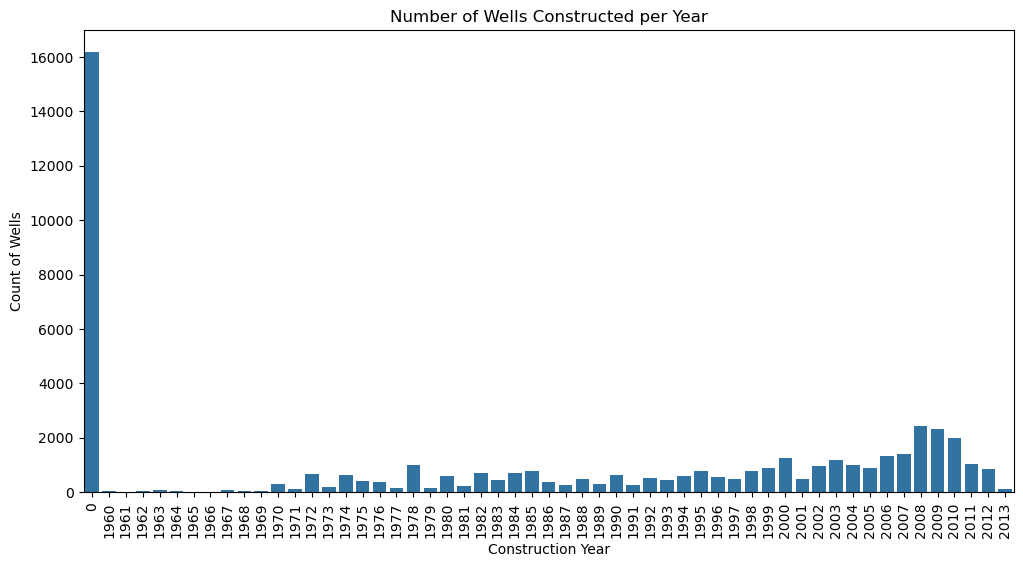

In [588]:
plt.figure(figsize=(12, 6))
sns.barplot(x='construction_year', y='count', data=construction_top)

plt.xticks(rotation=90)

plt.xlabel("Construction Year")
plt.ylabel("Count of Wells")
plt.title("Number of Wells Constructed per Year")

# Show plot
plt.show()


In [589]:
waterfalls_df.head()

,id,amount_tsh,funder,gps_height,installer,basin,region,region_code,district_code,lga,...,extraction_type_class,management,management_group,payment_type,quality_group,quantity,source_type,source_class,waterpoint_type_group,status_group
0,69572,6000.0,roman,1390,roman,lake nyasa,iringa,11,5,Ludewa,...,gravity,vwc,user-group,annually,good,enough,spring,groundwater,communal standpipe,functional
2,34310,25.0,lottery club,686,world vision,pangani,manyara,21,4,Simanjiro,...,gravity,vwc,user-group,per bucket,good,enough,dam,surface,communal standpipe,functional
3,67743,0.0,unicef,263,unicef,ruvuma / southern coast,mtwara,90,63,Nanyumbu,...,submersible,vwc,user-group,never pay,good,dry,borehole,groundwater,communal standpipe,non functional
5,9944,20.0,mkinga distric coun,0,dwe,pangani,tanga,4,8,Mkinga,...,submersible,vwc,user-group,per bucket,salty,enough,other,unknown,communal standpipe,functional
6,19816,0.0,dwsp,0,dwsp,internal,shinyanga,17,3,Shinyanga Rural,...,handpump,vwc,user-group,never pay,good,enough,borehole,groundwater,hand pump,non functional


In [590]:
print(waterfalls_df.shape)  # Should show (rows, columns)
print(waterfalls_df.isnull().sum().sum())  # Should be 0 or low

(48650, 25)
0


In [591]:
training_df = pd.merge(training_values, tsl_df, on='id')
training_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [592]:
full_df = pd.concat([training_df, tsv_df])
full_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [593]:
numerical = full_df.select_dtypes(include= ['int', 'Int64', 'float']).columns.to_list()
numerical

['id',
 'amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'num_private',
 'region_code',
 'district_code',
 'population',
 'construction_year']

In [594]:
types = pd.DataFrame(
    full_df[numerical].dtypes,
    columns=['Data Type']
)

types

,Data Type
id,int64
amount_tsh,float64
gps_height,int64
longitude,float64
latitude,float64
num_private,int64
region_code,int64
district_code,int64
population,int64
construction_year,int64


In [595]:
print(full_df.shape) 
print(full_df.isnull().sum().sum())

(74250, 41)
73208


In [596]:
full_df = full_df.drop(['num_private', 'longitude', 'latitude', 'region_code', 'district_code'], axis=1)
full_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,wpt_name,basin,subvillage,region,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,none,Lake Nyasa,Mnyusi B,Iringa,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,Zahanati,Lake Victoria,Nyamara,Mara,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,Kwa Mahundi,Pangani,Majengo,Manyara,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,Shuleni,Lake Victoria,Kyanyamisa,Kagera,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [597]:
print(full_df.isnull().sum())

id                           0
amount_tsh                   0
date_recorded                0
funder                    4507
gps_height                   0
installer                 4532
wpt_name                     2
basin                        0
subvillage                 470
region                       0
lga                          0
ward                         0
population                   0
public_meeting            4155
recorded_by                  0
scheme_management         4847
scheme_name              36052
permit                    3793
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity                     0
quantity_group               0
source                       0
source_type                  0
source_c

In [598]:
full_df = full_df.drop(['waterpoint_type_group', 'quality_group', 'quantity_group', 'source_type', 'subvillage', 'wpt_name'], axis=1)
full_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,basin,region,lga,ward,...,management,management_group,payment,payment_type,water_quality,quantity,source,source_class,waterpoint_type,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,Lake Nyasa,Iringa,Ludewa,Mundindi,...,vwc,user-group,pay annually,annually,soft,enough,spring,groundwater,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,Lake Victoria,Mara,Serengeti,Natta,...,wug,user-group,never pay,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,Pangani,Manyara,Simanjiro,Ngorika,...,vwc,user-group,pay per bucket,per bucket,soft,enough,dam,surface,communal standpipe multiple,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,Ruvuma / Southern Coast,Mtwara,Nanyumbu,Nanyumbu,...,vwc,user-group,never pay,never pay,soft,dry,machine dbh,groundwater,communal standpipe multiple,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,Lake Victoria,Kagera,Karagwe,Nyakasimbi,...,other,other,never pay,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe,functional


In [599]:
full_df = full_df.drop('recorded_by', axis=1)

In [600]:
print(full_df.isnull().sum().sum())

72736


In [601]:
print("Duplicate Rows:", full_df.duplicated().sum())

Duplicate Rows: 0


In [602]:
full_df = full_df.drop(['public_meeting', 'scheme_management'], axis=1)
full_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,basin,region,lga,ward,...,management,management_group,payment,payment_type,water_quality,quantity,source,source_class,waterpoint_type,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,Lake Nyasa,Iringa,Ludewa,Mundindi,...,vwc,user-group,pay annually,annually,soft,enough,spring,groundwater,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,Lake Victoria,Mara,Serengeti,Natta,...,wug,user-group,never pay,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,Pangani,Manyara,Simanjiro,Ngorika,...,vwc,user-group,pay per bucket,per bucket,soft,enough,dam,surface,communal standpipe multiple,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,Ruvuma / Southern Coast,Mtwara,Nanyumbu,Nanyumbu,...,vwc,user-group,never pay,never pay,soft,dry,machine dbh,groundwater,communal standpipe multiple,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,Lake Victoria,Kagera,Karagwe,Nyakasimbi,...,other,other,never pay,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe,functional


In [603]:
full_df = full_df.drop(['extraction_type_group', 'payment_type', 'source_class'], axis=1)
full_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,basin,region,lga,ward,...,extraction_type,extraction_type_class,management,management_group,payment,water_quality,quantity,source,waterpoint_type,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,Lake Nyasa,Iringa,Ludewa,Mundindi,...,gravity,gravity,vwc,user-group,pay annually,soft,enough,spring,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,Lake Victoria,Mara,Serengeti,Natta,...,gravity,gravity,wug,user-group,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,Pangani,Manyara,Simanjiro,Ngorika,...,gravity,gravity,vwc,user-group,pay per bucket,soft,enough,dam,communal standpipe multiple,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,Ruvuma / Southern Coast,Mtwara,Nanyumbu,Nanyumbu,...,submersible,submersible,vwc,user-group,never pay,soft,dry,machine dbh,communal standpipe multiple,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,Lake Victoria,Kagera,Karagwe,Nyakasimbi,...,gravity,gravity,other,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional


In [604]:
full_df =full_df.drop(['lga', 'ward'], axis=1)
full_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,basin,region,population,scheme_name,...,extraction_type,extraction_type_class,management,management_group,payment,water_quality,quantity,source,waterpoint_type,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,Lake Nyasa,Iringa,109,Roman,...,gravity,gravity,vwc,user-group,pay annually,soft,enough,spring,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,Lake Victoria,Mara,280,NaN,...,gravity,gravity,wug,user-group,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,Pangani,Manyara,250,Nyumba ya mungu pipe scheme,...,gravity,gravity,vwc,user-group,pay per bucket,soft,enough,dam,communal standpipe multiple,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,Ruvuma / Southern Coast,Mtwara,58,NaN,...,submersible,submersible,vwc,user-group,never pay,soft,dry,machine dbh,communal standpipe multiple,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,Lake Victoria,Kagera,0,NaN,...,gravity,gravity,other,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional


In [605]:
print(full_df.columns[full_df.columns.duplicated()])

Index([], dtype='object')


In [606]:
print(full_df.index.duplicated().sum())

14850


In [607]:
full_df

,id,amount_tsh,date_recorded,funder,gps_height,installer,basin,region,population,scheme_name,...,extraction_type,extraction_type_class,management,management_group,payment,water_quality,quantity,source,waterpoint_type,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,Lake Nyasa,Iringa,109,Roman,...,gravity,gravity,vwc,user-group,pay annually,soft,enough,spring,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,Lake Victoria,Mara,280,NaN,...,gravity,gravity,wug,user-group,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,Pangani,Manyara,250,Nyumba ya mungu pipe scheme,...,gravity,gravity,vwc,user-group,pay per bucket,soft,enough,dam,communal standpipe multiple,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,Ruvuma / Southern Coast,Mtwara,58,NaN,...,submersible,submersible,vwc,user-group,never pay,soft,dry,machine dbh,communal standpipe multiple,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,Lake Victoria,Kagera,0,NaN,...,gravity,gravity,other,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,2011-02-24,Danida,34,Da,Wami / Ruvu,Pwani,20,Bagamoyo wate,...,mono,motorpump,vwc,user-group,never pay,soft,enough,river,communal standpipe,NaN
14846,18990,1000.0,2011-03-21,Hiap,0,HIAP,Pangani,Tanga,2960,NaN,...,nira/tanira,handpump,vwc,user-group,pay annually,salty,insufficient,shallow well,hand pump,NaN
14847,28749,0.0,2013-03-04,NaN,1476,NaN,Internal,Singida,200,NaN,...,gravity,gravity,vwc,user-group,never pay,soft,insufficient,dam,communal standpipe,NaN
14848,33492,0.0,2013-02-18,Germany,998,DWE,Lake Nyasa,Ruvuma,150,Mradi wa maji wa maposeni,...,gravity,gravity,vwc,user-group,never pay,soft,insufficient,river,communal standpipe,NaN


In [608]:
full_df = full_df.reset_index(drop=True)

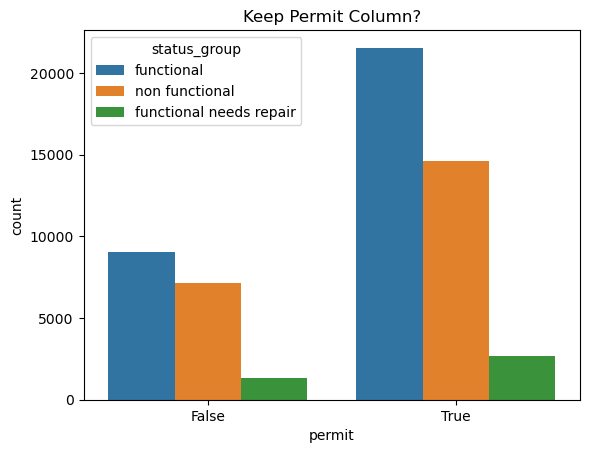

In [609]:
sns.countplot(x='permit', hue='status_group', data=full_df)
plt.title("Keep Permit Column?")
plt.show()

In [610]:
backup_df = full_df

In [611]:
backup_df['status_group'] = full_df['status_group'].astype('category').cat.codes
backup_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,basin,region,population,scheme_name,...,extraction_type,extraction_type_class,management,management_group,payment,water_quality,quantity,source,waterpoint_type,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,Lake Nyasa,Iringa,109,Roman,...,gravity,gravity,vwc,user-group,pay annually,soft,enough,spring,communal standpipe,0
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,Lake Victoria,Mara,280,NaN,...,gravity,gravity,wug,user-group,never pay,soft,insufficient,rainwater harvesting,communal standpipe,0
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,Pangani,Manyara,250,Nyumba ya mungu pipe scheme,...,gravity,gravity,vwc,user-group,pay per bucket,soft,enough,dam,communal standpipe multiple,0
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,Ruvuma / Southern Coast,Mtwara,58,NaN,...,submersible,submersible,vwc,user-group,never pay,soft,dry,machine dbh,communal standpipe multiple,2
4,19728,0.0,2011-07-13,Action In A,0,Artisan,Lake Victoria,Kagera,0,NaN,...,gravity,gravity,other,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,0


In [612]:
full_df['permit'] = full_df['permit'].astype('category').cat.codes
full_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,basin,region,population,scheme_name,...,extraction_type,extraction_type_class,management,management_group,payment,water_quality,quantity,source,waterpoint_type,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,Lake Nyasa,Iringa,109,Roman,...,gravity,gravity,vwc,user-group,pay annually,soft,enough,spring,communal standpipe,0
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,Lake Victoria,Mara,280,NaN,...,gravity,gravity,wug,user-group,never pay,soft,insufficient,rainwater harvesting,communal standpipe,0
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,Pangani,Manyara,250,Nyumba ya mungu pipe scheme,...,gravity,gravity,vwc,user-group,pay per bucket,soft,enough,dam,communal standpipe multiple,0
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,Ruvuma / Southern Coast,Mtwara,58,NaN,...,submersible,submersible,vwc,user-group,never pay,soft,dry,machine dbh,communal standpipe multiple,2
4,19728,0.0,2011-07-13,Action In A,0,Artisan,Lake Victoria,Kagera,0,NaN,...,gravity,gravity,other,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,0


In [613]:
full_df = full_df[full_df['status_group'] != -1]
print(f"Remaining rows with status_group = -1: {(full_df['status_group'] == -1).sum()}")
print(f"New dataset shape: {full_df.shape}")

Remaining rows with status_group = -1: 0
New dataset shape: (59400, 22)


In [614]:
numeric_df = full_df.select_dtypes(include=['number'])
print(numeric_df.corr()['status_group'])

id                   0.004049
amount_tsh          -0.053702
gps_height          -0.114029
population          -0.017759
permit              -0.019728
construction_year   -0.043342
status_group         1.000000
Name: status_group, dtype: float64


In [615]:
print(full_df.dtypes)

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
basin                     object
region                    object
population                 int64
scheme_name               object
permit                      int8
construction_year          int64
extraction_type           object
extraction_type_class     object
management                object
management_group          object
payment                   object
water_quality             object
quantity                  object
source                    object
waterpoint_type           object
status_group                int8
dtype: object


In [616]:
full_df = full_df.drop('permit', axis=1)
full_df

,id,amount_tsh,date_recorded,funder,gps_height,installer,basin,region,population,scheme_name,...,extraction_type,extraction_type_class,management,management_group,payment,water_quality,quantity,source,waterpoint_type,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,Lake Nyasa,Iringa,109,Roman,...,gravity,gravity,vwc,user-group,pay annually,soft,enough,spring,communal standpipe,0
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,Lake Victoria,Mara,280,NaN,...,gravity,gravity,wug,user-group,never pay,soft,insufficient,rainwater harvesting,communal standpipe,0
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,Pangani,Manyara,250,Nyumba ya mungu pipe scheme,...,gravity,gravity,vwc,user-group,pay per bucket,soft,enough,dam,communal standpipe multiple,0
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,Ruvuma / Southern Coast,Mtwara,58,NaN,...,submersible,submersible,vwc,user-group,never pay,soft,dry,machine dbh,communal standpipe multiple,2
4,19728,0.0,2011-07-13,Action In A,0,Artisan,Lake Victoria,Kagera,0,NaN,...,gravity,gravity,other,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,Pangani,Kilimanjaro,125,Losaa Kia water supply,...,gravity,gravity,water board,user-group,pay per bucket,soft,enough,spring,communal standpipe,0
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,Rufiji,Iringa,56,Ikondo electrical water sch,...,gravity,gravity,vwc,user-group,pay annually,soft,enough,river,communal standpipe,0
59397,37057,0.0,2011-04-11,NaN,0,NaN,Rufiji,Mbeya,0,NaN,...,swn 80,handpump,vwc,user-group,pay monthly,fluoride,enough,machine dbh,hand pump,0
59398,31282,0.0,2011-03-08,Malec,0,Musa,Rufiji,Dodoma,0,NaN,...,nira/tanira,handpump,vwc,user-group,never pay,soft,insufficient,shallow well,hand pump,0


In [617]:
categorical = full_df.select_dtypes(include= ['object']).columns.to_list()
categorical

['date_recorded',
 'funder',
 'installer',
 'basin',
 'region',
 'scheme_name',
 'extraction_type',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'water_quality',
 'quantity',
 'source',
 'waterpoint_type']

In [618]:
types = pd.DataFrame(
    full_df[categorical].dtypes,
    columns=['Data Type']
)

types

,Data Type
date_recorded,object
funder,object
installer,object
basin,object
region,object
scheme_name,object
extraction_type,object
extraction_type_class,object
management,object
management_group,object


In [619]:
for col in categorical:
    full_df[col] = full_df[col].str.lower().str.strip()

In [620]:
for col in categorical:
    print(f"Unique values in {col}:\n", full_df[col].value_counts(), "\n")

Unique values in date_recorded:
 date_recorded
2011-03-15    572
2011-03-17    558
2013-02-03    546
2011-03-14    520
2011-03-16    513
             ... 
2011-09-11      1
2011-08-31      1
2011-09-21      1
2011-08-30      1
2013-12-01      1
Name: count, Length: 356, dtype: int64 

Unique values in funder:
 funder
government of tanzania    9084
danida                    3114
hesawa                    2202
rwssp                     1374
world bank                1349
                          ... 
muwasa                       1
msigw                        1
rc mofu                      1
overland high school         1
samlo                        1
Name: count, Length: 1896, dtype: int64 

Unique values in installer:
 installer
dwe             17405
government       1891
hesawa           1395
rwe              1206
commu            1065
                ...  
amadi               1
jafary mbaga        1
sa                  1
luleka              1
selepta             1
Name: count, Leng

In [621]:
full_df[categorical] = full_df[categorical].fillna("unknown")

In [622]:
full_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,basin,region,population,scheme_name,...,extraction_type,extraction_type_class,management,management_group,payment,water_quality,quantity,source,waterpoint_type,status_group
0,69572,6000.0,2011-03-14,roman,1390,roman,lake nyasa,iringa,109,roman,...,gravity,gravity,vwc,user-group,pay annually,soft,enough,spring,communal standpipe,0
1,8776,0.0,2013-03-06,grumeti,1399,grumeti,lake victoria,mara,280,unknown,...,gravity,gravity,wug,user-group,never pay,soft,insufficient,rainwater harvesting,communal standpipe,0
2,34310,25.0,2013-02-25,lottery club,686,world vision,pangani,manyara,250,nyumba ya mungu pipe scheme,...,gravity,gravity,vwc,user-group,pay per bucket,soft,enough,dam,communal standpipe multiple,0
3,67743,0.0,2013-01-28,unicef,263,unicef,ruvuma / southern coast,mtwara,58,unknown,...,submersible,submersible,vwc,user-group,never pay,soft,dry,machine dbh,communal standpipe multiple,2
4,19728,0.0,2011-07-13,action in a,0,artisan,lake victoria,kagera,0,unknown,...,gravity,gravity,other,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,0


/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_1131/2272151946.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="region", y="count", data=region_counts, palette="Reds_r")


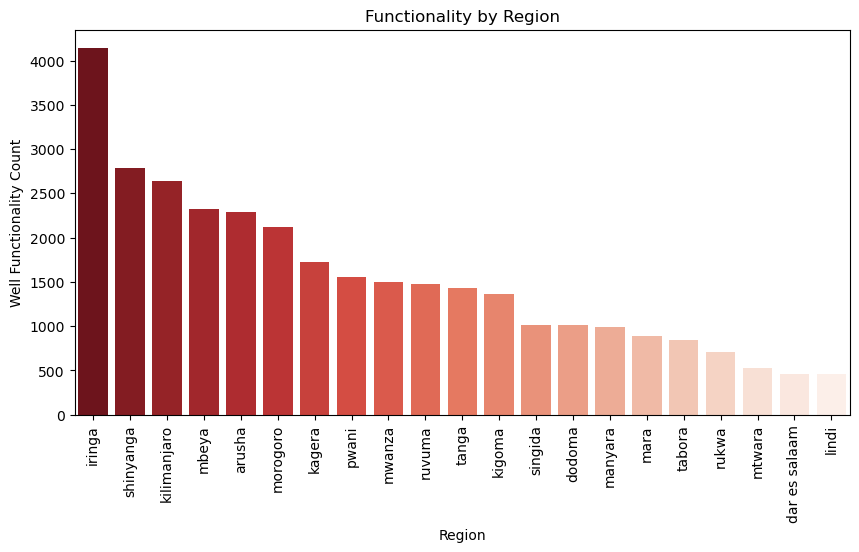

In [623]:
region_counts = full_df[full_df["status_group"] == 0]["region"].value_counts().reset_index()
region_counts.columns = ["region", "count"]

plt.figure(figsize=(10, 5))
sns.barplot(x="region", y="count", data=region_counts, palette="Reds_r")
plt.xlabel("Region")
plt.ylabel("Well Functionality Count")
plt.title("Functionality by Region")
plt.xticks(rotation=90)
plt.show()

In [624]:
full_df['region'].value_counts()

region
iringa           5294
shinyanga        4982
mbeya            4639
kilimanjaro      4379
morogoro         4006
arusha           3350
kagera           3316
mwanza           3102
kigoma           2816
ruvuma           2640
pwani            2635
tanga            2547
dodoma           2201
singida          2093
mara             1969
tabora           1959
rukwa            1808
mtwara           1730
manyara          1583
lindi            1546
dar es salaam     805
Name: count, dtype: int64

/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_1131/2302165471.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=full_df["basin"], y=full_df["status_group"], palette="Blues_r")


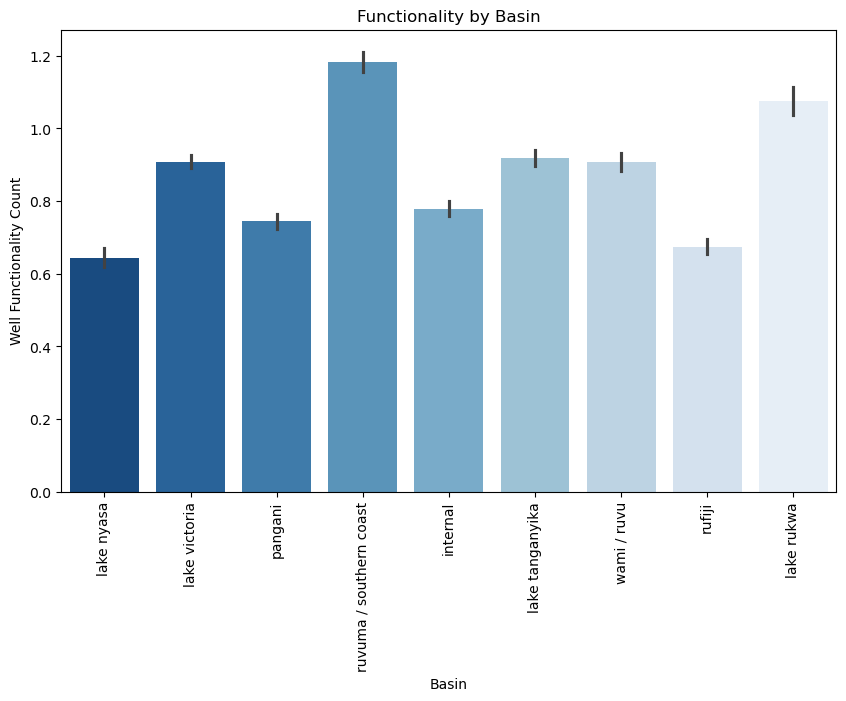

In [625]:
basin_counts = full_df[full_df["status_group"] == 0]["basin"].value_counts().reset_index()
basin_counts.columns = ["basin", "count"]

plt.figure(figsize=(10, 6))
sns.barplot(x=full_df["basin"], y=full_df["status_group"], palette="Blues_r")
plt.xlabel("Basin")
plt.ylabel("Well Functionality Count")
plt.title("Functionality by Basin")
plt.xticks(rotation=90)
plt.show()

/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_1131/2660479009.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="extraction_type", y="count", data=extraction_type_counts, palette="Reds_r")


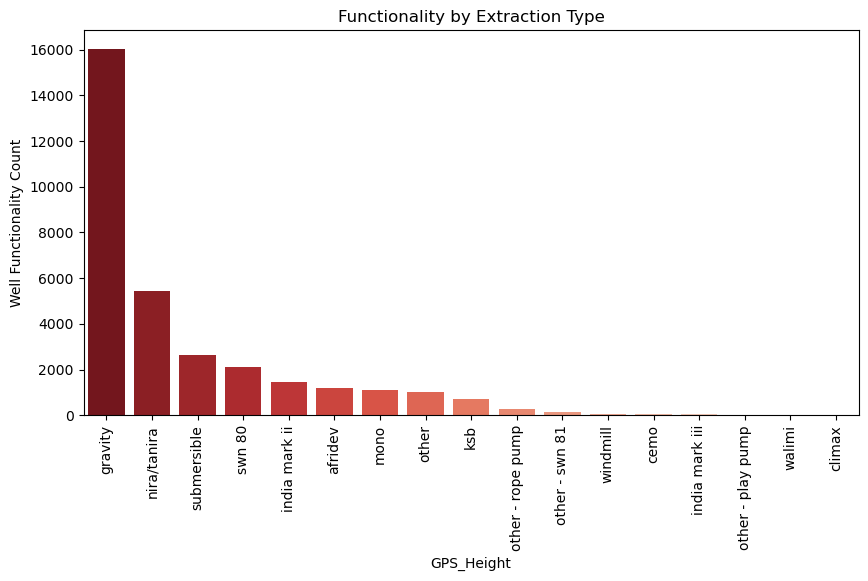

In [626]:
extraction_type_counts = full_df[full_df["status_group"] == 0]["extraction_type"].value_counts().reset_index()
extraction_type_counts.columns = ["extraction_type", "count"]

plt.figure(figsize=(10, 5))
sns.barplot(x="extraction_type", y="count", data=extraction_type_counts, palette="Reds_r")
plt.xlabel("GPS_Height")
plt.ylabel("Well Functionality Count")
plt.title("Functionality by Extraction Type")
plt.xticks(rotation=90)
plt.show()

/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_1131/3668846308.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=full_df["water_quality"], y=full_df["status_group"], palette="Blues_r")


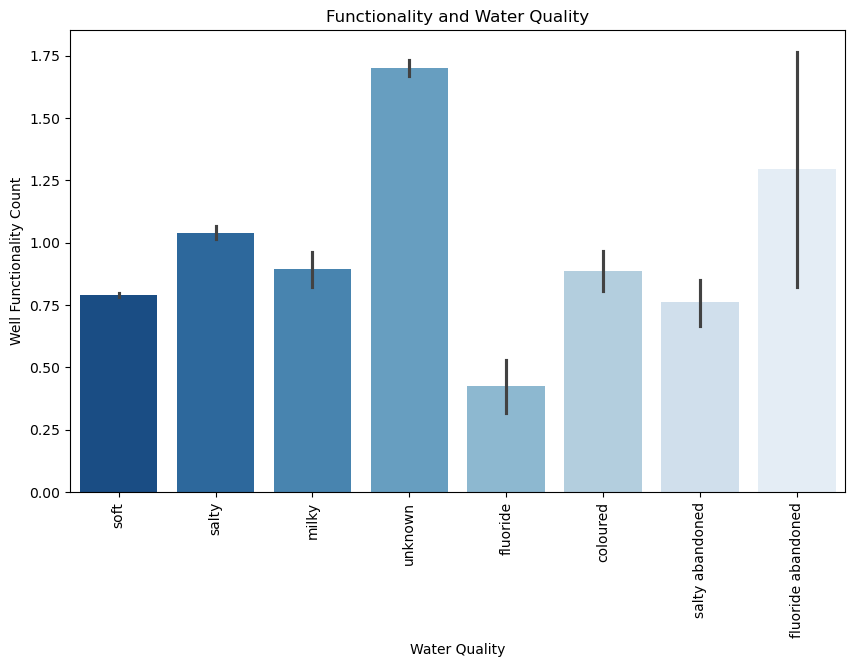

In [627]:
quality_counts = full_df[full_df["status_group"] == 0]["water_quality"].value_counts().reset_index()
quality_counts.columns = ["water_quality", "count"]

plt.figure(figsize=(10, 6))
sns.barplot(x=full_df["water_quality"], y=full_df["status_group"], palette="Blues_r")
plt.xlabel("Water Quality")
plt.ylabel("Well Functionality Count")
plt.title("Functionality and Water Quality")
plt.xticks(rotation=90)
plt.show()

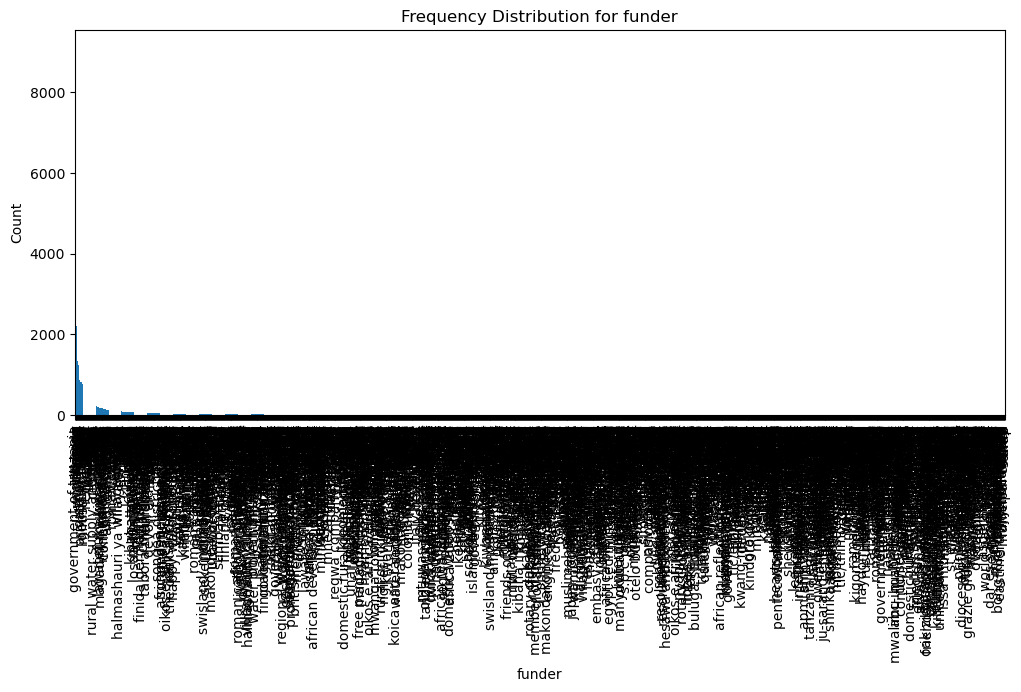

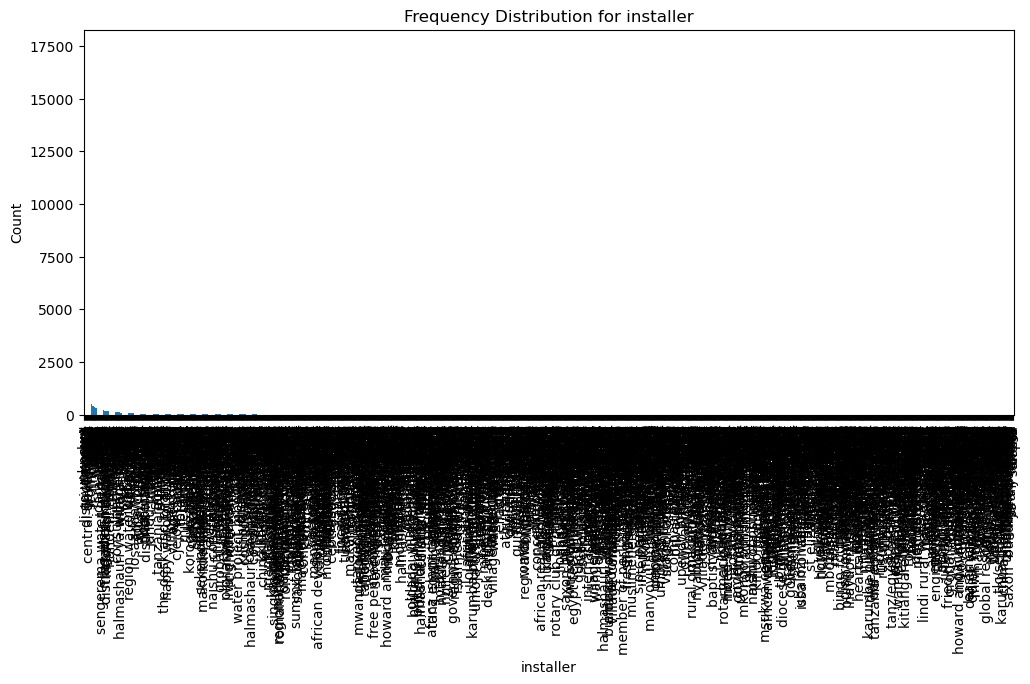

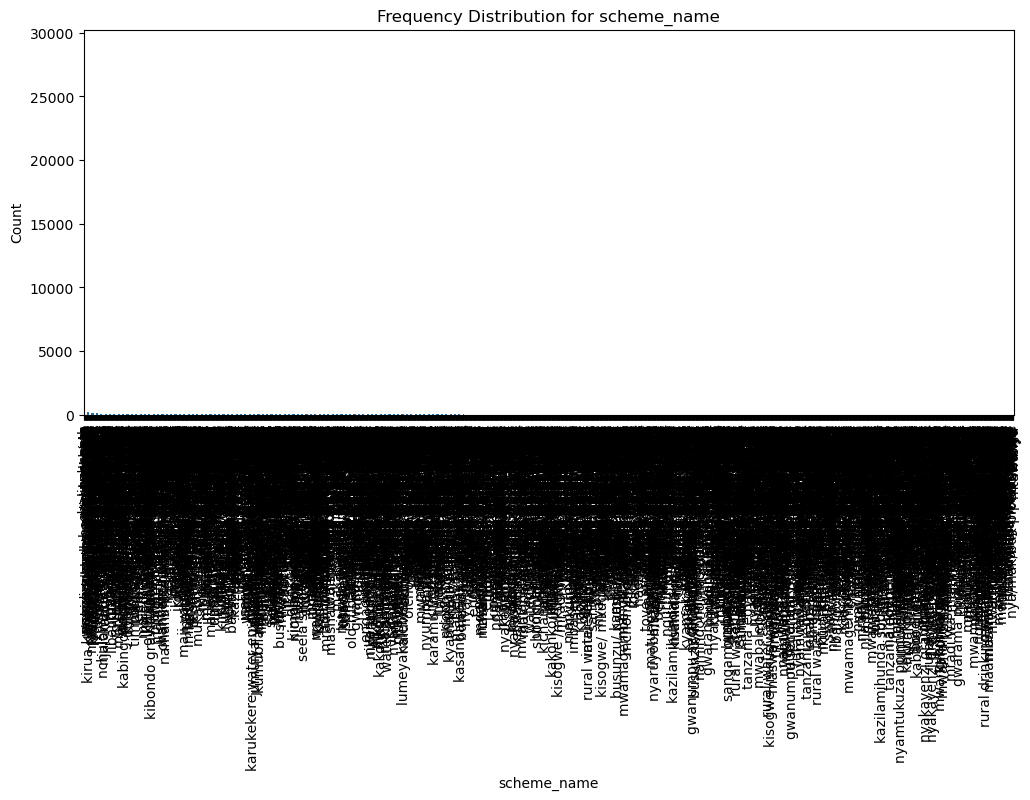

In [628]:
high_cardinality_categoricals = ['funder', 'installer', 'scheme_name']

for col in high_cardinality_categoricals:
    plt.figure(figsize=(12,5))
    full_df[col].value_counts().plot(kind='bar')
    plt.title(f"Frequency Distribution for {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

In [629]:
for col in high_cardinality_categoricals:
    value_counts = full_df[col].value_counts(normalize=True).cumsum()
    print(f"\n[col] - Cumulative Distribution:")
    print(value_counts.head(20))


[col] - Cumulative Distribution:
funder
government of tanzania    0.152929
unknown                   0.214226
danida                    0.266650
hesawa                    0.303721
rwssp                     0.326852
world bank                0.349562
kkkt                      0.371229
world vision              0.392205
unicef                    0.410000
tasaf                     0.424764
district council          0.438956
dhv                       0.452912
private individual        0.466818
dwsp                      0.480471
0                         0.493552
norad                     0.506431
germany republi           0.516700
tcrs                      0.526835
ministry of water         0.536768
water                     0.546582
Name: proportion, dtype: float64

[col] - Cumulative Distribution:
installer
dwe                   0.293013
unknown               0.354613
government            0.386448
hesawa                0.409933
rwe                   0.430236
commu                 0.448

In [630]:
from sklearn.feature_selection import chi2
import numpy as np

for col in high_cardinality_categoricals:
    X = pd.get_dummies(full_df[col], drop_first=True)  # One-hot encode categories
    y = full_df['status_group']  # Target variable

    chi_scores, p_values = chi2(X, y)
    chi_results = pd.DataFrame({"Category": X.columns, "Chi2": chi_scores, "p-value": p_values})
    chi_results = chi_results.sort_values(by="Chi2", ascending=False)

    print(f"\n{col} - Top 20 Categories by Chi-Square Importance:")
    print(chi_results.head(20))  # Show the most significant categories


funder - Top 20 Categories by Chi-Square Importance:
                     Category        Chi2        p-value
455    government of tanzania  694.831216  1.316189e-151
344                      dwsp  508.758234  3.346209e-111
587                       isf  388.141343   5.202095e-85
389                fini water  345.385611   1.001077e-75
435           germany republi  285.245585   1.147382e-62
1270       private individual  284.606237   1.579577e-62
1137                    norad  281.728518   6.659315e-62
417                        fw  213.912100   3.544686e-47
179                 ces(gmbh)  183.483701   1.435557e-40
791                       lga  170.746450   8.372967e-38
970         ministry of water  167.077460   5.243129e-37
1748                  unknown  135.230796   4.315249e-30
854   magadini-makiwaru water  133.047224   1.285767e-29
512                    hesawa  130.558801   4.461868e-29
1863               world bank  116.721629   4.510454e-26
1320                rc church  113

In [631]:
full_df['installer'] = full_df['installer'].dropna()

In [632]:
full_df['installer'] =full_df['installer'].str.strip()

In [633]:
full_df['installer'] = full_df['installer'].str.lower()
full_df['installer'] = full_df['installer'].str.replace('[^a-zA-Z0-9]', '', regex=True)

In [634]:
full_df['funder'] = full_df['funder'].dropna()
full_df['funder'] = full_df['funder'].str.strip()
full_df['funder'] = full_df['funder'].str.lower()
full_df['funder'] = full_df['funder'].str.replace('[^a-zA-Z0-9]', '', regex=True)

In [635]:
full_df['scheme_name'] = full_df['scheme_name'].dropna()
full_df['scheme_name'] = full_df['scheme_name'].str.strip()
full_df['scheme_name'] = full_df['scheme_name'].str.lower()
full_df['scheme_name'] = full_df['scheme_name'].str.replace('[^a-zA-Z0-9]', '', regex=True)

In [636]:
funder_cardinal = full_df['funder']
funder_cardinal.head()

0          roman
1        grumeti
2    lotteryclub
3         unicef
4      actionina
Name: funder, dtype: object

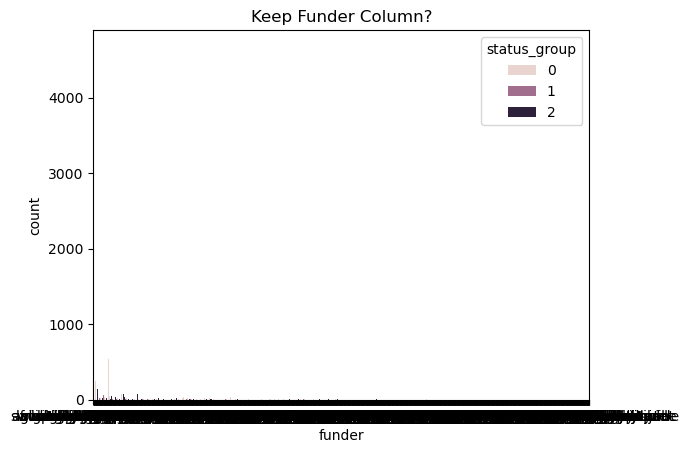

In [637]:
sns.countplot(x='funder', hue='status_group', data=full_df)
plt.title("Keep Funder Column?")
plt.show()

In [638]:
print(funder_cardinal.index.duplicated().sum())

0



installer - Cumulative Distribution:

installer
dwe                  0.293401
unknown              0.355000
government           0.386835
hesawa               0.410320
rwe                  0.430623
commu                0.448552
danida               0.466229
districtcouncil      0.482475
kkkt                 0.497795
0                    0.510875
centralgovernment    0.523721
tcrs                 0.535623
worldvision          0.547391
danid                0.557896
ces                  0.568165
community            0.577508
gover                0.586111
amref                0.593569
tasaf                0.600572
lga                  0.607525
wedeco               0.614226
finiwater            0.620774
dmdd                 0.627104
norad                0.633266
twesa                0.638586
da                   0.643771
wu                   0.648838
acra                 0.653519
sema                 0.657710
dw                   0.661886
Name: proportion, dtype: float64


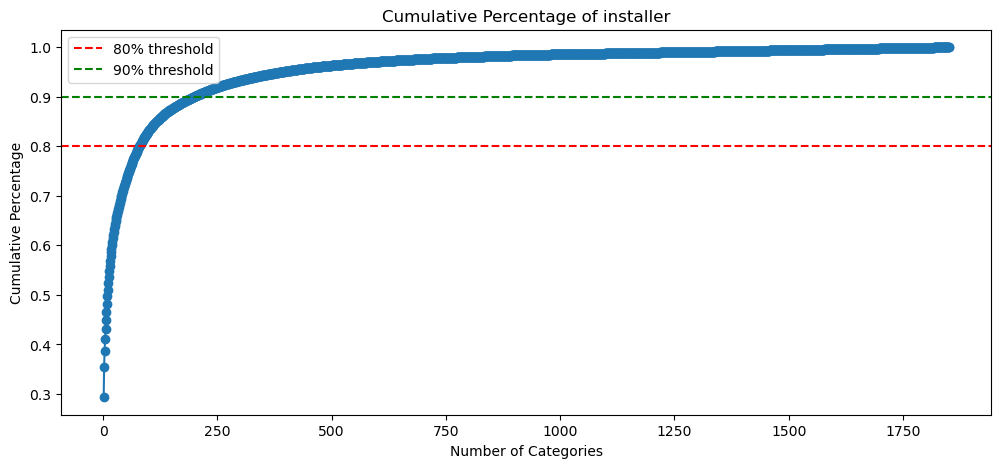

In [639]:
def display_cumulative_percentage(df, column):
    value_counts = df[column].value_counts(normalize=True).cumsum()
    
    print(f"\n{column} - Cumulative Distribution:\n")
    print(value_counts.head(30))

    plt.figure(figsize=(12, 5))
    plt.plot(range(1, len(value_counts) + 1), value_counts, marker='o', linestyle='-')
    plt.xlabel("Number of Categories")
    plt.ylabel("Cumulative Percentage")
    plt.title(f"Cumulative Percentage of {column}")
    plt.axhline(y=0.8, color='r', linestyle='--', label='80% threshold')
    plt.axhline(y=0.9, color='g', linestyle='--', label='90% threshold')
    plt.legend()
    plt.show()

display_cumulative_percentage(full_df, 'installer')


funder - Cumulative Distribution:

funder
governmentoftanzania    0.152929
unknown                 0.214226
danida                  0.266650
hesawa                  0.303721
rwssp                   0.326852
worldbank               0.349562
kkkt                    0.371229
worldvision             0.392222
unicef                  0.410017
tasaf                   0.424781
districtcouncil         0.438973
dhv                     0.452929
privateindividual       0.466835
dwsp                    0.480488
0                       0.493569
norad                   0.506448
germanyrepubli          0.516717
tcrs                    0.526852
ministryofwater         0.536785
water                   0.546599
dwe                     0.554747
netherlands             0.562660
hifab                   0.570236
adb                     0.577778
lga                     0.585219
cesgmbh                 0.592374
amref                   0.599529
finiwater               0.606145
oxfam                   0.612189


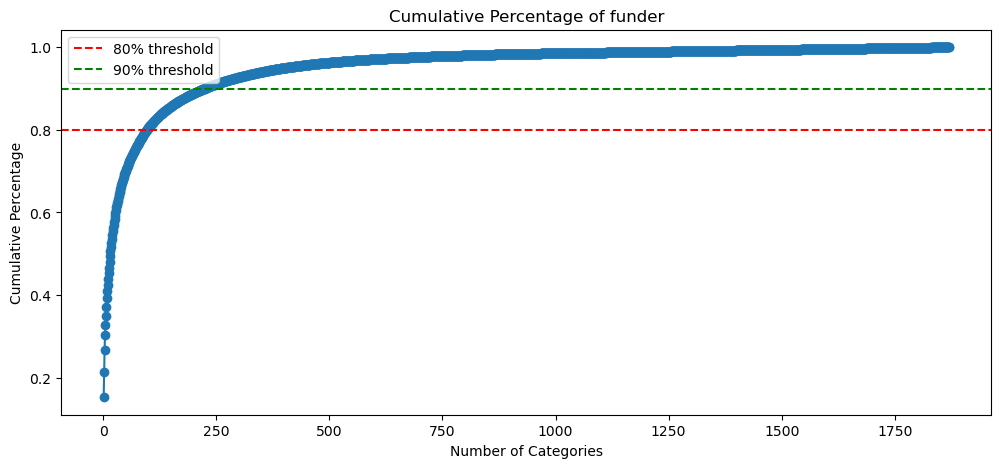

In [640]:
def display_cumulative_percentage(df, column):
    value_counts = df[column].value_counts(normalize=True).cumsum()
    
    print(f"\n{column} - Cumulative Distribution:\n")
    print(value_counts.head(30))

    plt.figure(figsize=(12, 5))
    plt.plot(range(1, len(value_counts) + 1), value_counts, marker='o', linestyle='-')
    plt.xlabel("Number of Categories")
    plt.ylabel("Cumulative Percentage")
    plt.title(f"Cumulative Percentage of {column}")
    plt.axhline(y=0.8, color='r', linestyle='--', label='80% threshold')
    plt.axhline(y=0.9, color='g', linestyle='--', label='90% threshold')
    plt.legend()
    plt.show()

display_cumulative_percentage(full_df, 'funder')


scheme_name - Cumulative Distribution:

scheme_name
unknown                             0.485017
k                                   0.496549
borehole                            0.505825
chalinzewate                        0.512660
m                                   0.519394
danida                              0.525774
government                          0.531162
bagamoyowate                        0.536145
nganawatersuppliedscheme            0.540690
wangingombewatersupplys             0.545084
wangingombesupplyscheme             0.549057
i                                   0.552912
urokibomangombewatersup             0.556515
lyamungoumbwewatersupply            0.560084
n                                   0.563519
losaakiawatersupply                 0.566953
kiruakahegravitywatersupplytrust    0.570202
machumbaestatepipeline              0.573316
makwalewatersuppliedsche            0.576111
kijiji                              0.578822
mkongoroone                         0.581465
s 

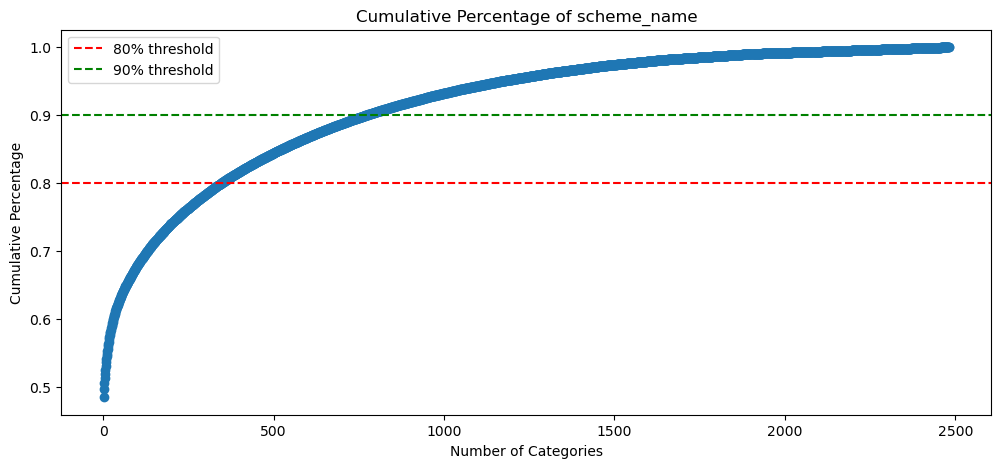

In [641]:
def display_cumulative_percentage(df, column):
    value_counts = df[column].value_counts(normalize=True).cumsum()
    
    print(f"\n{column} - Cumulative Distribution:\n")
    print(value_counts.head(30))

    plt.figure(figsize=(12, 5))
    plt.plot(range(1, len(value_counts) + 1), value_counts, marker='o', linestyle='-')
    plt.xlabel("Number of Categories")
    plt.ylabel("Cumulative Percentage")
    plt.title(f"Cumulative Percentage of {column}")
    plt.axhline(y=0.8, color='r', linestyle='--', label='80% threshold')
    plt.axhline(y=0.9, color='g', linestyle='--', label='90% threshold')
    plt.legend()
    plt.show()

display_cumulative_percentage(full_df, 'scheme_name')

In [642]:
full_df.drop('scheme_name', axis=1)

,id,amount_tsh,date_recorded,funder,gps_height,installer,basin,region,population,construction_year,extraction_type,extraction_type_class,management,management_group,payment,water_quality,quantity,source,waterpoint_type,status_group
0,69572,6000.0,2011-03-14,roman,1390,roman,lake nyasa,iringa,109,1999,gravity,gravity,vwc,user-group,pay annually,soft,enough,spring,communal standpipe,0
1,8776,0.0,2013-03-06,grumeti,1399,grumeti,lake victoria,mara,280,2010,gravity,gravity,wug,user-group,never pay,soft,insufficient,rainwater harvesting,communal standpipe,0
2,34310,25.0,2013-02-25,lotteryclub,686,worldvision,pangani,manyara,250,2009,gravity,gravity,vwc,user-group,pay per bucket,soft,enough,dam,communal standpipe multiple,0
3,67743,0.0,2013-01-28,unicef,263,unicef,ruvuma / southern coast,mtwara,58,1986,submersible,submersible,vwc,user-group,never pay,soft,dry,machine dbh,communal standpipe multiple,2
4,19728,0.0,2011-07-13,actionina,0,artisan,lake victoria,kagera,0,0,gravity,gravity,other,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,germanyrepubli,1210,ces,pangani,kilimanjaro,125,1999,gravity,gravity,water board,user-group,pay per bucket,soft,enough,spring,communal standpipe,0
59396,27263,4700.0,2011-05-07,cefanjombe,1212,cefa,rufiji,iringa,56,1996,gravity,gravity,vwc,user-group,pay annually,soft,enough,river,communal standpipe,0
59397,37057,0.0,2011-04-11,unknown,0,unknown,rufiji,mbeya,0,0,swn 80,handpump,vwc,user-group,pay monthly,fluoride,enough,machine dbh,hand pump,0
59398,31282,0.0,2011-03-08,malec,0,musa,rufiji,dodoma,0,0,nira/tanira,handpump,vwc,user-group,never pay,soft,insufficient,shallow well,hand pump,0


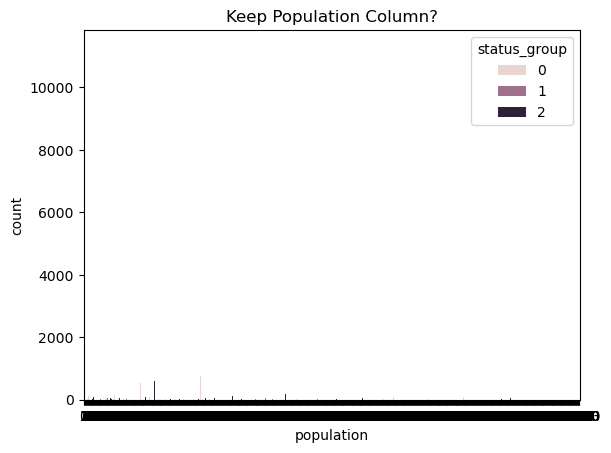

In [643]:
sns.countplot(x='population', hue='status_group', data=full_df)
plt.title("Keep Population Column?")
plt.show()

In [644]:
print(full_df.groupby('population')['status_group'].value_counts(normalize=True))

population  status_group
0           0               0.527291
            2               0.389692
            1               0.083018
1           2               0.535231
            0               0.414377
                              ...   
9865        2               1.000000
10000       0               1.000000
11463       0               1.000000
15300       1               1.000000
30500       0               1.000000
Name: proportion, Length: 1939, dtype: float64


In [645]:
full_df['date_recorded'] = pd.to_datetime(full_df['date_recorded'])
full_df['year_recorded'] = full_df['date_recorded'].dt.year
full_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,basin,region,population,scheme_name,...,extraction_type_class,management,management_group,payment,water_quality,quantity,source,waterpoint_type,status_group,year_recorded
0,69572,6000.0,2011-03-14,roman,1390,roman,lake nyasa,iringa,109,roman,...,gravity,vwc,user-group,pay annually,soft,enough,spring,communal standpipe,0,2011
1,8776,0.0,2013-03-06,grumeti,1399,grumeti,lake victoria,mara,280,unknown,...,gravity,wug,user-group,never pay,soft,insufficient,rainwater harvesting,communal standpipe,0,2013
2,34310,25.0,2013-02-25,lotteryclub,686,worldvision,pangani,manyara,250,nyumbayamungupipescheme,...,gravity,vwc,user-group,pay per bucket,soft,enough,dam,communal standpipe multiple,0,2013
3,67743,0.0,2013-01-28,unicef,263,unicef,ruvuma / southern coast,mtwara,58,unknown,...,submersible,vwc,user-group,never pay,soft,dry,machine dbh,communal standpipe multiple,2,2013
4,19728,0.0,2011-07-13,actionina,0,artisan,lake victoria,kagera,0,unknown,...,gravity,other,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,0,2011


In [646]:
full_df = full_df.drop(['id', 'date_recorded'], axis=1)
full_df.head()

,amount_tsh,funder,gps_height,installer,basin,region,population,scheme_name,construction_year,extraction_type,extraction_type_class,management,management_group,payment,water_quality,quantity,source,waterpoint_type,status_group,year_recorded
0,6000.0,roman,1390,roman,lake nyasa,iringa,109,roman,1999,gravity,gravity,vwc,user-group,pay annually,soft,enough,spring,communal standpipe,0,2011
1,0.0,grumeti,1399,grumeti,lake victoria,mara,280,unknown,2010,gravity,gravity,wug,user-group,never pay,soft,insufficient,rainwater harvesting,communal standpipe,0,2013
2,25.0,lotteryclub,686,worldvision,pangani,manyara,250,nyumbayamungupipescheme,2009,gravity,gravity,vwc,user-group,pay per bucket,soft,enough,dam,communal standpipe multiple,0,2013
3,0.0,unicef,263,unicef,ruvuma / southern coast,mtwara,58,unknown,1986,submersible,submersible,vwc,user-group,never pay,soft,dry,machine dbh,communal standpipe multiple,2,2013
4,0.0,actionina,0,artisan,lake victoria,kagera,0,unknown,0,gravity,gravity,other,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,0,2011


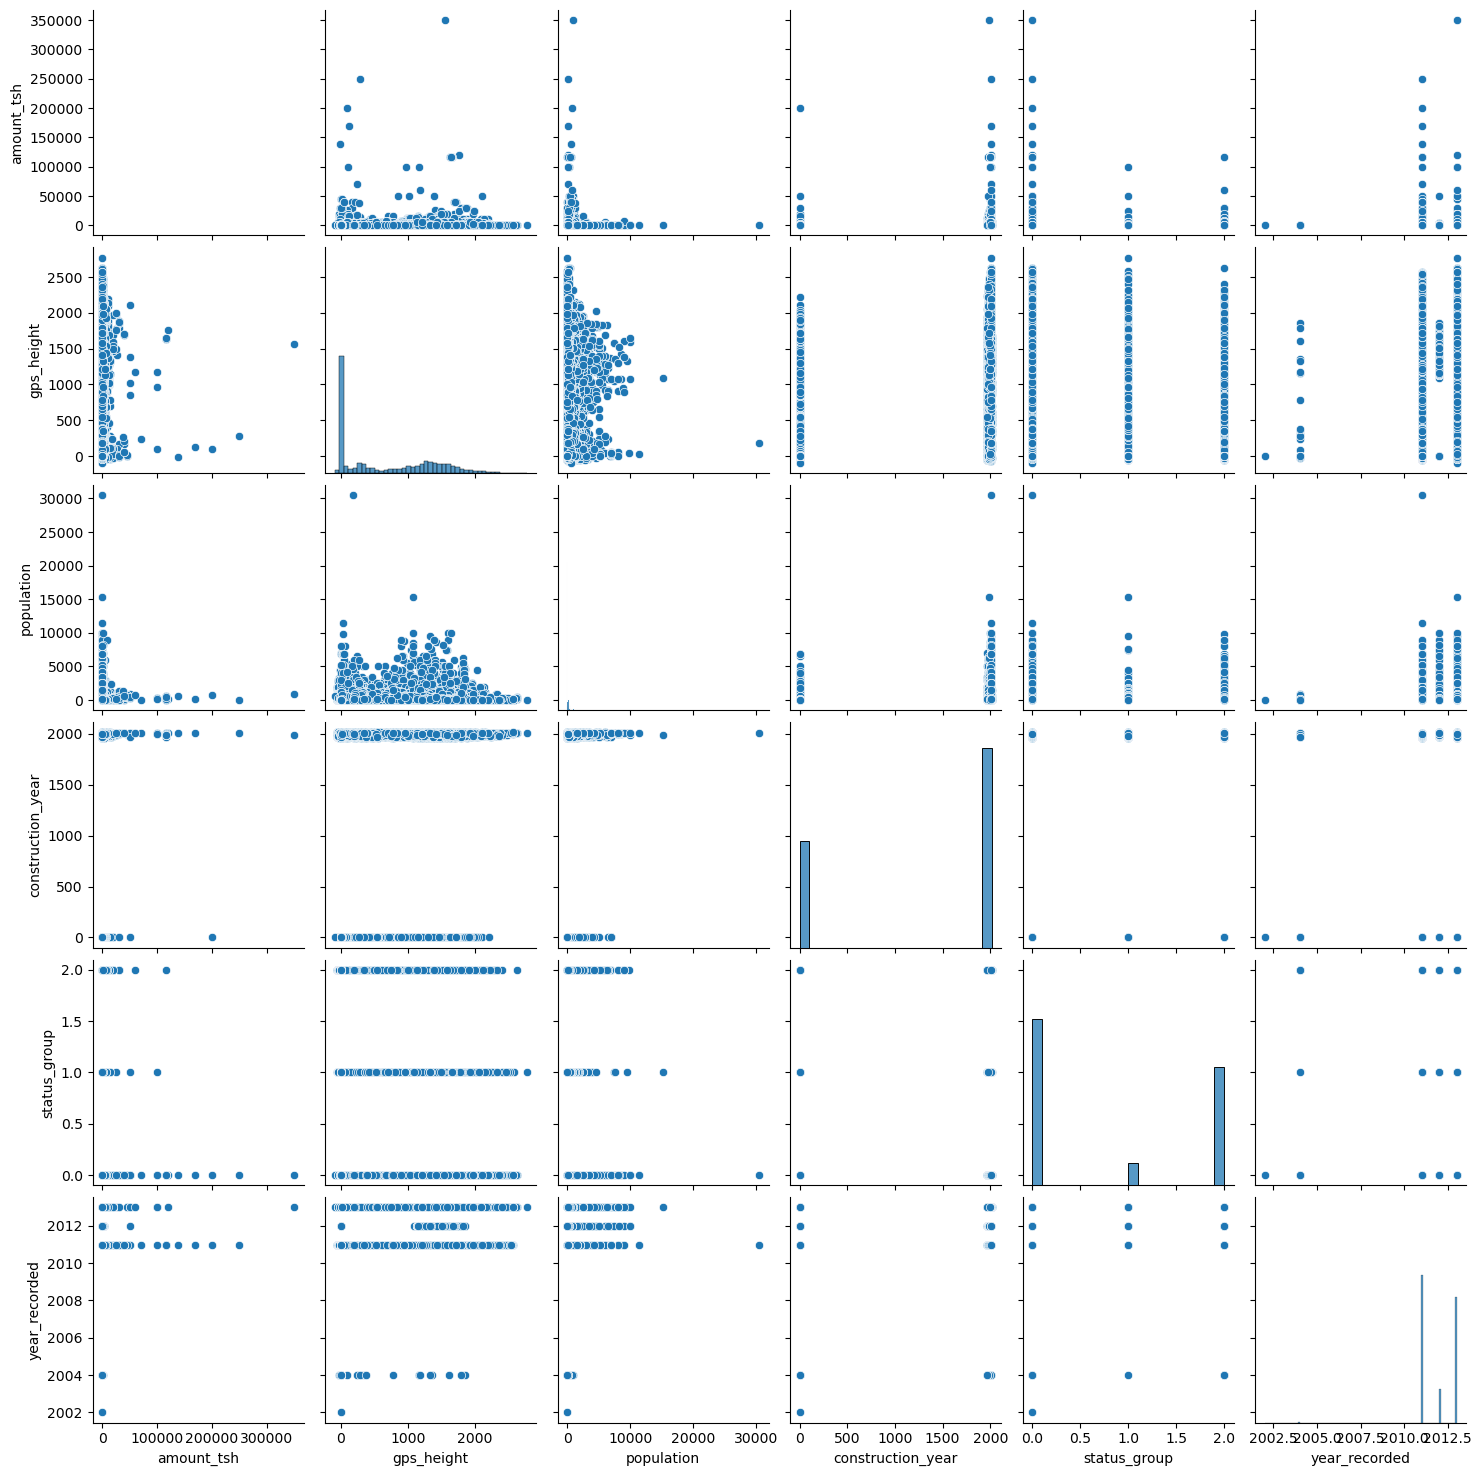

In [647]:
sns.pairplot(full_df)
plt.show()

In [648]:
backup_df = full_df

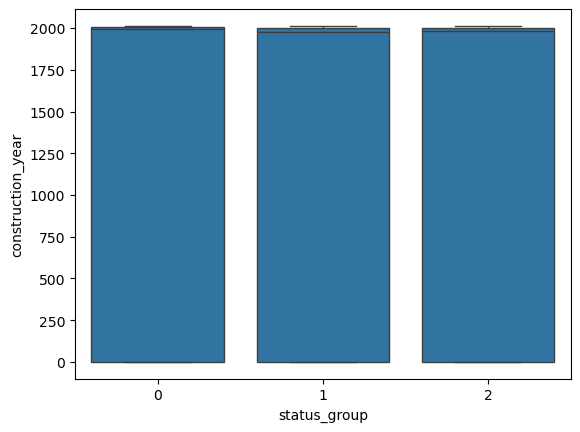

In [649]:
sns.boxplot(x='status_group', y='construction_year', data=full_df)
plt.show()

In [650]:
full_df['scheme_name'].nunique()

2482

In [651]:
full_df['scheme_name'].value_counts()

scheme_name
unknown         28810
k                 685
borehole          551
chalinzewate      406
m                 400
                ...  
mshinde             1
wd                  1
nguj                1
tasafdam            1
mtawanya            1
Name: count, Length: 2482, dtype: int64

In [652]:
full_df = full_df.drop('scheme_name', axis=1)
full_df.head()

,amount_tsh,funder,gps_height,installer,basin,region,population,construction_year,extraction_type,extraction_type_class,management,management_group,payment,water_quality,quantity,source,waterpoint_type,status_group,year_recorded
0,6000.0,roman,1390,roman,lake nyasa,iringa,109,1999,gravity,gravity,vwc,user-group,pay annually,soft,enough,spring,communal standpipe,0,2011
1,0.0,grumeti,1399,grumeti,lake victoria,mara,280,2010,gravity,gravity,wug,user-group,never pay,soft,insufficient,rainwater harvesting,communal standpipe,0,2013
2,25.0,lotteryclub,686,worldvision,pangani,manyara,250,2009,gravity,gravity,vwc,user-group,pay per bucket,soft,enough,dam,communal standpipe multiple,0,2013
3,0.0,unicef,263,unicef,ruvuma / southern coast,mtwara,58,1986,submersible,submersible,vwc,user-group,never pay,soft,dry,machine dbh,communal standpipe multiple,2,2013
4,0.0,actionina,0,artisan,lake victoria,kagera,0,0,gravity,gravity,other,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,0,2011


In [653]:
def reduce_cardinality(full_df, installer, top_percent=5):
    # Get value counts as a percentage
    value_counts = full_df['installer'].value_counts(normalize=True)

    # Get cumulative percentage
    cumulative = value_counts.cumsum()

    # Get the threshold for top X% categories
    num_top = int(len(value_counts) * (top_percent / 100))

    # Select top categories
    top_categories = value_counts.iloc[:num_top].index

    # Replace infrequent categories with 'Other'
    full_df['installer'] = full_df[installer].apply(lambda x: x if x in top_categories else 'Other')
    
    return full_df

# Apply function to both columns
full_df = reduce_cardinality(full_df, 'installer', top_percent=5)

# Check results
full_df['installer'].value_counts()


installer
dwe             17428
Other           10628
unknown          3659
government       1891
hesawa           1395
                ...  
roman              94
oikoseafrica       93
vwc                91
cefa               90
missi              87
Name: count, Length: 93, dtype: int64

In [654]:
def reduce_cardinality(full_df, funder, top_percent=5):
    # Get value counts as a percentage
    value_counts = full_df['funder'].value_counts(normalize=True)

    # Get cumulative percentage
    cumulative = value_counts.cumsum()

    # Get the threshold for top X% categories
    num_top = int(len(value_counts) * (top_percent / 100))

    # Select top categories
    top_categories = value_counts.iloc[:num_top].index

    # Replace infrequent categories with 'Other'
    full_df['funder'] = full_df[funder].apply(lambda x: x if x in top_categories else 'Other')
    
    return full_df

# Apply function to both columns
full_df = reduce_cardinality(full_df, 'funder', top_percent=5)

# Check results
full_df['funder'].value_counts()

funder
Other                         12170
governmentoftanzania           9084
unknown                        3641
danida                         3114
hesawa                         2202
                              ...  
halmashauriyawilayasikonge      102
germany                         101
hsw                             101
finwater                        101
twe                              97
Name: count, Length: 94, dtype: int64

In [655]:
full_df = full_df.drop('population', axis=1)
full_df.head()

,amount_tsh,funder,gps_height,installer,basin,region,construction_year,extraction_type,extraction_type_class,management,management_group,payment,water_quality,quantity,source,waterpoint_type,status_group,year_recorded
0,6000.0,roman,1390,roman,lake nyasa,iringa,1999,gravity,gravity,vwc,user-group,pay annually,soft,enough,spring,communal standpipe,0,2011
1,0.0,Other,1399,Other,lake victoria,mara,2010,gravity,gravity,wug,user-group,never pay,soft,insufficient,rainwater harvesting,communal standpipe,0,2013
2,25.0,Other,686,worldvision,pangani,manyara,2009,gravity,gravity,vwc,user-group,pay per bucket,soft,enough,dam,communal standpipe multiple,0,2013
3,0.0,unicef,263,unicef,ruvuma / southern coast,mtwara,1986,submersible,submersible,vwc,user-group,never pay,soft,dry,machine dbh,communal standpipe multiple,2,2013
4,0.0,Other,0,artisan,lake victoria,kagera,0,gravity,gravity,other,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,0,2011


In [656]:
backup_df.head()

,amount_tsh,funder,gps_height,installer,basin,region,population,scheme_name,construction_year,extraction_type,extraction_type_class,management,management_group,payment,water_quality,quantity,source,waterpoint_type,status_group,year_recorded
0,6000.0,roman,1390,roman,lake nyasa,iringa,109,roman,1999,gravity,gravity,vwc,user-group,pay annually,soft,enough,spring,communal standpipe,0,2011
1,0.0,grumeti,1399,grumeti,lake victoria,mara,280,unknown,2010,gravity,gravity,wug,user-group,never pay,soft,insufficient,rainwater harvesting,communal standpipe,0,2013
2,25.0,lotteryclub,686,worldvision,pangani,manyara,250,nyumbayamungupipescheme,2009,gravity,gravity,vwc,user-group,pay per bucket,soft,enough,dam,communal standpipe multiple,0,2013
3,0.0,unicef,263,unicef,ruvuma / southern coast,mtwara,58,unknown,1986,submersible,submersible,vwc,user-group,never pay,soft,dry,machine dbh,communal standpipe multiple,2,2013
4,0.0,actionina,0,artisan,lake victoria,kagera,0,unknown,0,gravity,gravity,other,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,0,2011


In [657]:
full_df = backup_df
full_df.head()

,amount_tsh,funder,gps_height,installer,basin,region,population,scheme_name,construction_year,extraction_type,extraction_type_class,management,management_group,payment,water_quality,quantity,source,waterpoint_type,status_group,year_recorded
0,6000.0,roman,1390,roman,lake nyasa,iringa,109,roman,1999,gravity,gravity,vwc,user-group,pay annually,soft,enough,spring,communal standpipe,0,2011
1,0.0,grumeti,1399,grumeti,lake victoria,mara,280,unknown,2010,gravity,gravity,wug,user-group,never pay,soft,insufficient,rainwater harvesting,communal standpipe,0,2013
2,25.0,lotteryclub,686,worldvision,pangani,manyara,250,nyumbayamungupipescheme,2009,gravity,gravity,vwc,user-group,pay per bucket,soft,enough,dam,communal standpipe multiple,0,2013
3,0.0,unicef,263,unicef,ruvuma / southern coast,mtwara,58,unknown,1986,submersible,submersible,vwc,user-group,never pay,soft,dry,machine dbh,communal standpipe multiple,2,2013
4,0.0,actionina,0,artisan,lake victoria,kagera,0,unknown,0,gravity,gravity,other,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,0,2011


In [658]:
full_df = full_df.drop(['scheme_name', 'population'], axis=1)
full_df.head()

,amount_tsh,funder,gps_height,installer,basin,region,construction_year,extraction_type,extraction_type_class,management,management_group,payment,water_quality,quantity,source,waterpoint_type,status_group,year_recorded
0,6000.0,roman,1390,roman,lake nyasa,iringa,1999,gravity,gravity,vwc,user-group,pay annually,soft,enough,spring,communal standpipe,0,2011
1,0.0,grumeti,1399,grumeti,lake victoria,mara,2010,gravity,gravity,wug,user-group,never pay,soft,insufficient,rainwater harvesting,communal standpipe,0,2013
2,25.0,lotteryclub,686,worldvision,pangani,manyara,2009,gravity,gravity,vwc,user-group,pay per bucket,soft,enough,dam,communal standpipe multiple,0,2013
3,0.0,unicef,263,unicef,ruvuma / southern coast,mtwara,1986,submersible,submersible,vwc,user-group,never pay,soft,dry,machine dbh,communal standpipe multiple,2,2013
4,0.0,actionina,0,artisan,lake victoria,kagera,0,gravity,gravity,other,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,0,2011


In [659]:
def reduce_cardinality(full_df, installer, top_percent=5):
    # Get value counts as a percentage
    value_counts = full_df['installer'].value_counts(normalize=True)

    # Get cumulative percentage
    cumulative = value_counts.cumsum()

    # Get the threshold for top X% categories
    num_top = int(len(value_counts) * (top_percent / 100))

    # Select top categories
    top_categories = value_counts.iloc[:num_top].index

    # Replace infrequent categories with 'Other'
    full_df['installer'] = full_df[installer].apply(lambda x: x if x in top_categories else 'Other')
    
    return full_df

# Apply function to both columns
full_df = reduce_cardinality(full_df, 'installer', top_percent=5)

# Check results
full_df['installer'].value_counts()

installer
dwe             17428
Other           10628
unknown          3659
government       1891
hesawa           1395
                ...  
roman              94
oikoseafrica       93
vwc                91
cefa               90
missi              87
Name: count, Length: 93, dtype: int64

In [660]:
def reduce_cardinality(full_df, funder, top_percent=5):
    # Get value counts as a percentage
    value_counts = full_df['funder'].value_counts(normalize=True)

    # Get cumulative percentage
    cumulative = value_counts.cumsum()

    # Get the threshold for top X% categories
    num_top = int(len(value_counts) * (top_percent / 100))

    # Select top categories
    top_categories = value_counts.iloc[:num_top].index

    # Replace infrequent categories with 'Other'
    full_df['funder'] = full_df[funder].apply(lambda x: x if x in top_categories else 'Other')
    
    return full_df

# Apply function to both columns
full_df = reduce_cardinality(full_df, 'funder', top_percent=5)

# Check results
full_df['funder'].value_counts()

funder
Other                         12170
governmentoftanzania           9084
unknown                        3641
danida                         3114
hesawa                         2202
                              ...  
halmashauriyawilayasikonge      102
germany                         101
hsw                             101
finwater                        101
twe                              97
Name: count, Length: 94, dtype: int64

In [661]:
full_df.head()

,amount_tsh,funder,gps_height,installer,basin,region,construction_year,extraction_type,extraction_type_class,management,management_group,payment,water_quality,quantity,source,waterpoint_type,status_group,year_recorded
0,6000.0,roman,1390,roman,lake nyasa,iringa,1999,gravity,gravity,vwc,user-group,pay annually,soft,enough,spring,communal standpipe,0,2011
1,0.0,Other,1399,Other,lake victoria,mara,2010,gravity,gravity,wug,user-group,never pay,soft,insufficient,rainwater harvesting,communal standpipe,0,2013
2,25.0,Other,686,worldvision,pangani,manyara,2009,gravity,gravity,vwc,user-group,pay per bucket,soft,enough,dam,communal standpipe multiple,0,2013
3,0.0,unicef,263,unicef,ruvuma / southern coast,mtwara,1986,submersible,submersible,vwc,user-group,never pay,soft,dry,machine dbh,communal standpipe multiple,2,2013
4,0.0,Other,0,artisan,lake victoria,kagera,0,gravity,gravity,other,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,0,2011


In [662]:
print(full_df.isnull().sum().sum())  # Should be 0 or low

0


In [663]:
full_df['basin'] = full_df['basin'].str.strip()
full_df['basin'] = full_df['basin'].str.lower()
full_df['basin'] = full_df['basin'].str.replace('[^a-zA-Z0-9]', '', regex=True)

full_df['region'] = full_df['region'].str.strip()
full_df['region'] = full_df['region'].str.lower()
full_df['region'] = full_df['region'].str.replace('[^a-zA-Z0-9]', '', regex=True)

full_df['extraction_type'] = full_df['extraction_type'].str.strip()
full_df['extraction_type'] = full_df['extraction_type'].str.lower()
full_df['extraction_type'] = full_df['extraction_type'].str.replace('[^a-zA-Z0-9]', '', regex=True)

full_df['management'] = full_df['management'].str.strip()
full_df['management'] = full_df['management'].str.lower()
full_df['management'] = full_df['management'].str.replace('[^a-zA-Z0-9]', '', regex=True)

full_df['extraction_type_class'] = full_df['extraction_type_class'].str.strip()
full_df['extraction_type_class'] = full_df['extraction_type_class'].str.lower()
full_df['extraction_type_class'] = full_df['extraction_type_class'].str.replace('[^a-zA-Z0-9]', '', regex=True)

full_df['management_group'] = full_df['management_group'].str.strip()
full_df['management_group'] = full_df['management_group'].str.lower()
full_df['management_group'] = full_df['management_group'].str.replace('[^a-zA-Z0-9]', '', regex=True)

full_df['payment'] = full_df['payment'].str.strip()
full_df['payment'] = full_df['payment'].str.lower()
full_df['payment'] = full_df['payment'].str.replace('[^a-zA-Z0-9]', '', regex=True)

full_df['water_quality'] = full_df['water_quality'].str.strip()
full_df['water_quality'] = full_df['water_quality'].str.lower()
full_df['water_quality'] = full_df['water_quality'].str.replace('[^a-zA-Z0-9]', '', regex=True)

full_df['quantity'] = full_df['quantity'].str.strip()
full_df['quantity'] = full_df['quantity'].str.lower()
full_df['quantity'] = full_df['quantity'].str.replace('[^a-zA-Z0-9]', '', regex=True)

full_df['source'] = full_df['source'].str.strip()
full_df['source'] = full_df['source'].str.lower()
full_df['source'] = full_df['source'].str.replace('[^a-zA-Z0-9]', '', regex=True)

full_df['waterpoint_type'] = full_df['waterpoint_type'].str.strip()
full_df['waterpoint_type'] = full_df['waterpoint_type'].str.lower()
full_df['waterpoint_type'] = full_df['waterpoint_type'].str.replace('[^a-zA-Z0-9]', '', regex=True)

In [664]:
X = full_df.drop(columns=['status_group'])
y = full_df['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(X_train, X_test, y_train, y_test)

       amount_tsh                funder  gps_height        installer  \
3607         50.0                  dmdd        2092             dmdd   
50870         0.0                 Other           0             gove   
20413         0.0                  kkkt           0             kkkt   
52806         0.0               unknown           0          unknown   
50091       300.0                    ki        1023               ki   
...           ...                   ...         ...              ...   
54343      1000.0                   dhv         327              dwe   
38158      1000.0                danida        1743            danid   
860           0.0                 Other         -13            Other   
15795         0.0                 rwssp           0           wedeco   
56422         0.0  governmentoftanzania        1290  districtcouncil   

              basin       region  construction_year extraction_type  \
3607       internal      manyara               1998         grav

In [665]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(47520, 17) (11880, 17) (47520,) (11880,)


In [666]:
from scipy.stats import ttest_ind

In [667]:
# Identify original categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X_train.select_dtypes(include=['number']).columns.tolist()

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)


Categorical Columns: ['funder', 'installer', 'basin', 'region', 'extraction_type', 'extraction_type_class', 'management', 'management_group', 'payment', 'water_quality', 'quantity', 'source', 'waterpoint_type']
Numerical Columns: ['amount_tsh', 'gps_height', 'construction_year', 'year_recorded']


In [668]:
gps_height_means = X_train.groupby(['region', 'basin'])['gps_height'].mean().reset_index()
gps_height_means

,region,basin,gps_height
0,arusha,internal,1480.300095
1,arusha,lakevictoria,1935.375000
2,arusha,pangani,1337.661300
3,daressalaam,wamiruvu,31.668196
4,dodoma,internal,0.000000
5,dodoma,rufiji,0.000000
6,dodoma,wamiruvu,0.000000
7,iringa,lakenyasa,1876.021260
8,iringa,rufiji,1620.553619
9,kagera,laketanganyika,0.000000


In [669]:
X_train = X_train.merge(gps_height_means, on=['region', 'basin'], suffixes=('', '_mean'))

In [670]:
X_train = X_train.loc[:, ~X_train.columns.duplicated()]

In [671]:
X_train

,amount_tsh,funder,gps_height,installer,basin,region,construction_year,extraction_type,extraction_type_class,management,management_group,payment,water_quality,quantity,source,waterpoint_type,year_recorded,gps_height_mean
0,50.0,dmdd,2092,dmdd,internal,manyara,1998,gravity,gravity,waterboard,usergroup,payperbucket,soft,insufficient,spring,communalstandpipe,2013,1539.252838
1,0.0,Other,0,gove,internal,dodoma,0,indiamarkii,handpump,vwc,usergroup,neverpay,soft,enough,shallowwell,handpump,2011,0.000000
2,0.0,kkkt,0,kkkt,lakerukwa,mbeya,0,other,other,vwc,usergroup,neverpay,soft,enough,shallowwell,other,2011,0.000000
3,0.0,unknown,0,unknown,rufiji,mbeya,0,gravity,gravity,vwc,usergroup,paymonthly,soft,insufficient,river,communalstandpipe,2011,0.000000
4,300.0,ki,1023,ki,wamiruvu,morogoro,1997,other,other,vwc,usergroup,paywhenschemefails,salty,enough,shallowwell,other,2011,420.571762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47515,1000.0,dhv,327,dwe,rufiji,morogoro,1995,gravity,gravity,wug,usergroup,paymonthly,soft,enough,river,communalstandpipe,2011,331.345262
47516,1000.0,danida,1743,danid,lakenyasa,iringa,1988,gravity,gravity,vwc,usergroup,payannually,soft,seasonal,spring,communalstandpipe,2011,1876.021260
47517,0.0,Other,-13,Other,pangani,tanga,2005,other,other,privateoperator,commercial,neverpay,soft,insufficient,shallowwell,other,2011,567.867550
47518,0.0,rwssp,0,wedeco,lakevictoria,shinyanga,0,niratanira,handpump,wug,usergroup,neverpay,soft,enough,shallowwell,handpump,2012,101.463576


In [672]:
basin_means = X_train[X_train['gps_height'] > 0].groupby('basin')['gps_height'].mean().reset_index()
basin_means

,basin,gps_height
0,internal,1474.360011
1,lakenyasa,1525.119944
2,lakerukwa,1421.685504
3,laketanganyika,1268.308540
4,lakevictoria,1328.149756
5,pangani,1099.034678
6,rufiji,1088.509645
7,ruvumasoutherncoast,450.121398
8,wamiruvu,306.012319


In [673]:
X_train = X_train.merge(basin_means, on='basin', suffixes=('', '_basin_mean'))
X_train

,amount_tsh,funder,gps_height,installer,basin,region,construction_year,extraction_type,extraction_type_class,management,management_group,payment,water_quality,quantity,source,waterpoint_type,year_recorded,gps_height_mean,gps_height_basin_mean
0,50.0,dmdd,2092,dmdd,internal,manyara,1998,gravity,gravity,waterboard,usergroup,payperbucket,soft,insufficient,spring,communalstandpipe,2013,1539.252838,1474.360011
1,0.0,Other,0,gove,internal,dodoma,0,indiamarkii,handpump,vwc,usergroup,neverpay,soft,enough,shallowwell,handpump,2011,0.000000,1474.360011
2,0.0,kkkt,0,kkkt,lakerukwa,mbeya,0,other,other,vwc,usergroup,neverpay,soft,enough,shallowwell,other,2011,0.000000,1421.685504
3,0.0,unknown,0,unknown,rufiji,mbeya,0,gravity,gravity,vwc,usergroup,paymonthly,soft,insufficient,river,communalstandpipe,2011,0.000000,1088.509645
4,300.0,ki,1023,ki,wamiruvu,morogoro,1997,other,other,vwc,usergroup,paywhenschemefails,salty,enough,shallowwell,other,2011,420.571762,306.012319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47515,1000.0,dhv,327,dwe,rufiji,morogoro,1995,gravity,gravity,wug,usergroup,paymonthly,soft,enough,river,communalstandpipe,2011,331.345262,1088.509645
47516,1000.0,danida,1743,danid,lakenyasa,iringa,1988,gravity,gravity,vwc,usergroup,payannually,soft,seasonal,spring,communalstandpipe,2011,1876.021260,1525.119944
47517,0.0,Other,-13,Other,pangani,tanga,2005,other,other,privateoperator,commercial,neverpay,soft,insufficient,shallowwell,other,2011,567.867550,1099.034678
47518,0.0,rwssp,0,wedeco,lakevictoria,shinyanga,0,niratanira,handpump,wug,usergroup,neverpay,soft,enough,shallowwell,handpump,2012,101.463576,1328.149756


In [674]:
X_train['gps_height'] = np.where(X_train['gps_height'] == 0, X_train['gps_height_mean'], X_train['gps_height'])
X_train['gps_height'] = np.where(X_train['gps_height'] == 0, X_train['gps_height_basin_mean'], X_train['gps_height'])

In [675]:
X_train

,amount_tsh,funder,gps_height,installer,basin,region,construction_year,extraction_type,extraction_type_class,management,management_group,payment,water_quality,quantity,source,waterpoint_type,year_recorded,gps_height_mean,gps_height_basin_mean
0,50.0,dmdd,2092.000000,dmdd,internal,manyara,1998,gravity,gravity,waterboard,usergroup,payperbucket,soft,insufficient,spring,communalstandpipe,2013,1539.252838,1474.360011
1,0.0,Other,1474.360011,gove,internal,dodoma,0,indiamarkii,handpump,vwc,usergroup,neverpay,soft,enough,shallowwell,handpump,2011,0.000000,1474.360011
2,0.0,kkkt,1421.685504,kkkt,lakerukwa,mbeya,0,other,other,vwc,usergroup,neverpay,soft,enough,shallowwell,other,2011,0.000000,1421.685504
3,0.0,unknown,1088.509645,unknown,rufiji,mbeya,0,gravity,gravity,vwc,usergroup,paymonthly,soft,insufficient,river,communalstandpipe,2011,0.000000,1088.509645
4,300.0,ki,1023.000000,ki,wamiruvu,morogoro,1997,other,other,vwc,usergroup,paywhenschemefails,salty,enough,shallowwell,other,2011,420.571762,306.012319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47515,1000.0,dhv,327.000000,dwe,rufiji,morogoro,1995,gravity,gravity,wug,usergroup,paymonthly,soft,enough,river,communalstandpipe,2011,331.345262,1088.509645
47516,1000.0,danida,1743.000000,danid,lakenyasa,iringa,1988,gravity,gravity,vwc,usergroup,payannually,soft,seasonal,spring,communalstandpipe,2011,1876.021260,1525.119944
47517,0.0,Other,-13.000000,Other,pangani,tanga,2005,other,other,privateoperator,commercial,neverpay,soft,insufficient,shallowwell,other,2011,567.867550,1099.034678
47518,0.0,rwssp,101.463576,wedeco,lakevictoria,shinyanga,0,niratanira,handpump,wug,usergroup,neverpay,soft,enough,shallowwell,handpump,2012,101.463576,1328.149756


In [676]:
X_train.drop(columns=['gps_height_mean'], inplace=True)
X_train.drop(columns=['gps_height_basin_mean'], inplace=True)

In [677]:
X_train

,amount_tsh,funder,gps_height,installer,basin,region,construction_year,extraction_type,extraction_type_class,management,management_group,payment,water_quality,quantity,source,waterpoint_type,year_recorded
0,50.0,dmdd,2092.000000,dmdd,internal,manyara,1998,gravity,gravity,waterboard,usergroup,payperbucket,soft,insufficient,spring,communalstandpipe,2013
1,0.0,Other,1474.360011,gove,internal,dodoma,0,indiamarkii,handpump,vwc,usergroup,neverpay,soft,enough,shallowwell,handpump,2011
2,0.0,kkkt,1421.685504,kkkt,lakerukwa,mbeya,0,other,other,vwc,usergroup,neverpay,soft,enough,shallowwell,other,2011
3,0.0,unknown,1088.509645,unknown,rufiji,mbeya,0,gravity,gravity,vwc,usergroup,paymonthly,soft,insufficient,river,communalstandpipe,2011
4,300.0,ki,1023.000000,ki,wamiruvu,morogoro,1997,other,other,vwc,usergroup,paywhenschemefails,salty,enough,shallowwell,other,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47515,1000.0,dhv,327.000000,dwe,rufiji,morogoro,1995,gravity,gravity,wug,usergroup,paymonthly,soft,enough,river,communalstandpipe,2011
47516,1000.0,danida,1743.000000,danid,lakenyasa,iringa,1988,gravity,gravity,vwc,usergroup,payannually,soft,seasonal,spring,communalstandpipe,2011
47517,0.0,Other,-13.000000,Other,pangani,tanga,2005,other,other,privateoperator,commercial,neverpay,soft,insufficient,shallowwell,other,2011
47518,0.0,rwssp,101.463576,wedeco,lakevictoria,shinyanga,0,niratanira,handpump,wug,usergroup,neverpay,soft,enough,shallowwell,handpump,2012


In [678]:
X_test = X_test.merge(gps_height_means, on=['region', 'basin'], how='left', suffixes=('', '_mean'))
X_test['gps_height'] = np.where(X_test['gps_height'] == 0, X_test['gps_height_mean'], X_test['gps_height'])
X_test.drop(columns=['gps_height_mean'], inplace=True)

X_test = X_test.merge(basin_means, on='basin', how='left', suffixes=('', '_basin_mean'))
X_test['gps_height'] = np.where(X_test['gps_height'] == 0, X_test['gps_height_basin_mean'], X_test['gps_height'])
X_test.drop(columns=['gps_height_basin_mean'], inplace=True)

In [679]:
print("Remaining zeroes in gps_height (train):", (X_train['gps_height'] == 0).sum())
print("Remaining zeroes in gps_height (test):", (X_test['gps_height'] == 0).sum())

Remaining zeroes in gps_height (train): 0
Remaining zeroes in gps_height (test): 0


In [680]:
unknown_installer_train = X_train['installer'].isin(["", "unknown"]).sum()
unknown_installer_test = X_test['installer'].isin(["", "unknown"]).sum()

print(f"Unknown installers in Train: {unknown_installer_train}")
print(f"Unknown installers in Test: {unknown_installer_test}")

Unknown installers in Train: 2892
Unknown installers in Test: 767


In [681]:
installer_mode_region = (
    X_train[~X_train['installer'].isin(["", "unknown"])]
    .groupby('region')['installer']
    .agg(lambda x: x.mode()[0])
    .reset_index()
)

installer_mode_region

,region,installer
0,arusha,dwe
1,daressalaam,0
2,dodoma,Other
3,iringa,dwe
4,kagera,dwe
5,kigoma,dwe
6,kilimanjaro,dwe
7,lindi,Other
8,manyara,dwe
9,mara,Other


In [682]:
X_train = X_train.merge(installer_mode_region, on='region', suffixes=('','_region_mode'))
X_train

,amount_tsh,funder,gps_height,installer,basin,region,construction_year,extraction_type,extraction_type_class,management,management_group,payment,water_quality,quantity,source,waterpoint_type,year_recorded,installer_region_mode
0,50.0,dmdd,2092.000000,dmdd,internal,manyara,1998,gravity,gravity,waterboard,usergroup,payperbucket,soft,insufficient,spring,communalstandpipe,2013,dwe
1,0.0,Other,1474.360011,gove,internal,dodoma,0,indiamarkii,handpump,vwc,usergroup,neverpay,soft,enough,shallowwell,handpump,2011,Other
2,0.0,kkkt,1421.685504,kkkt,lakerukwa,mbeya,0,other,other,vwc,usergroup,neverpay,soft,enough,shallowwell,other,2011,kkkt
3,0.0,unknown,1088.509645,unknown,rufiji,mbeya,0,gravity,gravity,vwc,usergroup,paymonthly,soft,insufficient,river,communalstandpipe,2011,kkkt
4,300.0,ki,1023.000000,ki,wamiruvu,morogoro,1997,other,other,vwc,usergroup,paywhenschemefails,salty,enough,shallowwell,other,2011,dwe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47515,1000.0,dhv,327.000000,dwe,rufiji,morogoro,1995,gravity,gravity,wug,usergroup,paymonthly,soft,enough,river,communalstandpipe,2011,dwe
47516,1000.0,danida,1743.000000,danid,lakenyasa,iringa,1988,gravity,gravity,vwc,usergroup,payannually,soft,seasonal,spring,communalstandpipe,2011,dwe
47517,0.0,Other,-13.000000,Other,pangani,tanga,2005,other,other,privateoperator,commercial,neverpay,soft,insufficient,shallowwell,other,2011,dwe
47518,0.0,rwssp,101.463576,wedeco,lakevictoria,shinyanga,0,niratanira,handpump,wug,usergroup,neverpay,soft,enough,shallowwell,handpump,2012,dwe


In [683]:
X_train['installer'] = np.where(X_train['installer'].isin(["", "unknown"]),
                                X_train['installer_region_mode'],
                                X_train['installer'])

In [684]:
X_train.drop(columns=['installer_region_mode'], inplace=True)
X_train

,amount_tsh,funder,gps_height,installer,basin,region,construction_year,extraction_type,extraction_type_class,management,management_group,payment,water_quality,quantity,source,waterpoint_type,year_recorded
0,50.0,dmdd,2092.000000,dmdd,internal,manyara,1998,gravity,gravity,waterboard,usergroup,payperbucket,soft,insufficient,spring,communalstandpipe,2013
1,0.0,Other,1474.360011,gove,internal,dodoma,0,indiamarkii,handpump,vwc,usergroup,neverpay,soft,enough,shallowwell,handpump,2011
2,0.0,kkkt,1421.685504,kkkt,lakerukwa,mbeya,0,other,other,vwc,usergroup,neverpay,soft,enough,shallowwell,other,2011
3,0.0,unknown,1088.509645,kkkt,rufiji,mbeya,0,gravity,gravity,vwc,usergroup,paymonthly,soft,insufficient,river,communalstandpipe,2011
4,300.0,ki,1023.000000,ki,wamiruvu,morogoro,1997,other,other,vwc,usergroup,paywhenschemefails,salty,enough,shallowwell,other,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47515,1000.0,dhv,327.000000,dwe,rufiji,morogoro,1995,gravity,gravity,wug,usergroup,paymonthly,soft,enough,river,communalstandpipe,2011
47516,1000.0,danida,1743.000000,danid,lakenyasa,iringa,1988,gravity,gravity,vwc,usergroup,payannually,soft,seasonal,spring,communalstandpipe,2011
47517,0.0,Other,-13.000000,Other,pangani,tanga,2005,other,other,privateoperator,commercial,neverpay,soft,insufficient,shallowwell,other,2011
47518,0.0,rwssp,101.463576,wedeco,lakevictoria,shinyanga,0,niratanira,handpump,wug,usergroup,neverpay,soft,enough,shallowwell,handpump,2012


In [685]:
X_test = X_test.merge(installer_mode_region, on='region', how='left', suffixes=('', '_region_mode'))

In [686]:
X_test['installer'] = np.where(X_test['installer'].isin(["", "unknown"]), 
                               X_test['installer_region_mode'], 
                               X_test['installer'])

In [687]:
X_test.drop(columns=['installer_region_mode'], inplace=True)

In [688]:
print("Remaining 'unknown' or missing values in installer (train):", X_train['installer'].isin(["", "unknown"]).sum())
print("Remaining 'unknown' or missing values in installer (test):", X_test['installer'].isin(["", "unknown"]).sum())

Remaining 'unknown' or missing values in installer (train): 0
Remaining 'unknown' or missing values in installer (test): 0


In [689]:
construction_median_by_group = (
    X_train[X_train['construction_year'] > 0]
    .groupby(['region', 'installer'])['construction_year']
    .median()
    .reset_index()
)
construction_median_by_group

,region,installer,construction_year
0,arusha,Other,2006.0
1,arusha,adracommunity,2002.0
2,arusha,community,2007.0
3,arusha,dmdd,2002.0
4,arusha,dwe,2000.0
...,...,...,...
247,tanga,tasaf,2001.5
248,tanga,twe,2008.5
249,tanga,villagers,2006.5
250,tanga,vwc,2009.0


In [690]:
X_train = X_train.merge(construction_median_by_group, on=['region', 'installer'], how='left', suffixes=('', '_median'))

In [691]:
X_train['construction_year'] = np.where(X_train['construction_year'] == 0,
                                        X_train['construction_year_median'],
                                        X_train['construction_year'])

In [692]:
X_train

,amount_tsh,funder,gps_height,installer,basin,region,construction_year,extraction_type,extraction_type_class,management,management_group,payment,water_quality,quantity,source,waterpoint_type,year_recorded,construction_year_median
0,50.0,dmdd,2092.000000,dmdd,internal,manyara,1998.0,gravity,gravity,waterboard,usergroup,payperbucket,soft,insufficient,spring,communalstandpipe,2013,2003.0
1,0.0,Other,1474.360011,gove,internal,dodoma,NaN,indiamarkii,handpump,vwc,usergroup,neverpay,soft,enough,shallowwell,handpump,2011,NaN
2,0.0,kkkt,1421.685504,kkkt,lakerukwa,mbeya,NaN,other,other,vwc,usergroup,neverpay,soft,enough,shallowwell,other,2011,NaN
3,0.0,unknown,1088.509645,kkkt,rufiji,mbeya,NaN,gravity,gravity,vwc,usergroup,paymonthly,soft,insufficient,river,communalstandpipe,2011,NaN
4,300.0,ki,1023.000000,ki,wamiruvu,morogoro,1997.0,other,other,vwc,usergroup,paywhenschemefails,salty,enough,shallowwell,other,2011,2004.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47515,1000.0,dhv,327.000000,dwe,rufiji,morogoro,1995.0,gravity,gravity,wug,usergroup,paymonthly,soft,enough,river,communalstandpipe,2011,1996.0
47516,1000.0,danida,1743.000000,danid,lakenyasa,iringa,1988.0,gravity,gravity,vwc,usergroup,payannually,soft,seasonal,spring,communalstandpipe,2011,1988.0
47517,0.0,Other,-13.000000,Other,pangani,tanga,2005.0,other,other,privateoperator,commercial,neverpay,soft,insufficient,shallowwell,other,2011,2000.5
47518,0.0,rwssp,101.463576,wedeco,lakevictoria,shinyanga,NaN,niratanira,handpump,wug,usergroup,neverpay,soft,enough,shallowwell,handpump,2012,NaN


In [693]:
X_train.drop(columns=['construction_year_median'], inplace=True)

In [694]:
installer_median = (
    X_train[X_train['construction_year'] > 0]
            .groupby('installer')['construction_year']
            .median()
            .reset_index()
)
installer_median

,installer,construction_year
0,0,2000.0
1,Other,2005.0
2,acra,2009.0
3,adra,2006.0
4,adracommunity,2002.0
...,...,...
79,world,2000.0
80,worldbank,2010.0
81,worldvision,2003.0
82,wu,2008.0


In [695]:
X_train = X_train.merge(installer_median, on='installer', how='left', suffixes=('', '_installer_median'))

In [696]:
X_train['construction_year'] = np.where(X_train['construction_year'] == 0,
                                        X_train['construction_year_installer_median'],
                                        X_train['construction_year'])

In [697]:
X_train

,amount_tsh,funder,gps_height,installer,basin,region,construction_year,extraction_type,extraction_type_class,management,management_group,payment,water_quality,quantity,source,waterpoint_type,year_recorded,construction_year_installer_median
0,50.0,dmdd,2092.000000,dmdd,internal,manyara,1998.0,gravity,gravity,waterboard,usergroup,payperbucket,soft,insufficient,spring,communalstandpipe,2013,2003.0
1,0.0,Other,1474.360011,gove,internal,dodoma,NaN,indiamarkii,handpump,vwc,usergroup,neverpay,soft,enough,shallowwell,handpump,2011,NaN
2,0.0,kkkt,1421.685504,kkkt,lakerukwa,mbeya,NaN,other,other,vwc,usergroup,neverpay,soft,enough,shallowwell,other,2011,2000.0
3,0.0,unknown,1088.509645,kkkt,rufiji,mbeya,NaN,gravity,gravity,vwc,usergroup,paymonthly,soft,insufficient,river,communalstandpipe,2011,2000.0
4,300.0,ki,1023.000000,ki,wamiruvu,morogoro,1997.0,other,other,vwc,usergroup,paywhenschemefails,salty,enough,shallowwell,other,2011,2004.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47515,1000.0,dhv,327.000000,dwe,rufiji,morogoro,1995.0,gravity,gravity,wug,usergroup,paymonthly,soft,enough,river,communalstandpipe,2011,1998.0
47516,1000.0,danida,1743.000000,danid,lakenyasa,iringa,1988.0,gravity,gravity,vwc,usergroup,payannually,soft,seasonal,spring,communalstandpipe,2011,1988.0
47517,0.0,Other,-13.000000,Other,pangani,tanga,2005.0,other,other,privateoperator,commercial,neverpay,soft,insufficient,shallowwell,other,2011,2005.0
47518,0.0,rwssp,101.463576,wedeco,lakevictoria,shinyanga,NaN,niratanira,handpump,wug,usergroup,neverpay,soft,enough,shallowwell,handpump,2012,2002.0


In [698]:
X_train['construction_year'] = np.where(X_train['construction_year'] == 0 | (X_train['construction_year'].isna()),
                                        X_train['construction_year_installer_median'],
                                        X_train['construction_year'])

In [699]:
X_train

,amount_tsh,funder,gps_height,installer,basin,region,construction_year,extraction_type,extraction_type_class,management,management_group,payment,water_quality,quantity,source,waterpoint_type,year_recorded,construction_year_installer_median
0,50.0,dmdd,2092.000000,dmdd,internal,manyara,1998.0,gravity,gravity,waterboard,usergroup,payperbucket,soft,insufficient,spring,communalstandpipe,2013,2003.0
1,0.0,Other,1474.360011,gove,internal,dodoma,NaN,indiamarkii,handpump,vwc,usergroup,neverpay,soft,enough,shallowwell,handpump,2011,NaN
2,0.0,kkkt,1421.685504,kkkt,lakerukwa,mbeya,NaN,other,other,vwc,usergroup,neverpay,soft,enough,shallowwell,other,2011,2000.0
3,0.0,unknown,1088.509645,kkkt,rufiji,mbeya,NaN,gravity,gravity,vwc,usergroup,paymonthly,soft,insufficient,river,communalstandpipe,2011,2000.0
4,300.0,ki,1023.000000,ki,wamiruvu,morogoro,1997.0,other,other,vwc,usergroup,paywhenschemefails,salty,enough,shallowwell,other,2011,2004.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47515,1000.0,dhv,327.000000,dwe,rufiji,morogoro,1995.0,gravity,gravity,wug,usergroup,paymonthly,soft,enough,river,communalstandpipe,2011,1998.0
47516,1000.0,danida,1743.000000,danid,lakenyasa,iringa,1988.0,gravity,gravity,vwc,usergroup,payannually,soft,seasonal,spring,communalstandpipe,2011,1988.0
47517,0.0,Other,-13.000000,Other,pangani,tanga,2005.0,other,other,privateoperator,commercial,neverpay,soft,insufficient,shallowwell,other,2011,2005.0
47518,0.0,rwssp,101.463576,wedeco,lakevictoria,shinyanga,NaN,niratanira,handpump,wug,usergroup,neverpay,soft,enough,shallowwell,handpump,2012,2002.0


In [700]:
overall_median = X_train[X_train['construction_year'] > 0]['construction_year'].median()
installer_median['construction_year'] = installer_median['construction_year'].fillna(overall_median)

In [701]:
X_train = X_train.merge(installer_median, on='installer', how='left', suffixes=('', '_installer_median'))

In [702]:
X_train

,amount_tsh,funder,gps_height,installer,basin,region,construction_year,extraction_type,extraction_type_class,management,management_group,payment,water_quality,quantity,source,waterpoint_type,year_recorded,construction_year_installer_median,construction_year_installer_median
0,50.0,dmdd,2092.000000,dmdd,internal,manyara,1998.0,gravity,gravity,waterboard,usergroup,payperbucket,soft,insufficient,spring,communalstandpipe,2013,2003.0,2003.0
1,0.0,Other,1474.360011,gove,internal,dodoma,NaN,indiamarkii,handpump,vwc,usergroup,neverpay,soft,enough,shallowwell,handpump,2011,NaN,NaN
2,0.0,kkkt,1421.685504,kkkt,lakerukwa,mbeya,NaN,other,other,vwc,usergroup,neverpay,soft,enough,shallowwell,other,2011,2000.0,2000.0
3,0.0,unknown,1088.509645,kkkt,rufiji,mbeya,NaN,gravity,gravity,vwc,usergroup,paymonthly,soft,insufficient,river,communalstandpipe,2011,2000.0,2000.0
4,300.0,ki,1023.000000,ki,wamiruvu,morogoro,1997.0,other,other,vwc,usergroup,paywhenschemefails,salty,enough,shallowwell,other,2011,2004.0,2004.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47515,1000.0,dhv,327.000000,dwe,rufiji,morogoro,1995.0,gravity,gravity,wug,usergroup,paymonthly,soft,enough,river,communalstandpipe,2011,1998.0,1998.0
47516,1000.0,danida,1743.000000,danid,lakenyasa,iringa,1988.0,gravity,gravity,vwc,usergroup,payannually,soft,seasonal,spring,communalstandpipe,2011,1988.0,1988.0
47517,0.0,Other,-13.000000,Other,pangani,tanga,2005.0,other,other,privateoperator,commercial,neverpay,soft,insufficient,shallowwell,other,2011,2005.0,2005.0
47518,0.0,rwssp,101.463576,wedeco,lakevictoria,shinyanga,NaN,niratanira,handpump,wug,usergroup,neverpay,soft,enough,shallowwell,handpump,2012,2002.0,2002.0


In [703]:
X_train = X_train.loc[:, ~X_train.columns.duplicated()]

In [704]:
X_train['construction_year'] = np.where(
    (X_train['construction_year'] == 0) | (X_train['construction_year'].isna()),  
    X_train['construction_year_installer_median'], 
    X_train['construction_year'])

/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_1131/2278067437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['construction_year'] = np.where(


In [705]:
X_train

,amount_tsh,funder,gps_height,installer,basin,region,construction_year,extraction_type,extraction_type_class,management,management_group,payment,water_quality,quantity,source,waterpoint_type,year_recorded,construction_year_installer_median
0,50.0,dmdd,2092.000000,dmdd,internal,manyara,1998.0,gravity,gravity,waterboard,usergroup,payperbucket,soft,insufficient,spring,communalstandpipe,2013,2003.0
1,0.0,Other,1474.360011,gove,internal,dodoma,NaN,indiamarkii,handpump,vwc,usergroup,neverpay,soft,enough,shallowwell,handpump,2011,NaN
2,0.0,kkkt,1421.685504,kkkt,lakerukwa,mbeya,2000.0,other,other,vwc,usergroup,neverpay,soft,enough,shallowwell,other,2011,2000.0
3,0.0,unknown,1088.509645,kkkt,rufiji,mbeya,2000.0,gravity,gravity,vwc,usergroup,paymonthly,soft,insufficient,river,communalstandpipe,2011,2000.0
4,300.0,ki,1023.000000,ki,wamiruvu,morogoro,1997.0,other,other,vwc,usergroup,paywhenschemefails,salty,enough,shallowwell,other,2011,2004.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47515,1000.0,dhv,327.000000,dwe,rufiji,morogoro,1995.0,gravity,gravity,wug,usergroup,paymonthly,soft,enough,river,communalstandpipe,2011,1998.0
47516,1000.0,danida,1743.000000,danid,lakenyasa,iringa,1988.0,gravity,gravity,vwc,usergroup,payannually,soft,seasonal,spring,communalstandpipe,2011,1988.0
47517,0.0,Other,-13.000000,Other,pangani,tanga,2005.0,other,other,privateoperator,commercial,neverpay,soft,insufficient,shallowwell,other,2011,2005.0
47518,0.0,rwssp,101.463576,wedeco,lakevictoria,shinyanga,2002.0,niratanira,handpump,wug,usergroup,neverpay,soft,enough,shallowwell,handpump,2012,2002.0


In [706]:
X_train.drop(columns=['construction_year_installer_median'], inplace=True)

/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_1131/4246269074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(columns=['construction_year_installer_median'], inplace=True)


In [707]:
construction_median = X_train['construction_year'].median()

In [708]:
X_train['construction_year'].fillna(construction_median, inplace=True)
X_train

/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_1131/1524966040.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['construction_year'].fillna(construction_median, inplace=True)
/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_1131/1524966040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['constructio

,amount_tsh,funder,gps_height,installer,basin,region,construction_year,extraction_type,extraction_type_class,management,management_group,payment,water_quality,quantity,source,waterpoint_type,year_recorded
0,50.0,dmdd,2092.000000,dmdd,internal,manyara,1998.0,gravity,gravity,waterboard,usergroup,payperbucket,soft,insufficient,spring,communalstandpipe,2013
1,0.0,Other,1474.360011,gove,internal,dodoma,1999.0,indiamarkii,handpump,vwc,usergroup,neverpay,soft,enough,shallowwell,handpump,2011
2,0.0,kkkt,1421.685504,kkkt,lakerukwa,mbeya,2000.0,other,other,vwc,usergroup,neverpay,soft,enough,shallowwell,other,2011
3,0.0,unknown,1088.509645,kkkt,rufiji,mbeya,2000.0,gravity,gravity,vwc,usergroup,paymonthly,soft,insufficient,river,communalstandpipe,2011
4,300.0,ki,1023.000000,ki,wamiruvu,morogoro,1997.0,other,other,vwc,usergroup,paywhenschemefails,salty,enough,shallowwell,other,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47515,1000.0,dhv,327.000000,dwe,rufiji,morogoro,1995.0,gravity,gravity,wug,usergroup,paymonthly,soft,enough,river,communalstandpipe,2011
47516,1000.0,danida,1743.000000,danid,lakenyasa,iringa,1988.0,gravity,gravity,vwc,usergroup,payannually,soft,seasonal,spring,communalstandpipe,2011
47517,0.0,Other,-13.000000,Other,pangani,tanga,2005.0,other,other,privateoperator,commercial,neverpay,soft,insufficient,shallowwell,other,2011
47518,0.0,rwssp,101.463576,wedeco,lakevictoria,shinyanga,2002.0,niratanira,handpump,wug,usergroup,neverpay,soft,enough,shallowwell,handpump,2012


In [709]:
X_train['construction_year'] = np.ceil(X_train['construction_year']).astype(int)

/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_1131/1506013917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['construction_year'] = np.ceil(X_train['construction_year']).astype(int)


In [710]:
X_train

,amount_tsh,funder,gps_height,installer,basin,region,construction_year,extraction_type,extraction_type_class,management,management_group,payment,water_quality,quantity,source,waterpoint_type,year_recorded
0,50.0,dmdd,2092.000000,dmdd,internal,manyara,1998,gravity,gravity,waterboard,usergroup,payperbucket,soft,insufficient,spring,communalstandpipe,2013
1,0.0,Other,1474.360011,gove,internal,dodoma,1999,indiamarkii,handpump,vwc,usergroup,neverpay,soft,enough,shallowwell,handpump,2011
2,0.0,kkkt,1421.685504,kkkt,lakerukwa,mbeya,2000,other,other,vwc,usergroup,neverpay,soft,enough,shallowwell,other,2011
3,0.0,unknown,1088.509645,kkkt,rufiji,mbeya,2000,gravity,gravity,vwc,usergroup,paymonthly,soft,insufficient,river,communalstandpipe,2011
4,300.0,ki,1023.000000,ki,wamiruvu,morogoro,1997,other,other,vwc,usergroup,paywhenschemefails,salty,enough,shallowwell,other,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47515,1000.0,dhv,327.000000,dwe,rufiji,morogoro,1995,gravity,gravity,wug,usergroup,paymonthly,soft,enough,river,communalstandpipe,2011
47516,1000.0,danida,1743.000000,danid,lakenyasa,iringa,1988,gravity,gravity,vwc,usergroup,payannually,soft,seasonal,spring,communalstandpipe,2011
47517,0.0,Other,-13.000000,Other,pangani,tanga,2005,other,other,privateoperator,commercial,neverpay,soft,insufficient,shallowwell,other,2011
47518,0.0,rwssp,101.463576,wedeco,lakevictoria,shinyanga,2002,niratanira,handpump,wug,usergroup,neverpay,soft,enough,shallowwell,handpump,2012


In [711]:
X_test = X_test.merge(construction_median_by_group, on=['region', 'installer'], how='left', suffixes=('', '_median'))

In [712]:
X_test['construction_year'] = np.where(
    (X_test['construction_year'] == 0) | (X_test['construction_year'].isna()),  
    X_test['construction_year_median'], 
    X_test['construction_year']
)

In [713]:
X_test.drop(columns=['construction_year_median'], inplace=True)

In [714]:
X_test = X_test.merge(installer_median, on='installer', how='left', suffixes=('', '_installer_median'))

In [715]:
X_test['construction_year'] = np.where(
    (X_test['construction_year'] == 0) | (X_test['construction_year'].isna()),  
    X_test['construction_year_installer_median'], 
    X_test['construction_year'])

In [716]:
X_test.drop(columns=['construction_year_installer_median'], inplace=True)

In [717]:
X_test['construction_year'].fillna(overall_median, inplace=True)

/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_1131/1382956376.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test['construction_year'].fillna(overall_median, inplace=True)


In [718]:
X_test['construction_year'] = np.ceil(X_test['construction_year']).astype(int)

In [719]:
print("Remaining NaNs in construction_year (training):", X_train['construction_year'].isna().sum())
print("Remaining NaNs in construction_year (test):", X_test['construction_year'].isna().sum())

Remaining NaNs in construction_year (training): 0
Remaining NaNs in construction_year (test): 0


In [720]:
X_train['function_years'] = X_train['year_recorded'] - X_train['construction_year']
X_test['function_years'] = X_test['year_recorded'] - X_test['construction_year']

/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_1131/3602151837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['function_years'] = X_train['year_recorded'] - X_train['construction_year']


In [721]:
print(X_train[['year_recorded', 'construction_year', 'function_years']].head())
print(X_test[['year_recorded', 'construction_year', 'function_years']].head())

   year_recorded  construction_year  function_years
0           2013               1998              15
1           2011               1999              12
2           2011               2000              11
3           2011               2000              11
4           2011               1997              14
   year_recorded  construction_year  function_years
0           2012               1998              14
1           2012               2005               7
2           2013               2008               5
3           2011               2000              11
4           2013               2011               2


In [722]:
X_train

,amount_tsh,funder,gps_height,installer,basin,region,construction_year,extraction_type,extraction_type_class,management,management_group,payment,water_quality,quantity,source,waterpoint_type,year_recorded,function_years
0,50.0,dmdd,2092.000000,dmdd,internal,manyara,1998,gravity,gravity,waterboard,usergroup,payperbucket,soft,insufficient,spring,communalstandpipe,2013,15
1,0.0,Other,1474.360011,gove,internal,dodoma,1999,indiamarkii,handpump,vwc,usergroup,neverpay,soft,enough,shallowwell,handpump,2011,12
2,0.0,kkkt,1421.685504,kkkt,lakerukwa,mbeya,2000,other,other,vwc,usergroup,neverpay,soft,enough,shallowwell,other,2011,11
3,0.0,unknown,1088.509645,kkkt,rufiji,mbeya,2000,gravity,gravity,vwc,usergroup,paymonthly,soft,insufficient,river,communalstandpipe,2011,11
4,300.0,ki,1023.000000,ki,wamiruvu,morogoro,1997,other,other,vwc,usergroup,paywhenschemefails,salty,enough,shallowwell,other,2011,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47515,1000.0,dhv,327.000000,dwe,rufiji,morogoro,1995,gravity,gravity,wug,usergroup,paymonthly,soft,enough,river,communalstandpipe,2011,16
47516,1000.0,danida,1743.000000,danid,lakenyasa,iringa,1988,gravity,gravity,vwc,usergroup,payannually,soft,seasonal,spring,communalstandpipe,2011,23
47517,0.0,Other,-13.000000,Other,pangani,tanga,2005,other,other,privateoperator,commercial,neverpay,soft,insufficient,shallowwell,other,2011,6
47518,0.0,rwssp,101.463576,wedeco,lakevictoria,shinyanga,2002,niratanira,handpump,wug,usergroup,neverpay,soft,enough,shallowwell,handpump,2012,10


In [723]:
X_test

,amount_tsh,funder,gps_height,installer,basin,region,construction_year,extraction_type,extraction_type_class,management,management_group,payment,water_quality,quantity,source,waterpoint_type,year_recorded,function_years
0,0.0,ruralwatersupplyandsanitat,1268.308540,dwe,laketanganyika,shinyanga,1998,other,other,wug,usergroup,unknown,soft,dry,shallowwell,other,2012,14
1,0.0,Other,1268.308540,Other,laketanganyika,tabora,2005,indiamarkii,handpump,vwc,usergroup,neverpay,milky,insufficient,shallowwell,handpump,2012,7
2,10.0,Other,1675.000000,dwe,internal,manyara,2008,gravity,gravity,waterboard,usergroup,payperbucket,soft,insufficient,spring,communalstandpipe,2013,5
3,0.0,kkkt,1421.685504,kkkt,lakerukwa,mbeya,2000,niratanira,handpump,vwc,usergroup,neverpay,soft,seasonal,shallowwell,handpump,2011,11
4,50.0,wateraid,1109.000000,sema,internal,singida,2011,mono,motorpump,wua,usergroup,payperbucket,soft,enough,machinedbh,communalstandpipemultiple,2013,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11875,200.0,anglicanchurch,1775.000000,angli,lakenyasa,iringa,2001,gravity,gravity,vwc,usergroup,paymonthly,soft,enough,spring,communalstandpipe,2011,10
11876,500.0,governmentoftanzania,1850.000000,dwe,pangani,arusha,1990,gravity,gravity,vwc,usergroup,paywhenschemefails,soft,enough,spring,other,2013,23
11877,0.0,danida,1328.149756,dwe,lakevictoria,kagera,1998,gravity,gravity,vwc,usergroup,neverpay,soft,dry,spring,communalstandpipe,2011,13
11878,0.0,Other,642.000000,Other,wamiruvu,morogoro,2004,gravity,gravity,vwc,usergroup,neverpay,soft,insufficient,spring,communalstandpipe,2011,7


In [724]:
training_numeric_cols = X_train.select_dtypes(include=['number'])

In [725]:
corr_matrix = training_numeric_cols.corr()
corr_matrix

,amount_tsh,gps_height,construction_year,year_recorded,function_years
amount_tsh,1.000000,0.028151,-0.000417,-0.002835,0.000176
gps_height,0.028151,1.000000,-0.025917,0.035815,0.028924
construction_year,-0.000417,-0.025917,1.000000,0.030427,-0.996410
year_recorded,-0.002835,0.035815,0.030427,1.000000,0.054296
function_years,0.000176,0.028924,-0.996410,0.054296,1.000000


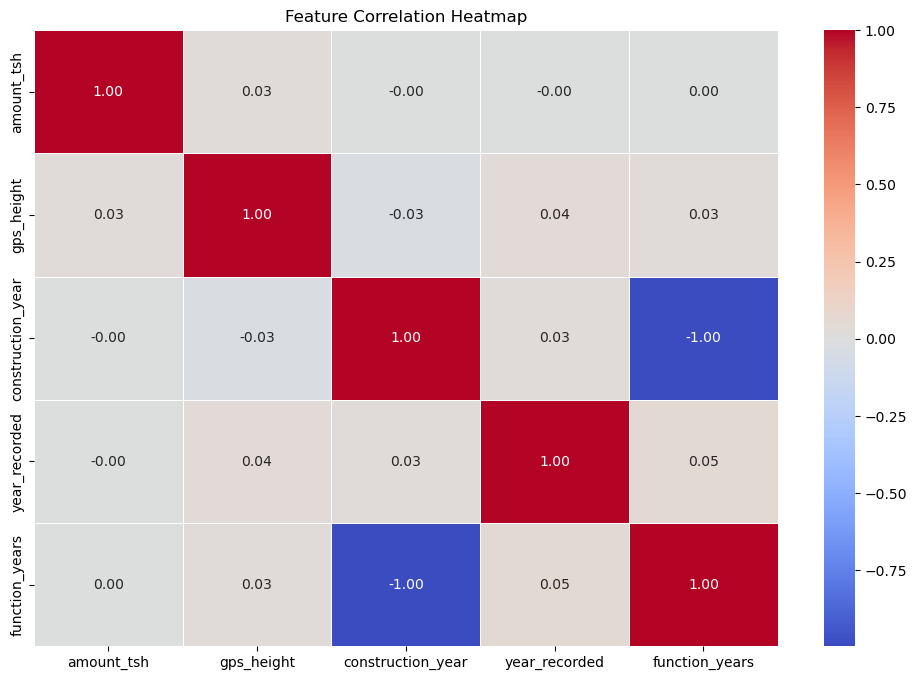

In [726]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

<Figure size 1200x800 with 0 Axes>

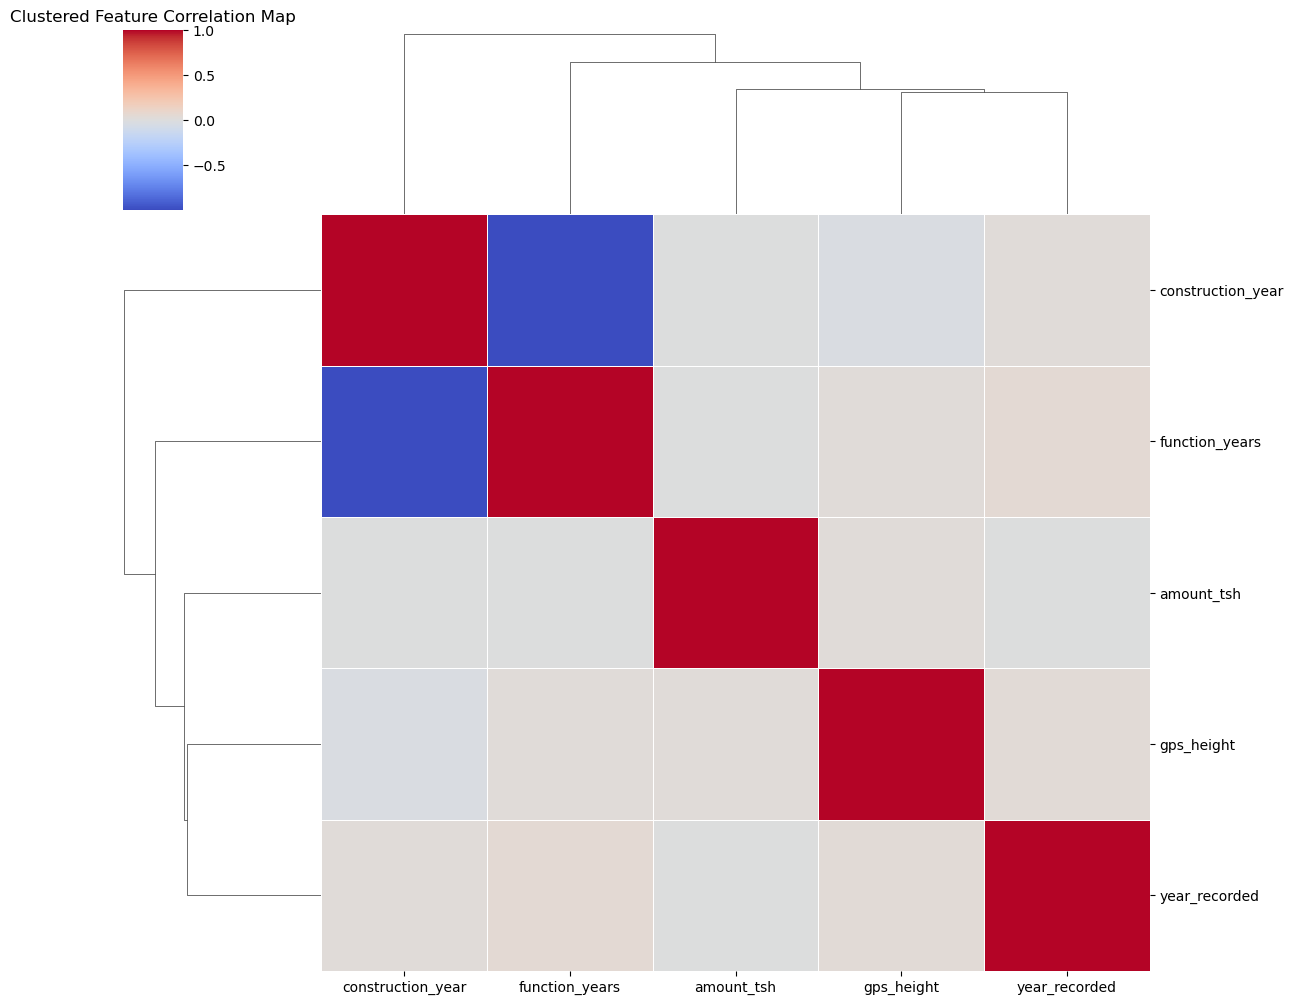

In [727]:
plt.figure(figsize=(12, 8))
sns.clustermap(corr_matrix, cmap="coolwarm", linewidths=0.5, figsize=(12, 10))
plt.title("Clustered Feature Correlation Map")
plt.show()

In [728]:
categorical_cols

['funder',
 'installer',
 'basin',
 'region',
 'extraction_type',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'water_quality',
 'quantity',
 'source',
 'waterpoint_type']

In [729]:
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    label_encoders[col] = le

/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_1131/638246821.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = le.fit_transform(X_train[col])
/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_1131/638246821.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = le.fit_transform(X_train[col])
/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_1131/638246821.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [730]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Decision Tree Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

Decision Tree Accuracy: 0.7505
              precision    recall  f1-score   support

           0       0.78      0.82      0.80      6457
           1       0.36      0.33      0.35       851
           2       0.78      0.73      0.75      4572

    accuracy                           0.75     11880
   macro avg       0.64      0.63      0.63     11880
weighted avg       0.75      0.75      0.75     11880



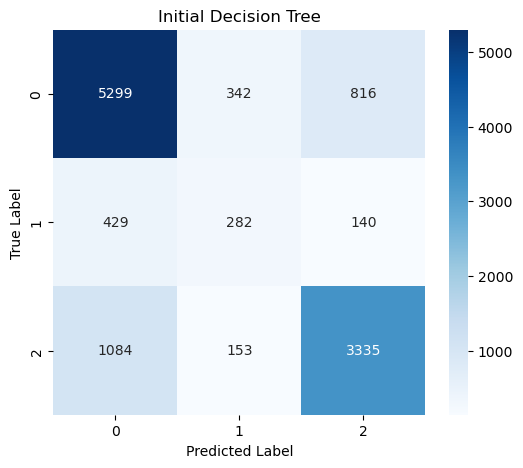

In [731]:
dt_model = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(dt_model, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Initial Decision Tree")
plt.show()

In [732]:
class_counts = y_train.value_counts()
class_counts

status_group
0    25802
2    18252
1     3466
Name: count, dtype: int64

/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_1131/3244613844.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="coolwarm")


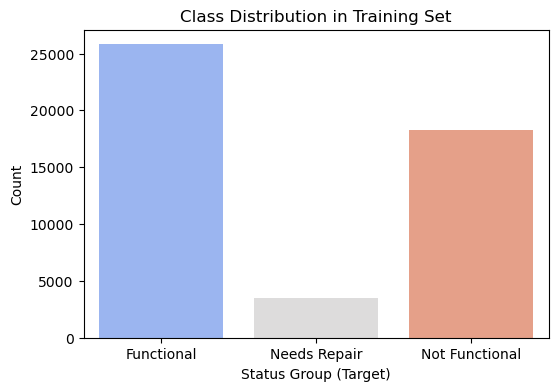

In [733]:
plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="coolwarm")
plt.xlabel("Status Group (Target)")
plt.ylabel("Count")
plt.title("Class Distribution in Training Set")
plt.xticks(ticks=[0, 1, 2], labels=["Functional", "Needs Repair", "Not Functional"])
plt.show()

In [734]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

y_pred_resampled = model.predict(X_test)

print(f"Decision Tree Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred_resampled))

Decision Tree Accuracy: 0.7505
              precision    recall  f1-score   support

           0       0.80      0.75      0.78      6457
           1       0.29      0.48      0.37       851
           2       0.77      0.74      0.75      4572

    accuracy                           0.73     11880
   macro avg       0.62      0.66      0.63     11880
weighted avg       0.75      0.73      0.74     11880



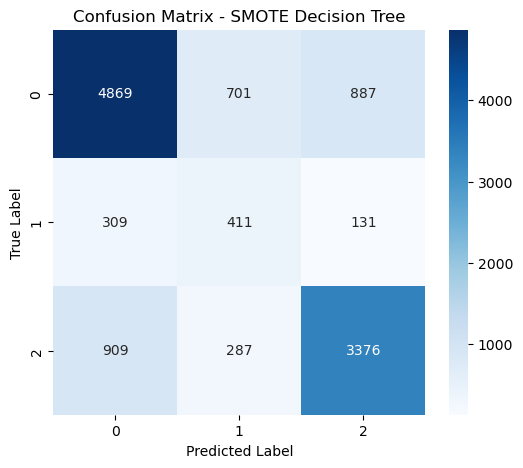

In [735]:
cm_smote = confusion_matrix(y_test, y_pred_resampled)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_smote, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SMOTE Decision Tree")
plt.show()

In [736]:
dt_model_weighted = DecisionTreeClassifier(random_state=42, class_weight="balanced")

dt_model_weighted.fit(X_train, y_train)

y_pred_weighted = dt_model_weighted.predict(X_test)

print(f"Decision Tree Accuracy (Weighted): {accuracy_score(y_test, y_pred_weighted):.4f}")
print(classification_report(y_test, y_pred_weighted))

Decision Tree Accuracy (Weighted): 0.7278
              precision    recall  f1-score   support

           0       0.80      0.75      0.78      6457
           1       0.29      0.47      0.36       851
           2       0.76      0.74      0.75      4572

    accuracy                           0.73     11880
   macro avg       0.62      0.65      0.63     11880
weighted avg       0.75      0.73      0.74     11880



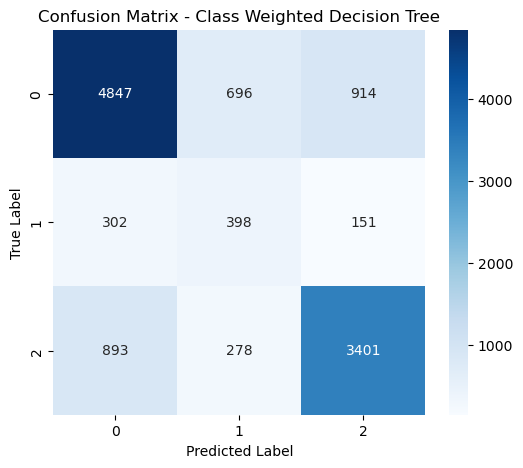

In [737]:
cm_weighted = confusion_matrix(y_test, y_pred_weighted)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_weighted, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Class Weighted Decision Tree")
plt.show()

In [738]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'class_weight': [None, 'balanced']
}

dt = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'class_weight': None, 'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [739]:
best_dt = DecisionTreeClassifier(**grid_search.best_params_, random_state=42)
best_dt.fit(X_train, y_train)

y_pred_best = best_dt.predict(X_test)

print(f"Optimized Decision Tree Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print(classification_report(y_test, y_pred_best))

Optimized Decision Tree Accuracy: 0.7637
              precision    recall  f1-score   support

           0       0.76      0.87      0.81      6457
           1       0.44      0.27      0.33       851
           2       0.81      0.70      0.75      4572

    accuracy                           0.76     11880
   macro avg       0.67      0.61      0.63     11880
weighted avg       0.76      0.76      0.76     11880



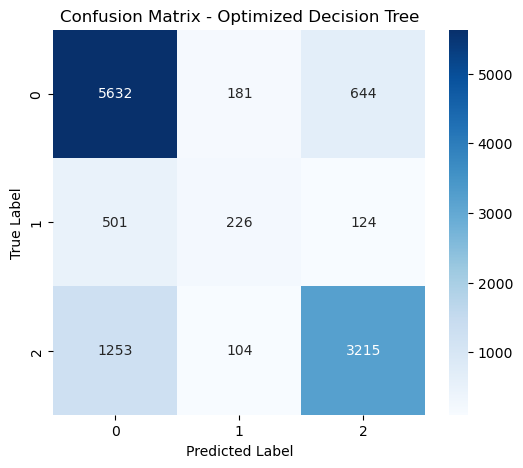

In [740]:
cm_best_dt = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_best_dt, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Optimized Decision Tree")
plt.show()

In [741]:
another_best_dt = DecisionTreeClassifier(class_weight=None, max_depth=19, min_samples_leaf=6, min_samples_split=4, random_state=42)
another_best_dt.fit(X_train, y_train)

y_pred_another_best = another_best_dt.predict(X_test)

print(f"Optimized Decision Tree Accuracy: {accuracy_score(y_test, y_pred_another_best):.4f}")
print(classification_report(y_test, y_pred_another_best))

Optimized Decision Tree Accuracy: 0.7668
              precision    recall  f1-score   support

           0       0.76      0.88      0.82      6457
           1       0.46      0.23      0.31       851
           2       0.81      0.71      0.76      4572

    accuracy                           0.77     11880
   macro avg       0.68      0.61      0.63     11880
weighted avg       0.76      0.77      0.76     11880



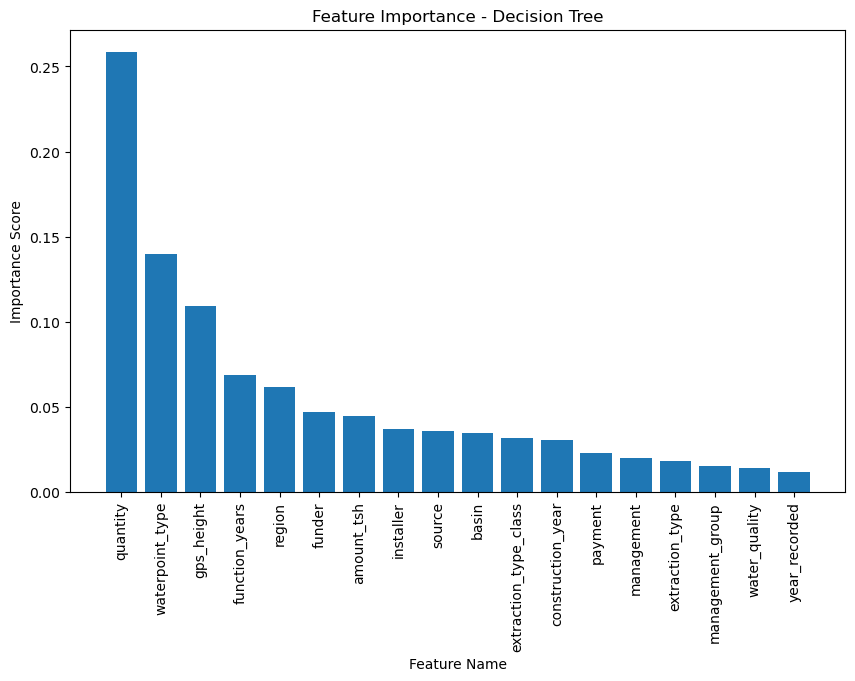

In [742]:
importances = another_best_dt.feature_importances_
feature_names = X_train.columns

# Sort features by importance
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance - Decision Tree")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Feature Name")
plt.ylabel("Importance Score")
plt.show()

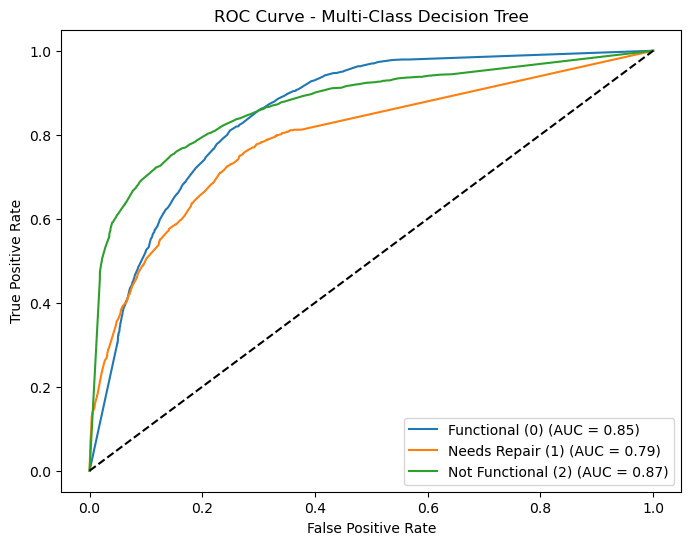

In [743]:
# Binarize the labels for multi-class ROC curve
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_prob = another_best_dt.predict_proba(X_test)  # Get predicted probabilities

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i, label in enumerate(["Functional (0)", "Needs Repair (1)", "Not Functional (2)"]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{label} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Multi-Class Decision Tree")
plt.legend()
plt.show()


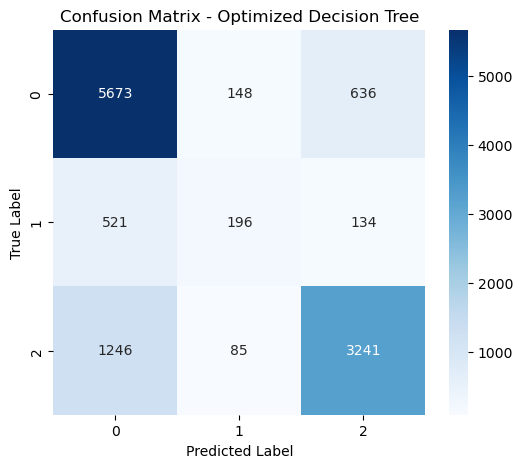

In [744]:
cm_another_best_dt = confusion_matrix(y_test, y_pred_another_best)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_another_best_dt, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Optimized Decision Tree")
plt.show()

In [745]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

param_grid = {
    'max_depth': [5, 10, 15, 20], 
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 5, 10],  
    'class_weight': [None, 'balanced']  
}

smote_dt = DecisionTreeClassifier(random_state=42)

grid_search_smote = GridSearchCV(smote_dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_smote.fit(X_train_smote, y_train_smote)

best_dt_smote = DecisionTreeClassifier(**grid_search_smote.best_params_, random_state=42)
best_dt_smote.fit(X_train_smote, y_train_smote)

y_pred_best_smote = best_dt_smote.predict(X_test)

print("Best Hyperparameters with SMOTE:", grid_search_smote.best_params_)
print(f"Optimized Decision Tree Accuracy with SMOTE: {accuracy_score(y_test, y_pred_best_smote):.4f}")
print(classification_report(y_test, y_pred_best_smote))

Best Hyperparameters with SMOTE: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Optimized Decision Tree Accuracy with SMOTE: 0.7206
              precision    recall  f1-score   support

           0       0.80      0.74      0.77      6457
           1       0.27      0.54      0.36       851
           2       0.79      0.72      0.75      4572

    accuracy                           0.72     11880
   macro avg       0.62      0.67      0.63     11880
weighted avg       0.76      0.72      0.74     11880



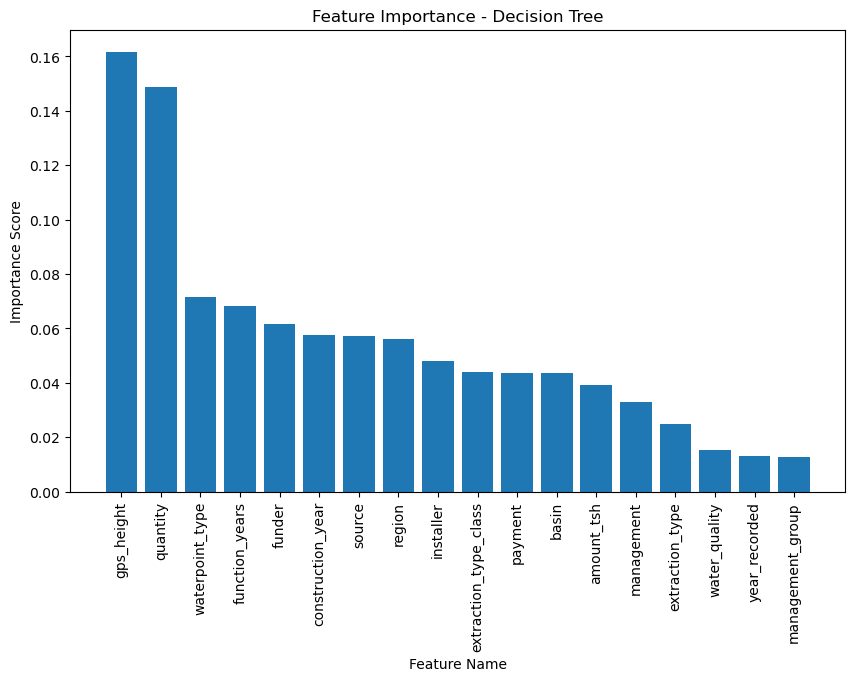

In [746]:
importances = best_dt_smote.feature_importances_
feature_names = X_train.columns

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance - Decision Tree")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Feature Name")
plt.ylabel("Importance Score")
plt.show()

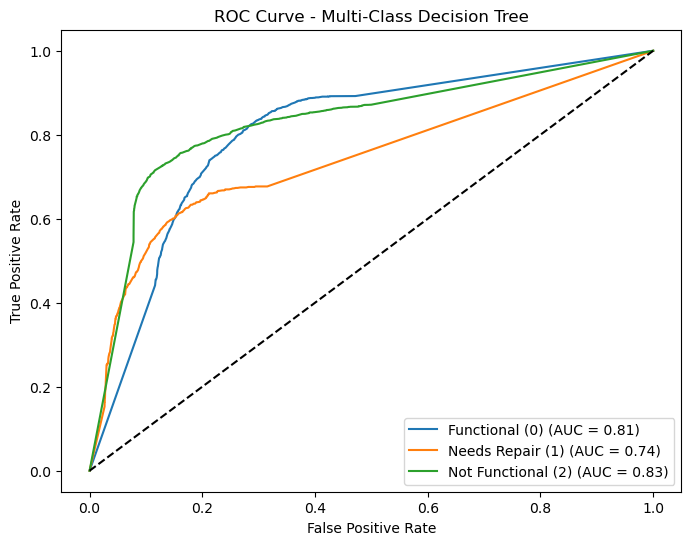

In [747]:
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_prob = best_dt_smote.predict_proba(X_test)

plt.figure(figsize=(8, 6))
for i, label in enumerate(["Functional (0)", "Needs Repair (1)", "Not Functional (2)"]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{label} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Multi-Class Decision Tree")
plt.legend()
plt.show()

/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_1131/1913125478.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y_train.value_counts().index, y=y_train.value_counts().values, palette="coolwarm")


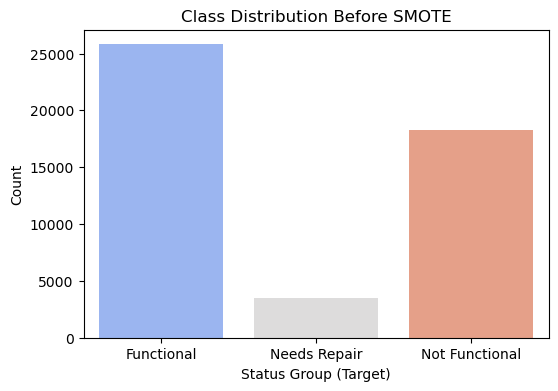

/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_1131/1913125478.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y_train_resampled.value_counts().index, y=y_train_resampled.value_counts().values, palette="coolwarm")


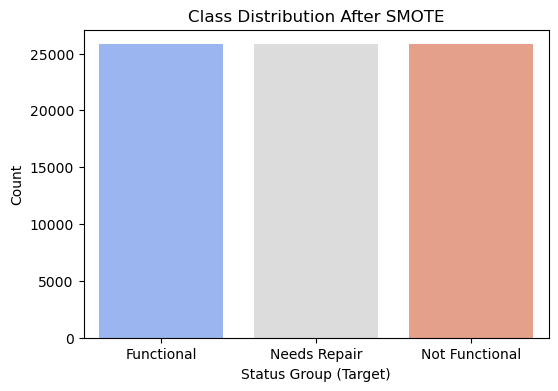

In [748]:
# Before SMOTE
plt.figure(figsize=(6, 4))
sns.barplot(x=y_train.value_counts().index, y=y_train.value_counts().values, palette="coolwarm")
plt.xticks(ticks=[0, 1, 2], labels=["Functional", "Needs Repair", "Not Functional"])
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Status Group (Target)")
plt.ylabel("Count")
plt.show()

# After SMOTE
plt.figure(figsize=(6, 4))
sns.barplot(x=y_train_resampled.value_counts().index, y=y_train_resampled.value_counts().values, palette="coolwarm")
plt.xticks(ticks=[0, 1, 2], labels=["Functional", "Needs Repair", "Not Functional"])
plt.title("Class Distribution After SMOTE")
plt.xlabel("Status Group (Target)")
plt.ylabel("Count")
plt.show()


In [749]:
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7827
              precision    recall  f1-score   support

           0       0.79      0.86      0.83      6457
           1       0.46      0.32      0.38       851
           2       0.81      0.76      0.78      4572

    accuracy                           0.78     11880
   macro avg       0.69      0.65      0.66     11880
weighted avg       0.78      0.78      0.78     11880



In [750]:
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [10, 20, None],  # Tree depth (None means unlimited)
    'min_samples_split': [2, 5, 10],  # Minimum samples per split
    'min_samples_leaf': [1, 2, 4],  # Minimum samples per leaf
    'class_weight': [None, 'balanced']  # Handle class imbalance
}


In [751]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

grid_search_rf = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train, y_train)

best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters:", best_params_rf)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


/opt/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Hyperparameters: {'class_weight': None, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [752]:
best_rf = RandomForestClassifier(**best_params_rf, random_state=42, n_jobs=-1)
best_rf.fit(X_train, y_train)

# Make predictions
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate performance
from sklearn.metrics import accuracy_score, classification_report
print(f"Optimized Random Forest Accuracy: {accuracy_score(y_test, y_pred_best_rf):.4f}")
print(classification_report(y_test, y_pred_best_rf))

Optimized Random Forest Accuracy: 0.7992
              precision    recall  f1-score   support

           0       0.78      0.92      0.84      6457
           1       0.64      0.23      0.34       851
           2       0.85      0.74      0.79      4572

    accuracy                           0.80     11880
   macro avg       0.76      0.63      0.66     11880
weighted avg       0.80      0.80      0.79     11880



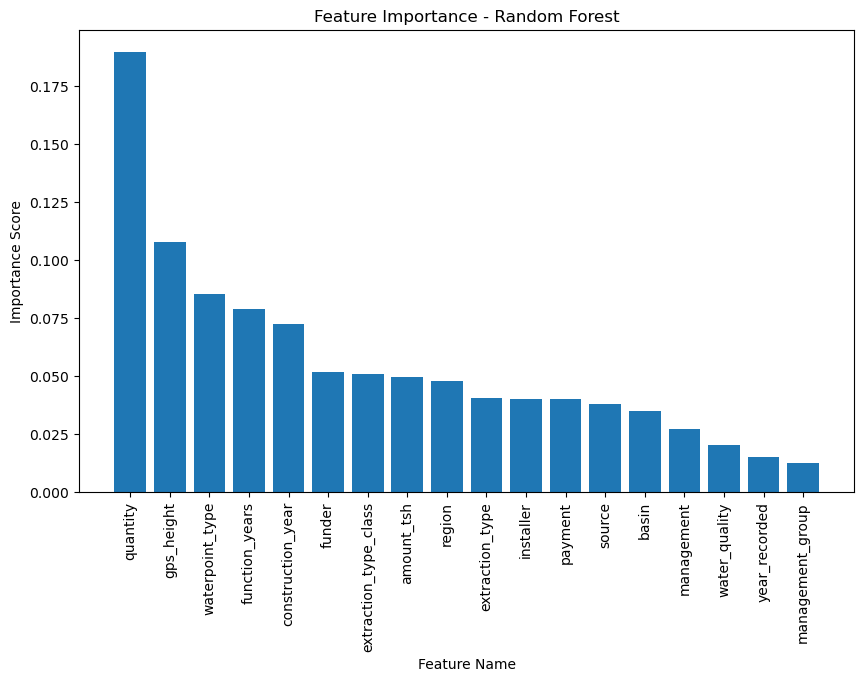

In [753]:
importances = best_rf.feature_importances_
feature_names = X_train.columns

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance - Random Forest")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Feature Name")
plt.ylabel("Importance Score")
plt.show()

In [754]:
another_best_rf = RandomForestClassifier(class_weight=None, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200)
another_best_rf.fit(X_train, y_train)

y_pred_another_rf = another_best_rf.predict(X_test)

print(f"Optimized Random Forest Accuracy: {accuracy_score(y_test, y_pred_another_rf):.4f}")
print(classification_report(y_test, y_pred_another_rf))

Optimized Random Forest Accuracy: 0.7993
              precision    recall  f1-score   support

           0       0.78      0.91      0.84      6457
           1       0.63      0.23      0.34       851
           2       0.85      0.74      0.79      4572

    accuracy                           0.80     11880
   macro avg       0.75      0.63      0.66     11880
weighted avg       0.80      0.80      0.79     11880



In [755]:
param_dist = {
    'n_estimators': [100, 200, 300, 500],  # More trees
    'max_depth': [10, 20, 30, None],  # More depth options
    'min_samples_split': [2, 5, 10, 15],  # Varying split thresholds
    'min_samples_leaf': [1, 2, 4, 8],  # More leaf node options
    'max_features': ['sqrt', 'log2', None],  # Feature selection strategy
    'bootstrap': [True, False],  # Try both bootstrap settings
    'class_weight': [None, 'balanced']  # Class weighting
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

random_search_rf = RandomizedSearchCV(rf, param_distributions=param_dist, 
                                      n_iter=30, cv=5, scoring='accuracy', 
                                      n_jobs=-1, verbose=1, random_state=42)

random_search_rf.fit(X_train, y_train)

best_params_rf = random_search_rf.best_params_
print("Optimized Hyperparameters:", best_params_rf)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Optimized Hyperparameters: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30, 'class_weight': None, 'bootstrap': True}


In [756]:
best_rf_rs = RandomForestClassifier(**best_params_rf, random_state=42, n_jobs=-1)
best_rf_rs.fit(X_train, y_train)

y_pred_rf_rs = best_rf_rs.predict(X_test)

print(f"Final Optimized Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf_rs):.4f}")
print(classification_report(y_test, y_pred_rf_rs))

Final Optimized Random Forest Accuracy: 0.7997
              precision    recall  f1-score   support

           0       0.79      0.90      0.84      6457
           1       0.59      0.26      0.36       851
           2       0.84      0.76      0.80      4572

    accuracy                           0.80     11880
   macro avg       0.74      0.64      0.66     11880
weighted avg       0.79      0.80      0.79     11880



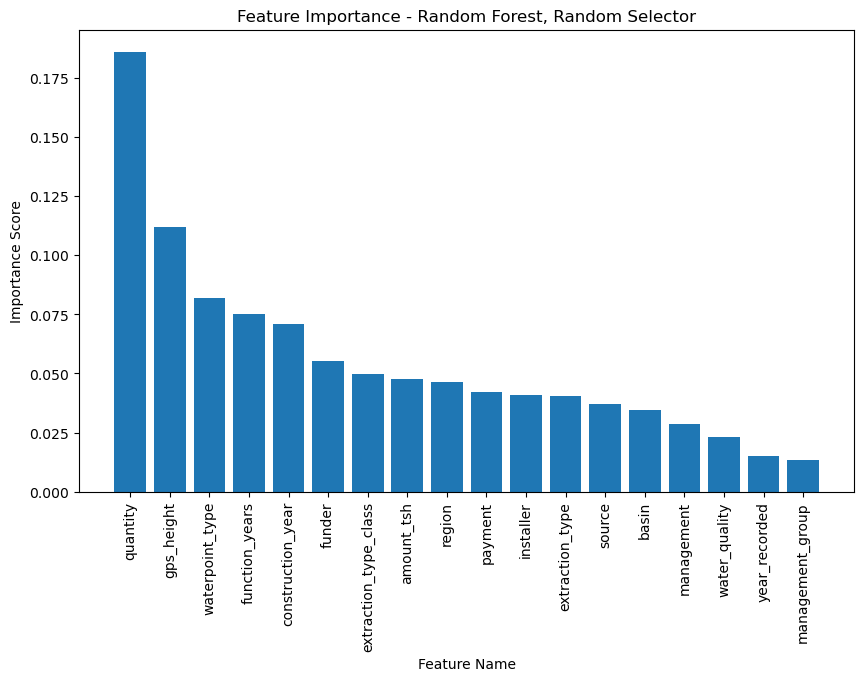

In [757]:
importances = best_rf_rs.feature_importances_
feature_names = X_train.columns

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance - Random Forest, Random Selector")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Feature Name")
plt.ylabel("Importance Score")
plt.show()

In [758]:
rf_rs = RandomForestClassifier(n_estimators=500, min_samples_split=11, min_samples_leaf=2, max_features='log2', max_depth=30, class_weight=None, bootstrap=True)
rf_rs.fit(X_train, y_train)

y_predict_rf_rs = rf_rs.predict(X_test)

print(f"Final Optimized Random Forest Accuracy: {accuracy_score(y_test, y_predict_rf_rs):.4f}")
print(classification_report(y_test, y_predict_rf_rs))

Final Optimized Random Forest Accuracy: 0.7992
              precision    recall  f1-score   support

           0       0.78      0.91      0.84      6457
           1       0.60      0.23      0.34       851
           2       0.85      0.75      0.79      4572

    accuracy                           0.80     11880
   macro avg       0.74      0.63      0.66     11880
weighted avg       0.79      0.80      0.79     11880



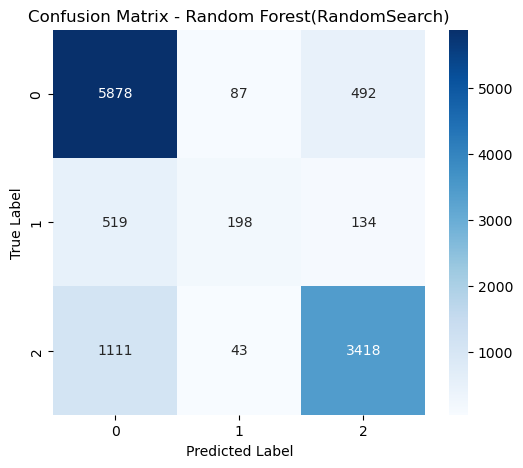

In [759]:
cm_rf = confusion_matrix(y_test, y_predict_rf_rs)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest(RandomSearch)")
plt.show()


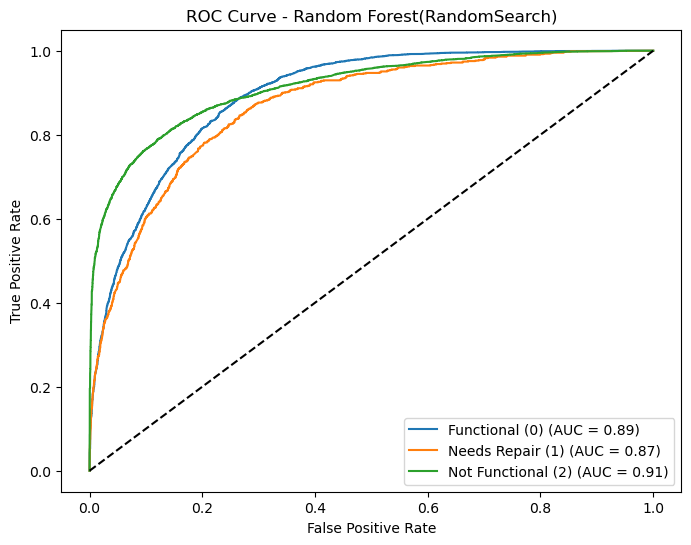

In [760]:
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_prob = best_rf_rs.predict_proba(X_test)

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i, label in enumerate(["Functional (0)", "Needs Repair (1)", "Not Functional (2)"]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{label} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest(RandomSearch)")
plt.legend()
plt.show()

In [761]:
custom_weights = {0: 0.5, 1: 1, 2: 1}  # Reduce influence of Class 0

rf_weighted = RandomForestClassifier(n_estimators=400, max_depth=21, class_weight=custom_weights, random_state=42, n_jobs=-1)
rf_weighted.fit(X_train, y_train)

y_pred_rf_weighted = rf_weighted.predict(X_test)

print(f"Weighted Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf_weighted):.4f}")
print(classification_report(y_test, y_pred_rf_weighted))

Weighted Random Forest Accuracy: 0.7875
              precision    recall  f1-score   support

           0       0.81      0.84      0.83      6457
           1       0.49      0.34      0.40       851
           2       0.79      0.80      0.79      4572

    accuracy                           0.79     11880
   macro avg       0.70      0.66      0.67     11880
weighted avg       0.78      0.79      0.78     11880



In [762]:
cv_scores = cross_val_score(another_best_rf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

# Print cross-validation results
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

Cross-Validation Accuracy Scores: [0.79640152 0.79377104 0.79377104 0.80039983 0.79114057]
Mean CV Accuracy: 0.7951
Standard Deviation: 0.0031


In [763]:
print(f"Total rows: {len(X_train)}")
print(f"Zero values in amount_tsh: {(X_train['amount_tsh'] == 0).sum()} ({(X_train['amount_tsh'] == 0).mean()*100:.2f}%)")

Total rows: 47520
Zero values in amount_tsh: 33331 (70.14%)


In [764]:
X_train = X_train.drop(columns=['amount_tsh'])
X_test = X_test.drop(columns=['amount_tsh'])

In [765]:
custom_weights = {0: 0.5, 1: 1, 2: 1}

rf_weighted = RandomForestClassifier(n_estimators=400, max_depth=20, class_weight=None, random_state=42, n_jobs=-1)
rf_weighted.fit(X_train, y_train)

y_pred_rf_weighted = rf_weighted.predict(X_test)

print(f"Weighted Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf_weighted):.4f}")
print(classification_report(y_test, y_pred_rf_weighted))

Weighted Random Forest Accuracy: 0.7960
              precision    recall  f1-score   support

           0       0.79      0.90      0.84      6457
           1       0.54      0.27      0.36       851
           2       0.84      0.74      0.79      4572

    accuracy                           0.80     11880
   macro avg       0.72      0.64      0.66     11880
weighted avg       0.79      0.80      0.79     11880



In [766]:
best_rf_rs = RandomForestClassifier(**best_params_rf, random_state=42, n_jobs=-1)
best_rf_rs.fit(X_train, y_train)

y_pred_rf_rs = best_rf_rs.predict(X_test)

print(f"Final Optimized Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf_rs):.4f}")
print(classification_report(y_test, y_pred_rf_rs))

Final Optimized Random Forest Accuracy: 0.7979
              precision    recall  f1-score   support

           0       0.79      0.90      0.84      6457
           1       0.58      0.26      0.36       851
           2       0.84      0.76      0.79      4572

    accuracy                           0.80     11880
   macro avg       0.73      0.64      0.66     11880
weighted avg       0.79      0.80      0.79     11880



In [767]:
cv_scores_rs = cross_val_score(best_rf_rs, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

# Print cross-validation results
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

Cross-Validation Accuracy Scores: [0.79640152 0.79377104 0.79377104 0.80039983 0.79114057]
Mean CV Accuracy: 0.7951
Standard Deviation: 0.0031


In [768]:
X_train['height_per_year'] = X_train['gps_height'] / (X_train['function_years'] + 1)
X_test['height_per_year'] = X_test['gps_height'] / (X_test['function_years'] + 1)

In [769]:
X_train['gps_height_bin'] = pd.cut(X_train['gps_height'], bins=[-50, 500, 1500, 3000], labels=['low', 'medium', 'high'])
X_test['gps_height_bin'] = pd.cut(X_test['gps_height'], bins=[-50, 500, 1500, 3000], labels=['low', 'medium', 'high'])

In [770]:
X_train['function_age_group'] = pd.cut(X_train['function_years'], bins=[-1, 5, 15, 30, 100], labels=['new', 'mid', 'old', 'very_old'])
X_test['function_age_group'] = pd.cut(X_test['function_years'], bins=[-1, 5, 15, 30, 100], labels=['new', 'mid', 'old', 'very_old'])

In [771]:
new_categorical_cols = ['gps_height_bin', 'function_age_group']
le = LabelEncoder()

for col in new_categorical_cols:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

In [772]:
print("Missing values per column:\n", X_train.isna().sum())

Missing values per column:
 funder                   0
gps_height               0
installer                0
basin                    0
region                   0
construction_year        0
extraction_type          0
extraction_type_class    0
management               0
management_group         0
payment                  0
water_quality            0
quantity                 0
source                   0
waterpoint_type          0
year_recorded            0
function_years           0
height_per_year          0
gps_height_bin           0
function_age_group       0
dtype: int64


In [773]:
print("Infinite values per column:\n", X_train.replace([np.inf, -np.inf], np.nan).isna().sum())

Infinite values per column:
 funder                   0
gps_height               0
installer                0
basin                    0
region                   0
construction_year        0
extraction_type          0
extraction_type_class    0
management               0
management_group         0
payment                  0
water_quality            0
quantity                 0
source                   0
waterpoint_type          0
year_recorded            0
function_years           0
height_per_year          1
gps_height_bin           0
function_age_group       0
dtype: int64


In [774]:
X_train['height_per_year'] = X_train['height_per_year'].replace([np.inf, -np.inf], np.nan)
X_train['height_per_year'] = X_train['height_per_year'].fillna(X_train['height_per_year'].median())

X_test['height_per_year'] = X_test['height_per_year'].replace([np.inf, -np.inf], np.nan)
X_test['height_per_year'] = X_test['height_per_year'].fillna(X_test['height_per_year'].median())

In [775]:
new_rf_rs = RandomForestClassifier(**best_params_rf, random_state=42, n_jobs=-1)
new_rf_rs.fit(X_train, y_train)

y_pred_new_rf_rs = new_rf_rs.predict(X_test)

print(f"Final Optimized Random Forest Accuracy: {accuracy_score(y_test, y_pred_new_rf_rs):.4f}")
print(classification_report(y_test, y_pred_new_rf_rs))

Final Optimized Random Forest Accuracy: 0.7969
              precision    recall  f1-score   support

           0       0.79      0.90      0.84      6457
           1       0.58      0.26      0.36       851
           2       0.83      0.75      0.79      4572

    accuracy                           0.80     11880
   macro avg       0.73      0.64      0.66     11880
weighted avg       0.79      0.80      0.79     11880



In [776]:
upper_limit = max(201, X_train['quantity'].max() + 1)  # Ensure it's strictly greater than 200

X_train['quantity_bin'] = pd.cut(X_train['quantity'], bins=[-1, 0, 50, 200, upper_limit], 
                                 labels=['no_water', 'small', 'medium', 'large'], include_lowest=True)

X_test['quantity_bin'] = pd.cut(X_test['quantity'], bins=[-1, 0, 50, 200, upper_limit], 
                                labels=['no_water', 'small', 'medium', 'large'], include_lowest=True)


In [777]:
print(X_train['quantity_bin'].isna().sum())
print(X_test['quantity_bin'].isna().sum())

0
0


In [778]:
le = LabelEncoder()
X_train['quantity_bin'] = le.fit_transform(X_train['quantity_bin'])
X_test['quantity_bin'] = le.transform(X_test['quantity_bin'])

In [779]:
quantitybin_rf_rs = RandomForestClassifier(**best_params_rf, random_state=42, n_jobs=-1)
quantitybin_rf_rs.fit(X_train, y_train)

y_pred_quantitybin_rf_rs = quantitybin_rf_rs.predict(X_test)

print(f"Final Optimized Random Forest Accuracy: {accuracy_score(y_test, y_pred_quantitybin_rf_rs):.4f}")
print(classification_report(y_test, y_pred_quantitybin_rf_rs))

Final Optimized Random Forest Accuracy: 0.7973
              precision    recall  f1-score   support

           0       0.79      0.90      0.84      6457
           1       0.58      0.26      0.36       851
           2       0.84      0.75      0.79      4572

    accuracy                           0.80     11880
   macro avg       0.73      0.64      0.66     11880
weighted avg       0.79      0.80      0.79     11880



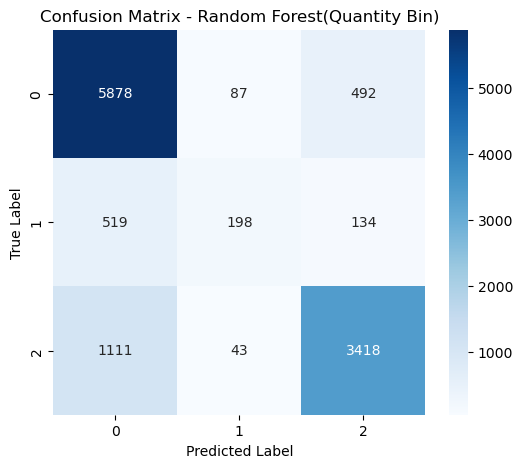

In [780]:
cm_quantity_bin_rf = confusion_matrix(y_test, y_pred_quantitybin_rf_rs)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest(Quantity Bin)")
plt.show()


In [781]:
X_train['construction_age'] = pd.cut(X_train['construction_year'], bins=[0, 1960, 1980, 2000, X_train['construction_year'].max()], 
                                     labels=['very_old', 'old', 'mid_age', 'new'])
X_test['construction_age'] = pd.cut(X_test['construction_year'], bins=[0, 1960, 1980, 2000, X_test['construction_year'].max()], 
                                    labels=['very_old', 'old', 'mid_age', 'new'])

In [782]:
le = LabelEncoder()
X_train['construction_age'] = le.fit_transform(X_train['construction_age'])
X_test['construction_age'] = le.transform(X_test['construction_age'])

In [783]:
construction_bin_rf = RandomForestClassifier(class_weight=None, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200)
construction_bin_rf.fit(X_train, y_train)

y_pred_construction_bin_rf = construction_bin_rf.predict(X_test)

print(f"Optimized Random Forest Accuracy: {accuracy_score(y_test, y_pred_construction_bin_rf):.4f}")
print(classification_report(y_test, y_pred_construction_bin_rf))

Optimized Random Forest Accuracy: 0.7993
              precision    recall  f1-score   support

           0       0.78      0.92      0.84      6457
           1       0.63      0.23      0.34       851
           2       0.85      0.74      0.79      4572

    accuracy                           0.80     11880
   macro avg       0.75      0.63      0.66     11880
weighted avg       0.80      0.80      0.79     11880



In [784]:
construction_bin_rf = RandomForestClassifier(**best_params_rf, random_state=42, n_jobs=-1)
construction_bin_rf.fit(X_train, y_train)

y_pred_construction_bin_rf = construction_bin_rf.predict(X_test)

print(f"Optimized Random Forest Accuracy: {accuracy_score(y_test, y_pred_construction_bin_rf):.4f}")
print(classification_report(y_test, y_pred_construction_bin_rf))

Optimized Random Forest Accuracy: 0.7980
              precision    recall  f1-score   support

           0       0.79      0.90      0.84      6457
           1       0.58      0.26      0.36       851
           2       0.84      0.75      0.79      4572

    accuracy                           0.80     11880
   macro avg       0.73      0.64      0.66     11880
weighted avg       0.79      0.80      0.79     11880



In [785]:
X_train['extraction_modernity'] = X_train['extraction_type_class'].apply(lambda x: 'modern' if x in ['gravity', 'motorpump'] else 'traditional')
X_test['extraction_modernity'] = X_test['extraction_type_class'].apply(lambda x: 'modern' if x in ['gravity', 'motorpump'] else 'traditional')

In [786]:
le = LabelEncoder()
X_train['extraction_modernity'] = le.fit_transform(X_train['extraction_modernity'])
X_test['extraction_modernity'] = le.transform(X_test['extraction_modernity'])

In [787]:
extraction_bin_rf = RandomForestClassifier(**best_params_rf, random_state=42, n_jobs=-1)
extraction_bin_rf.fit(X_train, y_train)

y_pred_extraction_bin_rf = extraction_bin_rf.predict(X_test)

print(f"Optimized Random Forest Accuracy: {accuracy_score(y_test, y_pred_extraction_bin_rf):.4f}")
print(classification_report(y_test, y_pred_extraction_bin_rf))

Optimized Random Forest Accuracy: 0.7976
              precision    recall  f1-score   support

           0       0.79      0.90      0.84      6457
           1       0.57      0.25      0.35       851
           2       0.84      0.75      0.79      4572

    accuracy                           0.80     11880
   macro avg       0.73      0.63      0.66     11880
weighted avg       0.79      0.80      0.79     11880



In [788]:
extraction_bin_rf = RandomForestClassifier(class_weight=None, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200)
extraction_bin_rf.fit(X_train, y_train)

y_pred_extraction_bin_rf = extraction_bin_rf.predict(X_test)

print(f"Optimized Random Forest Accuracy: {accuracy_score(y_test, y_pred_extraction_bin_rf):.4f}")
print(classification_report(y_test, y_pred_extraction_bin_rf))

Optimized Random Forest Accuracy: 0.7995
              precision    recall  f1-score   support

           0       0.78      0.92      0.84      6457
           1       0.62      0.23      0.34       851
           2       0.85      0.74      0.79      4572

    accuracy                           0.80     11880
   macro avg       0.75      0.63      0.66     11880
weighted avg       0.80      0.80      0.79     11880



In [789]:
feature_cv_scores = cross_val_score(extraction_bin_rf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

# Print cross-validation results
print(f"Cross-Validation Accuracy Scores: {feature_cv_scores}")
print(f"Mean CV Accuracy: {feature_cv_scores.mean():.4f}")
print(f"Standard Deviation: {feature_cv_scores.std():.4f}")

Cross-Validation Accuracy Scores: [0.79208754 0.7924032  0.79324495 0.79776936 0.79114057]
Mean CV Accuracy: 0.7933
Standard Deviation: 0.0023


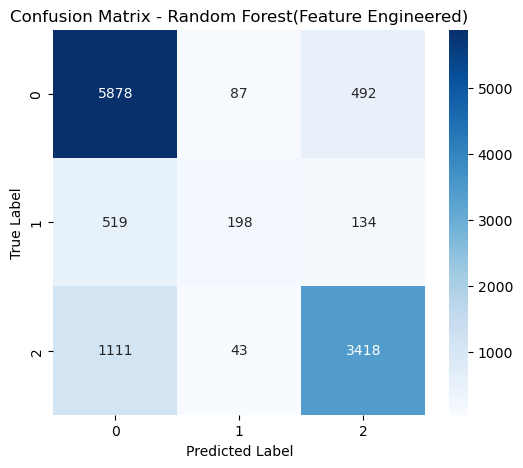

In [790]:
final_bin_cm_rf = confusion_matrix(y_test, y_pred_extraction_bin_rf)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest(Feature Engineered)")
plt.show()

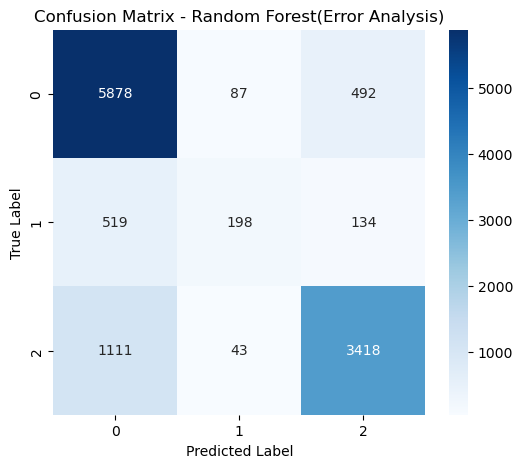

In [791]:
cm_trial = confusion_matrix(y_test, y_pred_extraction_bin_rf)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest(Error Analysis)")
plt.show()

In [792]:
fp_0 = cm_trial[1, 0] + cm_trial[2, 0]  # False positives for class 0
fp_1 = cm_trial[0, 1] + cm_trial[2, 1]  # False positives for class 1
fp_2 = cm_trial[0, 2] + cm_trial[1, 2]  # False positives for class 2

print(f"False Positives for class 0 (Functional): {fp_0}")
print(f"False Positives for class 1 (Functional Needs Repair): {fp_1}")
print(f"False Positives for class 2 (Not Functional): {fp_2}")

False Positives for class 0 (Functional): 1689
False Positives for class 1 (Functional Needs Repair): 118
False Positives for class 2 (Not Functional): 575


In [793]:
extraction_bin_rf = RandomForestClassifier(class_weight=None, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200)
extraction_bin_rf.fit(X_train, y_train)

y_pred_extraction_bin_rf = extraction_bin_rf.predict(X_test)

print(f"Optimized Random Forest Accuracy: {accuracy_score(y_test, y_pred_extraction_bin_rf):.4f}")
print(classification_report(y_test, y_pred_extraction_bin_rf))

Optimized Random Forest Accuracy: 0.7984
              precision    recall  f1-score   support

           0       0.78      0.92      0.84      6457
           1       0.63      0.24      0.35       851
           2       0.85      0.74      0.79      4572

    accuracy                           0.80     11880
   macro avg       0.75      0.63      0.66     11880
weighted avg       0.80      0.80      0.79     11880



In [794]:
feature_cv_scores = cross_val_score(extraction_bin_rf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

# Print cross-validation results
print(f"Cross-Validation Accuracy Scores: {feature_cv_scores}")
print(f"Mean CV Accuracy: {feature_cv_scores.mean():.4f}")
print(f"Standard Deviation: {feature_cv_scores.std():.4f}")

Cross-Validation Accuracy Scores: [0.79398148 0.7940867  0.79377104 0.79776936 0.79050926]
Mean CV Accuracy: 0.7940
Standard Deviation: 0.0023


In [795]:
# Count how many times the model predicted 2 when the actual class was 0 or 1
fp_2_from_0 = ((y_pred == 2) & (y_test == 0)).sum()
fp_2_from_1 = ((y_pred == 2) & (y_test == 1)).sum()

# Sum them up
actual_fp_class_2 = fp_2_from_0 + fp_2_from_1

print(f"False Positives for Class 2 (Not Functional):")
print(f" - Model predicted 2 but true class was 0: {fp_2_from_0}")
print(f" - Model predicted 2 but true class was 1: {fp_2_from_1}")
print(f" - Total False Positives for Class 2 (Should match Confusion Matrix 632): {actual_fp_class_2}")

False Positives for Class 2 (Not Functional):
 - Model predicted 2 but true class was 0: 816
 - Model predicted 2 but true class was 1: 140
 - Total False Positives for Class 2 (Should match Confusion Matrix 632): 956


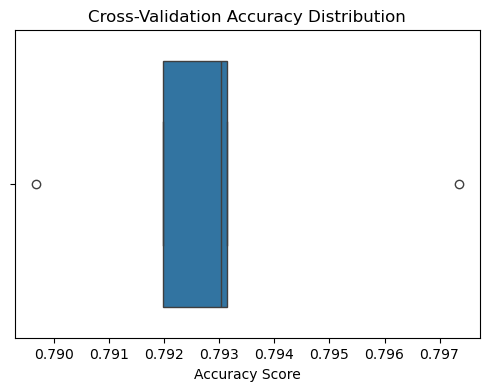

In [796]:
cv_scores = [0.79198232, 0.79313973, 0.79303451, 0.79734848, 0.78966751]  # Replace with actual scores

plt.figure(figsize=(6, 4))
sns.boxplot(cv_scores, orient="h")
plt.title("Cross-Validation Accuracy Distribution")
plt.xlabel("Accuracy Score")
plt.show()

In [797]:
report = classification_report(y_test, y_pred, output_dict=True)

# Convert to DataFrame
df_report = pd.DataFrame(report).T.iloc[:-1, :]  # Drop 'accuracy' row

# Plot
sns.heatmap(df_report[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(8, 5), rot=0)
plt.title("Precision, Recall, and F1-Score by Class")
plt.ylabel("Score")
plt.xlabel("Class")
plt.legend(title="Metric")
plt.show()

SyntaxError: '(' was never closed (41835585.py, line 7)

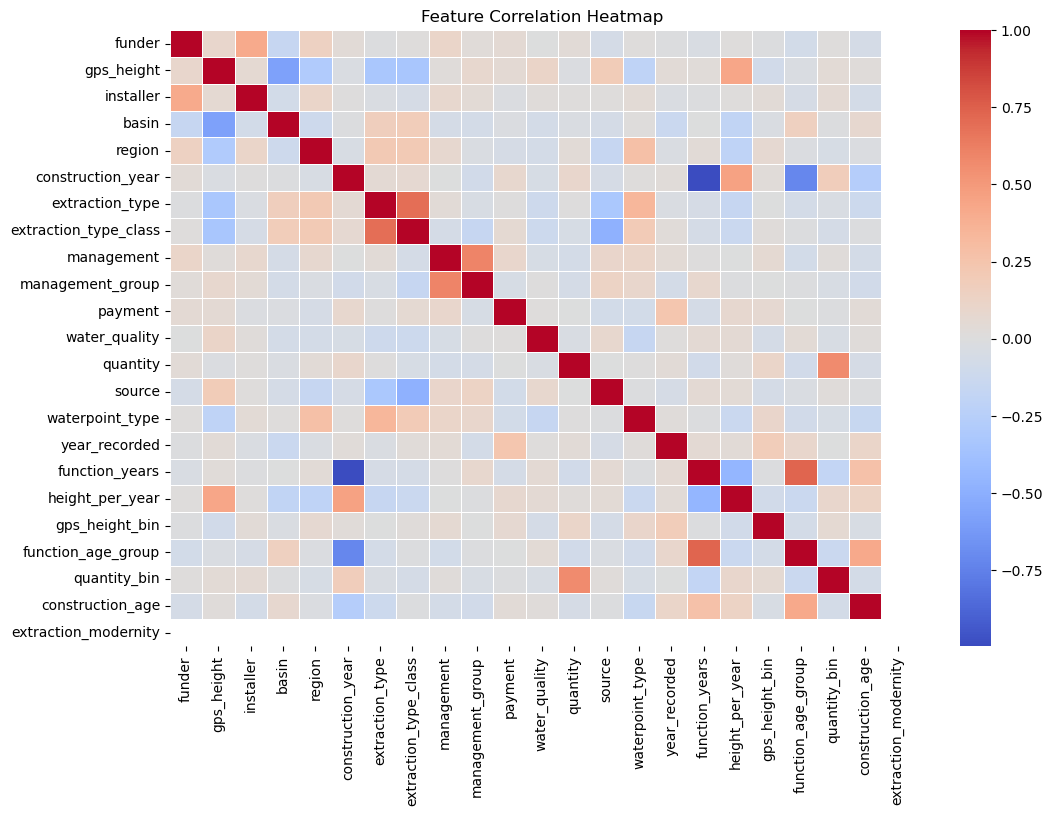

In [ ]:
corr_matrix = X_train.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)

# Titles and labels
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
X_train = X_train.drop(columns=['gps_height', 'function_years', 'quantity', 
                                'construction_year', 'extraction_type', 'extraction_type_class'])
X_test = X_test.drop(columns=['gps_height', 'function_years', 'quantity', 
                               'construction_year', 'extraction_type', 'extraction_type_class'])

In [ ]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

In [ ]:
print(X_train.head())

   funder  installer  basin  region  management  management_group  payment  \
0      19         25      0       8           9                 4        4   
1       1         34      0       2           7                 4        0   
2      42         50      2      10           7                 4        0   
3      82         50      6      10           7                 4        3   
4      40         48      8      11           7                 4        5   

   water_quality  source  waterpoint_type  year_recorded  height_per_year  \
0              6       8                1           2013       130.750000   
1              6       7                4           2011       113.412309   
2              6       7                6           2011       118.473792   
3              6       6                1           2011        90.709137   
4              4       7                6           2011        68.200000   

   gps_height_bin  function_age_group  quantity_bin  construction_ag

In [ ]:
updated_rf = RandomForestClassifier(**best_params_rf, random_state=42, n_jobs=-1)
updated_rf.fit(X_train, y_train)

y_pred_updated_rf = updated_rf.predict(X_test)

print(f"Optimized Random Forest Accuracy: {accuracy_score(y_test, y_pred_updated_rf):.4f}")
print(classification_report(y_test, y_pred_updated_rf))

Optimized Random Forest Accuracy: 0.7856
              precision    recall  f1-score   support

           0       0.78      0.89      0.83      6457
           1       0.57      0.23      0.33       851
           2       0.82      0.74      0.78      4572

    accuracy                           0.79     11880
   macro avg       0.72      0.62      0.64     11880
weighted avg       0.78      0.79      0.77     11880



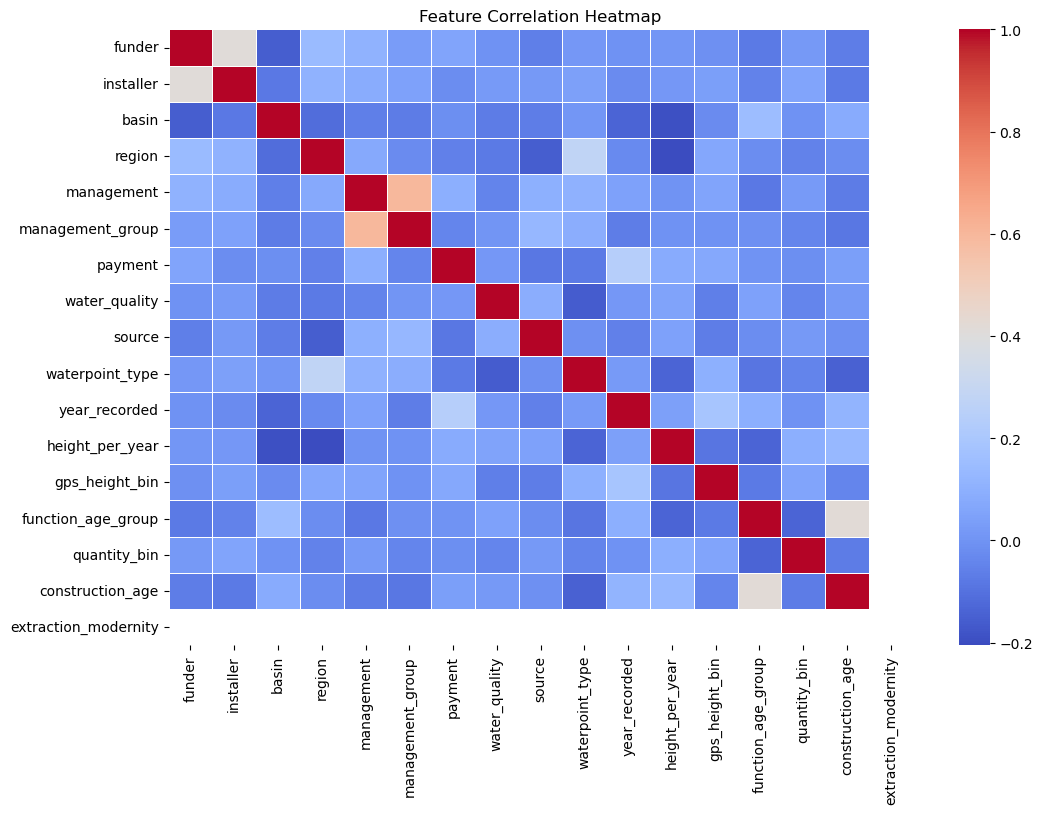

In [ ]:
corr_matrix_updated = X_train.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_updated, annot=False, cmap="coolwarm", linewidths=0.5)

# Titles and labels
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
updated_cv_scores = cross_val_score(updated_rf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

# Print cross-validation results
print(f"Cross-Validation Accuracy Scores: {feature_cv_scores}")
print(f"Mean CV Accuracy: {feature_cv_scores.mean():.4f}")
print(f"Standard Deviation: {feature_cv_scores.std():.4f}")

Cross-Validation Accuracy Scores: [0.79198232 0.79313973 0.79303451 0.79734848 0.78966751]
Mean CV Accuracy: 0.7930
Standard Deviation: 0.0025


In [ ]:
y_train = y_train.reset_index(drop=True)

In [ ]:
water_quality_needs_repair = X_train[y_train == 1]['water_quality'].value_counts()

/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_1131/3586136830.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=water_quality_needs_repair.index, y=water_quality_needs_repair.values, palette="coolwarm")


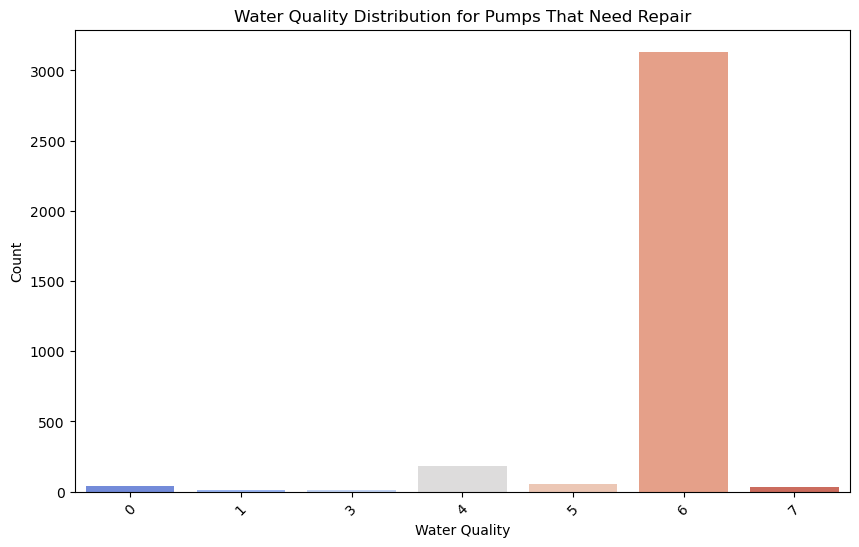

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=water_quality_needs_repair.index, y=water_quality_needs_repair.values, palette="coolwarm")

plt.title("Water Quality Distribution for Pumps That Need Repair")
plt.xlabel("Water Quality")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [ ]:
print(X_train['water_quality'].unique())

[6 4 7 0 1 3 5 2]


In [ ]:
encoded_classes = le.classes_  # This retrieves the original labels in the order they were encoded
print(encoded_classes)  # Check what each number represents

['traditional']


In [ ]:
print(X_train[['water_quality']].drop_duplicates().sort_values(by='water_quality'))

      water_quality
28                0
31                1
4542              2
38                3
4                 4
691               5
0                 6
27                7


In [ ]:
water_quality_mapping = {
    0: 'good',
    1: 'salty',
    2: 'milky',
    3: 'coloured',
    4: 'fluoride',
    5: 'unknown',
    6: 'other'
}

/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_1131/1893826344.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=water_quality_needs_repair.index, y=water_quality_needs_repair.values, palette="coolwarm")


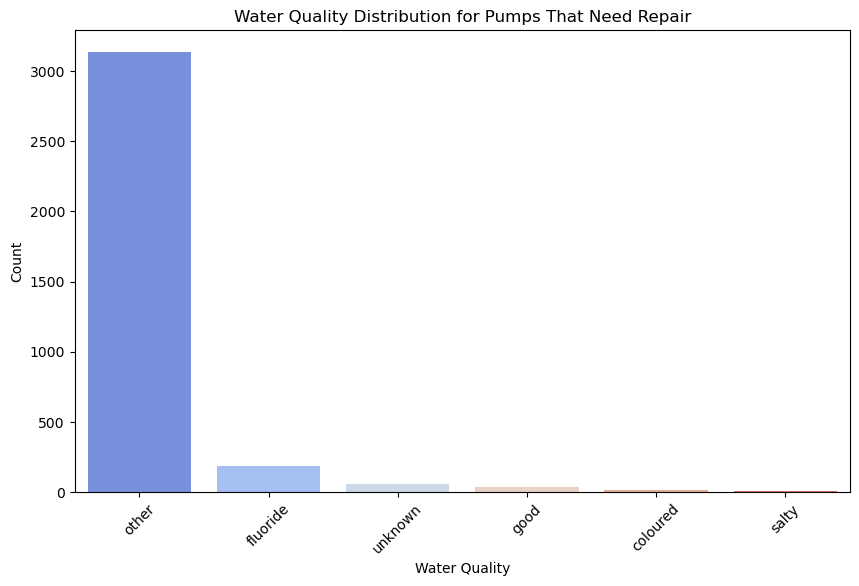

In [ ]:
water_quality_needs_repair.index = water_quality_needs_repair.index.map(water_quality_mapping)

plt.figure(figsize=(10, 6))
sns.barplot(x=water_quality_needs_repair.index, y=water_quality_needs_repair.values, palette="coolwarm")

plt.title("Water Quality Distribution for Pumps That Need Repair")
plt.xlabel("Water Quality")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Merge Needs Repair (1) into Not Functional (2)
y_train = y_train.replace({1: 2})
y_test = y_test.replace({1: 2})

In [ ]:
rf_model = RandomForestClassifier(**best_params_rf, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8072
              precision    recall  f1-score   support

           0       0.80      0.87      0.83      6457
           2       0.82      0.74      0.78      5423

    accuracy                           0.81     11880
   macro avg       0.81      0.80      0.80     11880
weighted avg       0.81      0.81      0.81     11880



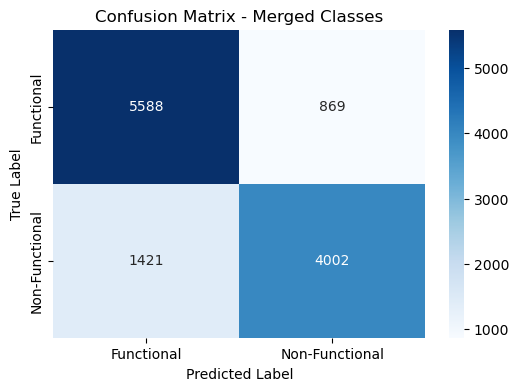

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap="Blues", xticklabels=["Functional", "Non-Functional"], yticklabels=["Functional", "Non-Functional"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Merged Classes")
plt.show()

In [ ]:
merged_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

# Print cross-validation results
print(f"Cross-Validation Accuracy Scores: {feature_cv_scores}")
print(f"Mean CV Accuracy: {feature_cv_scores.mean():.4f}")
print(f"Standard Deviation: {feature_cv_scores.std():.4f}")

Cross-Validation Accuracy Scores: [0.79198232 0.79313973 0.79303451 0.79734848 0.78966751]
Mean CV Accuracy: 0.7930
Standard Deviation: 0.0025


In [ ]:
water_quality_functional = X_train[y_train == 0]['water_quality'].value_counts()

/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_1131/2128161353.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=water_quality_functional.index, y=water_quality_functional.values, palette="coolwarm")


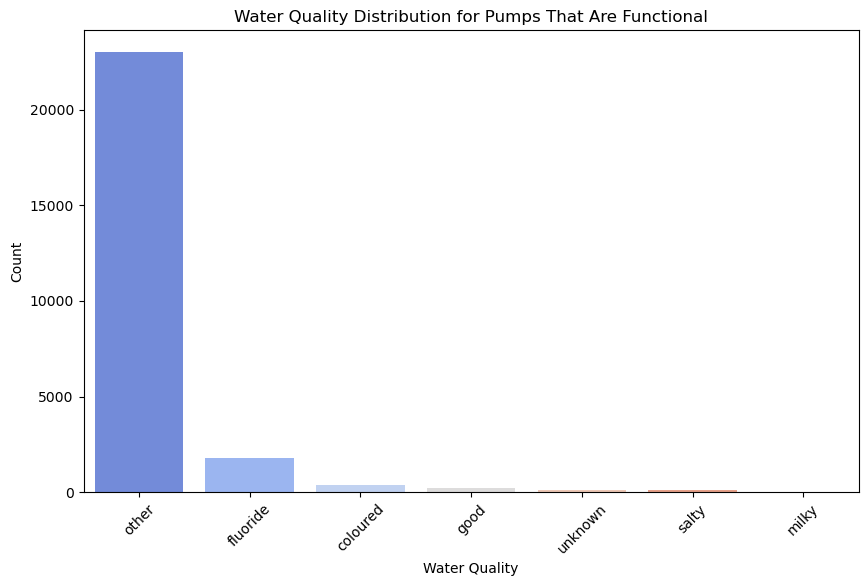

In [ ]:
water_quality_functional.index = water_quality_functional.index.map(water_quality_mapping)

plt.figure(figsize=(10, 6))
sns.barplot(x=water_quality_functional.index, y=water_quality_functional.values, palette="coolwarm")

plt.title("Water Quality Distribution for Pumps That Are Functional")
plt.xlabel("Water Quality")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Extract feature importance from the trained Random Forest model
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Convert to DataFrame
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

In [ ]:
X_train_reduced = X_train.drop(columns=['water_quality'])
X_test_reduced = X_test.drop(columns=['water_quality'])

rf_model_reduced = RandomForestClassifier(**best_params_rf, random_state=42, n_jobs=-1)
rf_model_reduced.fit(X_train_reduced, y_train)
y_pred_reduced = rf_model_reduced.predict(X_test_reduced)

print(f"Random Forest Accuracy Without Water Quality: {accuracy_score(y_test, y_pred_reduced):.4f}")
print(classification_report(y_test, y_pred_reduced))

Random Forest Accuracy Without Water Quality: 0.8048
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      6457
           2       0.82      0.74      0.78      5423

    accuracy                           0.80     11880
   macro avg       0.81      0.80      0.80     11880
weighted avg       0.81      0.80      0.80     11880



In [ ]:
X_train = X_train.drop(columns=['water_quality'])
X_test = X_test.drop(columns=['water_quality'])

rf_model_final = RandomForestClassifier(**best_params_rf, random_state=42, n_jobs=-1)
rf_model_final.fit(X_train, y_train)
y_pred_final = rf_model_final.predict(X_test)

print(f"Final Random Forest Accuracy (Without Water Quality): {accuracy_score(y_test, y_pred_final):.4f}")
print(classification_report(y_test, y_pred_final))

Final Random Forest Accuracy (Without Water Quality): 0.8048
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      6457
           2       0.82      0.74      0.78      5423

    accuracy                           0.80     11880
   macro avg       0.81      0.80      0.80     11880
weighted avg       0.81      0.80      0.80     11880



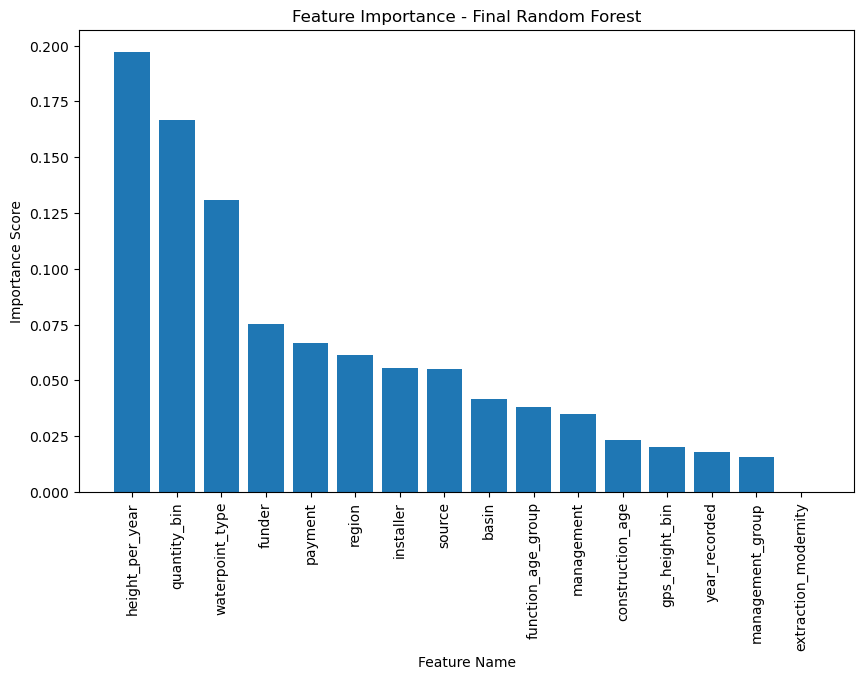

In [ ]:
importances = rf_model_final.feature_importances_
feature_names = X_train.columns

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance - Final Random Forest")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Feature Name")
plt.ylabel("Importance Score")
plt.show()

In [ ]:
print(X_train['extraction_modernity'].value_counts())

extraction_modernity
0    47520
Name: count, dtype: int64


In [ ]:
# Drop extraction_modernity and retrain
X_train_reduced = X_train.drop(columns=['extraction_modernity'])
X_test_reduced = X_test.drop(columns=['extraction_modernity'])

rf_model_reduced = RandomForestClassifier(**best_params_rf, random_state=42, n_jobs=-1)
rf_model_reduced.fit(X_train_reduced, y_train)
y_pred_reduced = rf_model_reduced.predict(X_test_reduced)

# Evaluate
print(f"Random Forest Accuracy Without Extraction Modernity: {accuracy_score(y_test, y_pred_reduced):.4f}")
print(classification_report(y_test, y_pred_reduced))

Random Forest Accuracy Without Extraction Modernity: 0.8056
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      6457
           2       0.82      0.74      0.78      5423

    accuracy                           0.81     11880
   macro avg       0.81      0.80      0.80     11880
weighted avg       0.81      0.81      0.80     11880



In [ ]:
X_train = X_train.drop(columns=['extraction_modernity'])
X_test = X_test.drop(columns=['extraction_modernity'])

In [ ]:
rf_model_final = RandomForestClassifier(**best_params_rf, random_state=42, n_jobs=-1)
rf_model_final.fit(X_train, y_train)
y_pred_final = rf_model_final.predict(X_test)

print(f"Final Random Forest Accuracy (Without Water Quality): {accuracy_score(y_test, y_pred_final):.4f}")
print(classification_report(y_test, y_pred_final))

Final Random Forest Accuracy (Without Water Quality): 0.8056
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      6457
           2       0.82      0.74      0.78      5423

    accuracy                           0.81     11880
   macro avg       0.81      0.80      0.80     11880
weighted avg       0.81      0.81      0.80     11880



In [ ]:
y_test = y_test.reset_index(drop=True)

y_pred_rf = pd.Series(y_pred_rf, index=y_test.index)

false_positives = X_test[(y_test == 0) & (y_pred_rf == 2)]
true_functional = X_test[y_test == 0]

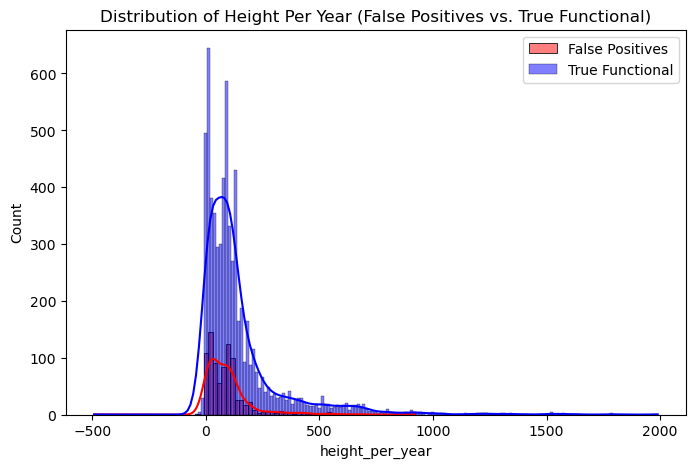

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(false_positives['height_per_year'], color='red', label='False Positives', kde=True)
sns.histplot(true_functional['height_per_year'], color='blue', label='True Functional', kde=True)
plt.legend()
plt.title("Distribution of Height Per Year (False Positives vs. True Functional)")
plt.show()

In [ ]:
print(false_positives['quantity_bin'].value_counts(normalize=True))
print(true_functional['quantity_bin'].value_counts(normalize=True))

quantity_bin
1    0.972382
0    0.027618
Name: proportion, dtype: float64
quantity_bin
1    0.995664
0    0.004336
Name: proportion, dtype: float64


In [ ]:
print(false_positives['funder'].value_counts().head(10))

funder
29    191
1     158
82     70
42     52
32     39
13     38
89     19
20     16
70     15
17     14
Name: count, dtype: int64


In [ ]:
print(false_positives['waterpoint_type'].value_counts())

waterpoint_type
1    400
4    305
2     86
6     71
5      4
0      2
3      1
Name: count, dtype: int64


In [ ]:
# Define bins and labels for height_per_year. Hoping by binning into broader categories, the model won't over-weight lower height values🤞🏽
bins = [-np.inf, 0, 50, 250, 600, np.inf]
labels = ['low', 'very_low', 'moderate', 'high', 'very_high']

X_train['height_per_year_bin'] = pd.cut(X_train['height_per_year'], bins=bins, labels=labels)
X_test['height_per_year_bin'] = pd.cut(X_test['height_per_year'], bins=bins, labels=labels)

X_train = X_train.drop(columns=['height_per_year'])
X_test = X_test.drop(columns=['height_per_year'])

In [ ]:
label_encoder = LabelEncoder()
X_train['height_per_year_bin'] = label_encoder.fit_transform(X_train['height_per_year_bin'])
X_test['height_per_year_bin'] = label_encoder.transform(X_test['height_per_year_bin'])

In [ ]:
# Run this Random Forest model back!
rf_model_updated = RandomForestClassifier(**best_params_rf, random_state=42, n_jobs=-1)
rf_model_updated.fit(X_train, y_train)
y_pred_updated = rf_model_updated.predict(X_test)

print(f"Random Forest Accuracy After Binning: {accuracy_score(y_test, y_pred_updated):.4f}")
print(classification_report(y_test, y_pred_updated))

Random Forest Accuracy After Binning: 0.8000
              precision    recall  f1-score   support

           0       0.79      0.86      0.82      6457
           2       0.81      0.73      0.77      5423

    accuracy                           0.80     11880
   macro avg       0.80      0.79      0.80     11880
weighted avg       0.80      0.80      0.80     11880



/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_1131/3595410040.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_df["Importance"], y=feature_importance_df["Feature"], palette="Blues_r")


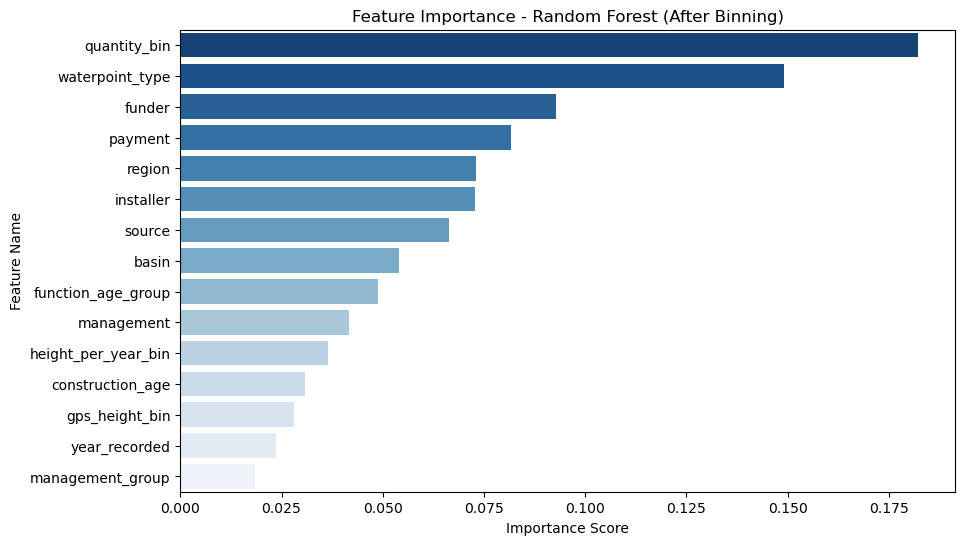

In [ ]:
importances = rf_model_updated.feature_importances_
feature_names = X_train.columns

feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_df["Importance"], y=feature_importance_df["Feature"], palette="Blues_r")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.title("Feature Importance - Random Forest (After Binning)")
plt.show()

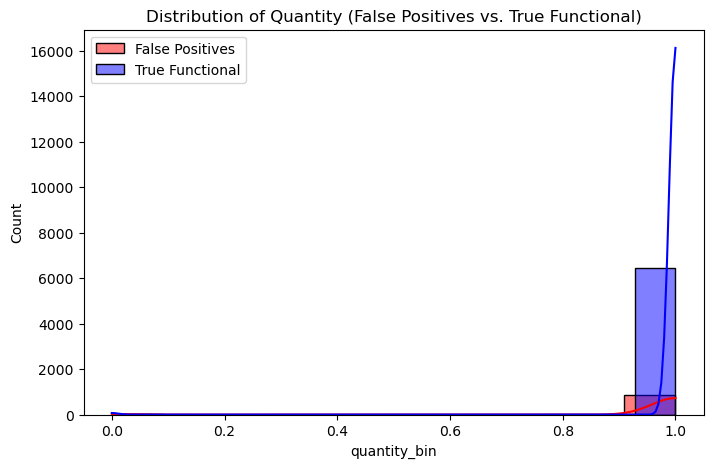

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(false_positives['quantity_bin'], color='red', label='False Positives', kde=True)
sns.histplot(true_functional['quantity_bin'], color='blue', label='True Functional', kde=True)
plt.legend()
plt.title("Distribution of Quantity (False Positives vs. True Functional)")
plt.show()

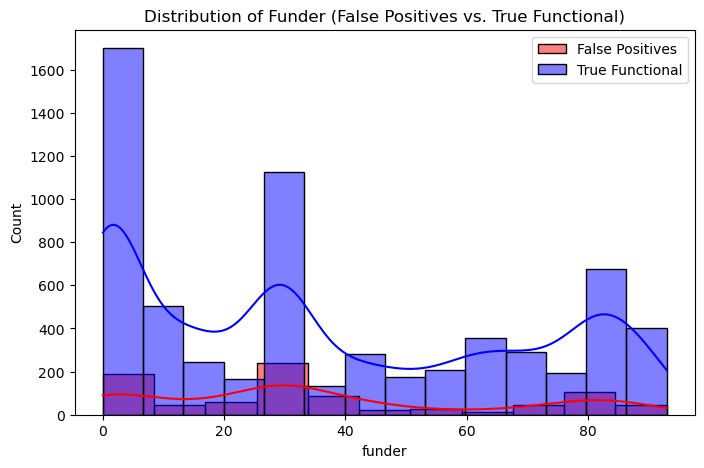

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(false_positives['funder'], color='red', label='False Positives', kde=True)
sns.histplot(true_functional['funder'], color='blue', label='True Functional', kde=True)
plt.legend()
plt.title("Distribution of Funder (False Positives vs. True Functional)")
plt.show()

In [ ]:
false_positive_funders = false_positives['funder'].value_counts().head(10)
false_positive_funders

funder
29    191
1     158
82     70
42     52
32     39
13     38
89     19
20     16
70     15
17     14
Name: count, dtype: int64

In [ ]:
true_functional_funders = true_functional['funder'].value_counts().head(10)
true_functional_funders

funder
1     1458
29     744
82     425
13     339
32     164
70     162
90     146
62     130
42     130
81     129
Name: count, dtype: int64

/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_1131/741957867.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_false_funders["Funder"], x=df_false_funders["False Positive Count"], palette="Reds_r")


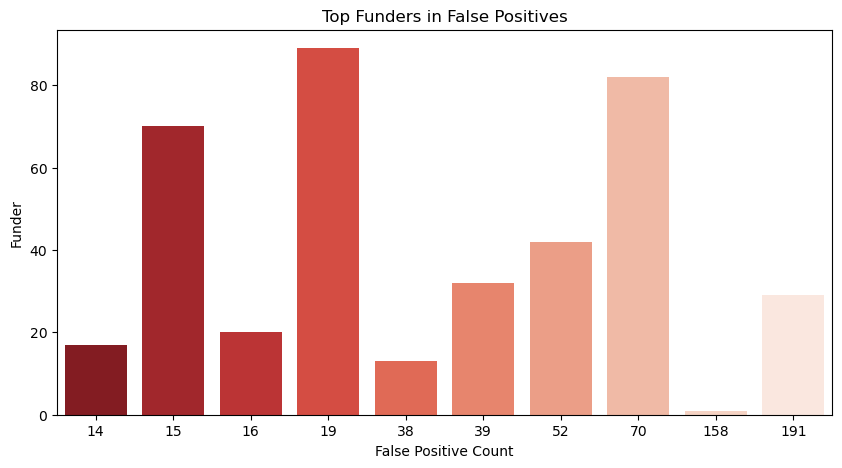

/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_1131/741957867.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_true_funders["Funder"], x=df_true_funders["True Functional Count"], palette="Blues_r")


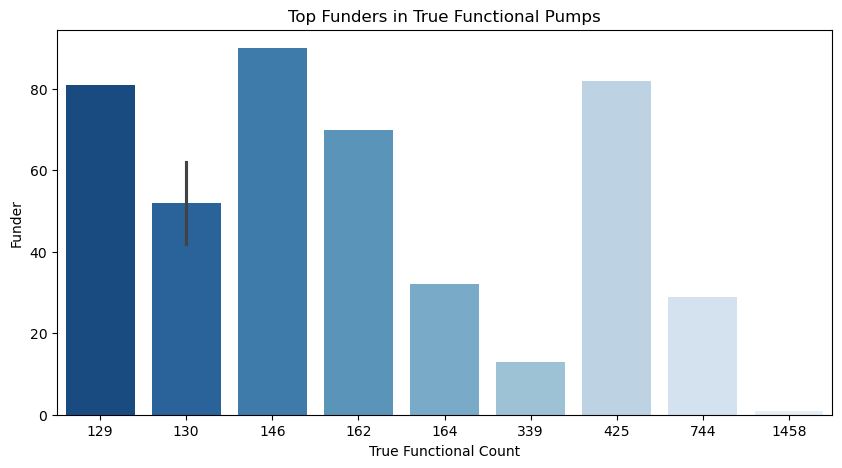

In [ ]:
df_false_funders = pd.DataFrame({'Funder': false_positive_funders.index, 'False Positive Count': false_positive_funders.values})
df_true_funders = pd.DataFrame({'Funder': true_functional_funders.index, 'True Functional Count': true_functional_funders.values})

plt.figure(figsize=(10, 5))
sns.barplot(y=df_false_funders["Funder"], x=df_false_funders["False Positive Count"], palette="Reds_r")
plt.xlabel("False Positive Count")
plt.ylabel("Funder")
plt.title("Top Funders in False Positives")
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(y=df_true_funders["Funder"], x=df_true_funders["True Functional Count"], palette="Blues_r")
plt.xlabel("True Functional Count")
plt.ylabel("Funder")
plt.title("Top Funders in True Functional Pumps")
plt.show()

In [ ]:
# Step 1: Identify the top 5 most common funders
top_5_funders = X_train['funder'].value_counts().index[:5]

In [ ]:
# Step 2: Group funders (keep top 5, set others as "Other")
X_train['funder_grouped'] = X_train['funder'].apply(lambda x: x if x in top_5_funders else 'Other')
X_test['funder_grouped'] = X_test['funder'].apply(lambda x: x if x in top_5_funders else 'Other')

In [ ]:
# Ensure all funders are strings before encoding
X_train['funder_grouped'] = X_train['funder_grouped'].astype(str)
X_test['funder_grouped'] = X_test['funder_grouped'].astype(str)

# Now encode the grouped funder column
funder_encoder = LabelEncoder()
X_train['funder_grouped'] = funder_encoder.fit_transform(X_train['funder_grouped'])
X_test['funder_grouped'] = funder_encoder.transform(X_test['funder_grouped'])  # Apply the same mapping to test set

In [ ]:
# Step 4: Train the Random Forest model with reduced funder categories
rf_model_reduced_funder = RandomForestClassifier(**best_params_rf, random_state=42, n_jobs=-1)
rf_model_reduced_funder.fit(X_train, y_train)
y_pred_reduced_funder = rf_model_reduced_funder.predict(X_test)

accuracy_reduced_funder = accuracy_score(y_test, y_pred_reduced_funder)
classification_report_reduced_funder = classification_report(y_test, y_pred_reduced_funder)

print(f"Random Forest Accuracy After Grouping Funders: {accuracy_reduced_funder:.4f}")
print(classification_report_reduced_funder)

Random Forest Accuracy After Grouping Funders: 0.8004
              precision    recall  f1-score   support

           0       0.79      0.86      0.82      6457
           2       0.81      0.73      0.77      5423

    accuracy                           0.80     11880
   macro avg       0.80      0.79      0.80     11880
weighted avg       0.80      0.80      0.80     11880



In [ ]:
top_10_funders = X_train['funder'].value_counts().index[:10]

In [ ]:
X_train['funder_grouped'] = X_train['funder'].apply(lambda x: x if x in top_10_funders else 'Other')
X_test['funder_grouped'] = X_test['funder'].apply(lambda x: x if x in top_10_funders else 'Other')

In [ ]:
X_train['funder_grouped'] = X_train['funder_grouped'].astype(str)
X_test['funder_grouped'] = X_test['funder_grouped'].astype(str)

funder_encoder = LabelEncoder()
X_train['funder_grouped'] = funder_encoder.fit_transform(X_train['funder_grouped'])
X_test['funder_grouped'] = funder_encoder.transform(X_test['funder_grouped'])

In [ ]:
# Step 4: Train the Random Forest model with reduced funder categories
rf_model_reduced_funder_10 = RandomForestClassifier(**best_params_rf, random_state=42, n_jobs=-1)
rf_model_reduced_funder_10.fit(X_train, y_train)
y_pred_reduced_funder_10 = rf_model_reduced_funder_10.predict(X_test)

accuracy_reduced_funder_10 = accuracy_score(y_test, y_pred_reduced_funder_10)
classification_report_reduced_funder_10 = classification_report(y_test, y_pred_reduced_funder_10)

print(f"Random Forest Accuracy After Grouping Funders: {accuracy_reduced_funder_10:.4f}")
print(classification_report_reduced_funder_10)

Random Forest Accuracy After Grouping Funders: 0.7994
              precision    recall  f1-score   support

           0       0.79      0.86      0.82      6457
           2       0.81      0.73      0.77      5423

    accuracy                           0.80     11880
   macro avg       0.80      0.79      0.80     11880
weighted avg       0.80      0.80      0.80     11880



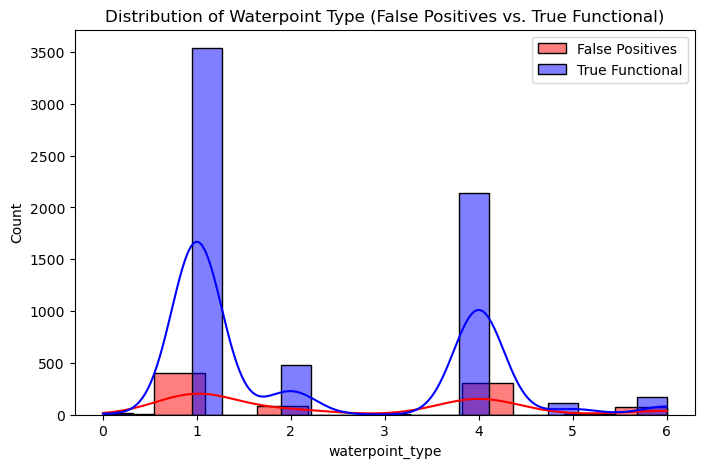

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(false_positives['waterpoint_type'], color='red', label='False Positives', kde=True)
sns.histplot(true_functional['waterpoint_type'], color='blue', label='True Functional', kde=True)
plt.legend()
plt.title("Distribution of Waterpoint Type (False Positives vs. True Functional)")
plt.show()

In [ ]:
waterpoint_counts = X_train['waterpoint_type'].value_counts()
waterpoint_counts

waterpoint_type
1    22785
4    14073
6     5098
2     4830
5      639
0       91
3        4
Name: count, dtype: int64

In [ ]:
df_waterpoint_counts = pd.DataFrame({'Waterpoint Type': waterpoint_counts.index, 'Count': waterpoint_counts.values})
df_waterpoint_counts

,Waterpoint Type,Count
0,1,22785
1,4,14073
2,6,5098
3,2,4830
4,5,639
5,0,91
6,3,4


/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_1131/106240160.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_waterpoint_counts["Waterpoint Type"], y=df_waterpoint_counts["Count"], palette="Blues_r")


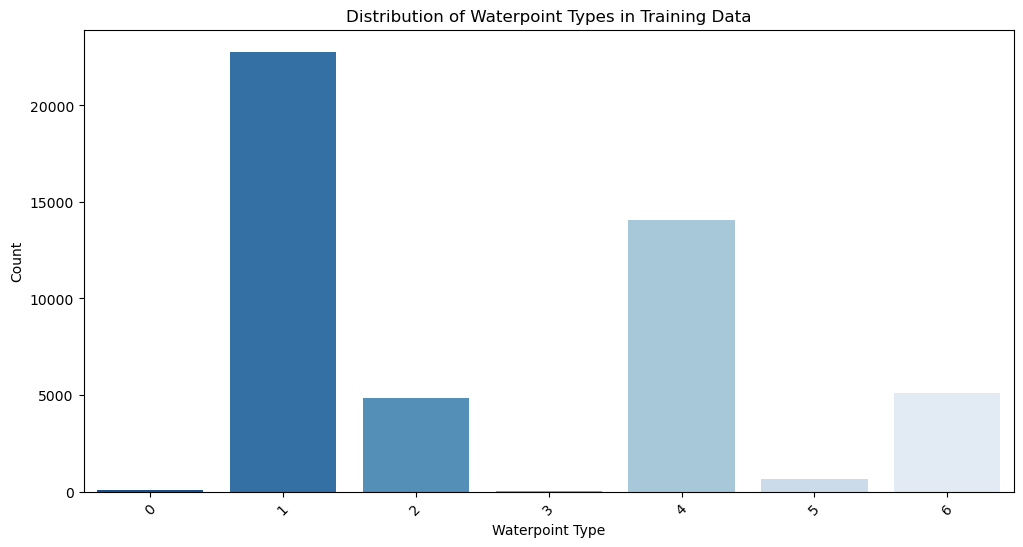

In [ ]:
# Plot distribution of waterpoint types
plt.figure(figsize=(12, 6))
sns.barplot(x=df_waterpoint_counts["Waterpoint Type"], y=df_waterpoint_counts["Count"], palette="Blues_r")
plt.xlabel("Waterpoint Type")
plt.ylabel("Count")
plt.title("Distribution of Waterpoint Types in Training Data")
plt.xticks(rotation=45)
plt.show()

In [ ]:
original_waterpoint_labels = X_train['waterpoint_type'].value_counts()
original_waterpoint_labels

waterpoint_type
1    22785
4    14073
6     5098
2     4830
5      639
0       91
3        4
Name: count, dtype: int64

In [ ]:
waterpoint_mapping = {
    0: "Shallow Well",
    1: "Borehole",
    2: "Protected Spring",
    3: "Rainwater Harvesting",
    4: "Standpipe",
    5: "Unprotected Spring",
    6: "Other"
}

In [ ]:
X_train['waterpoint_type_label'] = X_train['waterpoint_type'].map(waterpoint_mapping)
X_test['waterpoint_type_label'] = X_test['waterpoint_type'].map(waterpoint_mapping)

X_train['waterpoint_type_label'].value_counts()

waterpoint_type_label
Borehole                22785
Standpipe               14073
Other                    5098
Protected Spring         4830
Unprotected Spring        639
Shallow Well               91
Rainwater Harvesting        4
Name: count, dtype: int64